In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM, Embedding, Masking
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras.utils import to_categorical
import copy
from keras.layers import MaxPooling1D
from keras.layers import Conv1D
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
labels = ['V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13']

In [111]:
cwd = os.getcwd()
parent_wd = cwd.replace('/model', '')
training_set_path = parent_wd + '/preprocessing/training_seq_n_12_rmrp0'
dev_set_path = parent_wd + '/preprocessing/dev_seq_n_12_rmrp0'
test_set_path = parent_wd + '/preprocessing/test_seq_n_12_rmrp0'

In [112]:
with open(training_set_path, 'rb') as f:
    training_set = pickle.load(f)
with open(dev_set_path, 'rb') as f:
    dev_set = pickle.load(f)
with open(test_set_path, 'rb') as f:
    test_set = pickle.load(f)

In [113]:
X_train = training_set['X']
Y_train = training_set['Y']
X_dev = dev_set['X']
Y_dev = dev_set['Y']
X_test = test_set['X']
Y_test = test_set['Y']

In [94]:
training_move_path = parent_wd + '/preprocessing/training_move_n_12_rmrp0'
dev_move_path = parent_wd + '/preprocessing/dev_move_n_12_rmrp0'
test_move_path = parent_wd + '/preprocessing/test_move_n_12_rmrp0'

In [95]:
with open(training_move_path, 'rb') as f:
    training_set_move = pickle.load(f)
with open(dev_move_path, 'rb') as f:
    dev_set_move = pickle.load(f)
with open(test_move_path, 'rb') as f:
    test_set_move = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jrchang612/MoonBoardRNN/preprocessing/training_move_n_12_rmrp0'

In [8]:
X_train_move = training_set_move['X']
Y_train_move = training_set_move['Y']
X_dev_move = dev_set_move['X']
Y_dev_move = dev_set_move['Y']
X_test_move = test_set_move['X']
Y_test_move = test_set_move['Y']

### Model M7: easy, medium, difficult

In [9]:
X_train_move_3lev = copy.deepcopy(X_train_move)
Y_train_move_3lev = copy.deepcopy(Y_train_move)
X_dev_move_3lev = copy.deepcopy(X_dev_move)
Y_dev_move_3lev = copy.deepcopy(Y_dev_move)

In [10]:
X_test_move_3lev = copy.deepcopy(X_test_move)
Y_test_move_3lev = copy.deepcopy(Y_test_move)

In [11]:
Y_train_move_3lev[Y_train_move <= 1] = 0
Y_dev_move_3lev[Y_dev_move <= 1] = 0
Y_train_move_3lev[(Y_train_move == 2) + (Y_train_move == 3)] = 1
Y_dev_move_3lev[(Y_dev_move == 2) + (Y_dev_move == 3)] = 1
Y_train_move_3lev[Y_train_move >= 4] = 2
Y_dev_move_3lev[Y_dev_move >= 4] = 2

In [12]:
Y_test_move_3lev[Y_test_move <= 1] = 0
Y_test_move_3lev[(Y_test_move == 2) + (Y_test_move == 3)] = 1
Y_test_move_3lev[Y_test_move >= 4] = 2

In [11]:
modelm7 = Sequential()
modelm7.add(Dense(100, activation='relu', input_shape=(22, ), kernel_initializer='glorot_normal'))
modelm7.add(Dense(75, activation='relu', kernel_initializer='glorot_normal'))
modelm7.add(Dense(50, activation='relu', kernel_initializer='glorot_normal'))
modelm7.add(Dense(20, activation='relu', kernel_initializer='glorot_normal'))
modelm7.add(Dense(3, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01)
modelm7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(modelm7.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               2300      
_________________________________________________________________
dense_2 (Dense)              (None, 75)                7575      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                3800      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 63        
Total params: 14,758
Trainable params: 14,758
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
historym7_all = []
np.random.seed(0)

In [13]:
for i in range(30):
    historym7 = modelm7.fit(X_train_move_3lev, Y_train_move_3lev, 
                            epochs=10, batch_size=128, 
                            validation_data = (X_dev_move_3lev, Y_dev_move_3lev), 
                            class_weight = {0: 1, 1: 2, 2: 4})
    historym7_all.append(historym7)

Train on 133166 samples, validate on 16307 samples
Epoch 1/10
133166/133166 [==============================] - 2s 14us/step - loss: 1.4048 - sparse_categorical_accuracy: 0.6218 - val_loss: 2.0525 - val_sparse_categorical_accuracy: 0.5511
Epoch 2/10
133166/133166 [==============================] - 2s 12us/step - loss: 1.3763 - sparse_categorical_accuracy: 0.6321 - val_loss: 1.5892 - val_sparse_categorical_accuracy: 0.5436
Epoch 3/10
133166/133166 [==============================] - 1s 11us/step - loss: 1.3673 - sparse_categorical_accuracy: 0.6302 - val_loss: 1.6262 - val_sparse_categorical_accuracy: 0.5693
Epoch 4/10
133166/133166 [==============================] - 1s 11us/step - loss: 1.3618 - sparse_categorical_accuracy: 0.6335 - val_loss: 1.9499 - val_sparse_categorical_accuracy: 0.5747
Epoch 5/10
133166/133166 [==============================] - 1s 10us/step - loss: 1.3543 - sparse_categorical_accuracy: 0.6407 - val_loss: 2.1588 - val_sparse_categorical_accuracy: 0.5516
Epoch 6/10
133

In [14]:
for i in range(30):
    historym7 = modelm7.fit(X_train_move_3lev, Y_train_move_3lev, 
                            epochs=10, batch_size=128, 
                            validation_data = (X_dev_move_3lev, Y_dev_move_3lev), 
                            class_weight = {0: 1, 1: 2, 2: 4})
    historym7_all.append(historym7)

Train on 133166 samples, validate on 16307 samples
Epoch 1/10
133166/133166 [==============================] - 2s 12us/step - loss: 1.2318 - sparse_categorical_accuracy: 0.6746 - val_loss: 1.3771 - val_sparse_categorical_accuracy: 0.5402
Epoch 2/10
133166/133166 [==============================] - 2s 15us/step - loss: 1.2284 - sparse_categorical_accuracy: 0.6765 - val_loss: 1.4370 - val_sparse_categorical_accuracy: 0.5693
Epoch 3/10
133166/133166 [==============================] - 2s 13us/step - loss: 1.2328 - sparse_categorical_accuracy: 0.6748 - val_loss: 1.9157 - val_sparse_categorical_accuracy: 0.5597
Epoch 4/10
133166/133166 [==============================] - 2s 14us/step - loss: 1.2358 - sparse_categorical_accuracy: 0.6755 - val_loss: 1.2398 - val_sparse_categorical_accuracy: 0.5610
Epoch 5/10
133166/133166 [==============================] - 2s 13us/step - loss: 1.2308 - sparse_categorical_accuracy: 0.6773 - val_loss: 1.6317 - val_sparse_categorical_accuracy: 0.5569
Epoch 6/10
133

In [26]:
historym7 = modelm7.fit(X_train_move_3lev, Y_train_move_3lev, 
                            epochs=1, batch_size=128, 
                            validation_data = (X_dev_move_3lev, Y_dev_move_3lev), 
                            class_weight = {0: 1, 1: 2, 2: 4})

Train on 133166 samples, validate on 16307 samples
Epoch 1/1
133166/133166 [==============================] - 1s 10us/step - loss: 1.2192 - sparse_categorical_accuracy: 0.6792 - val_loss: 0.7488 - val_sparse_categorical_accuracy: 0.7332


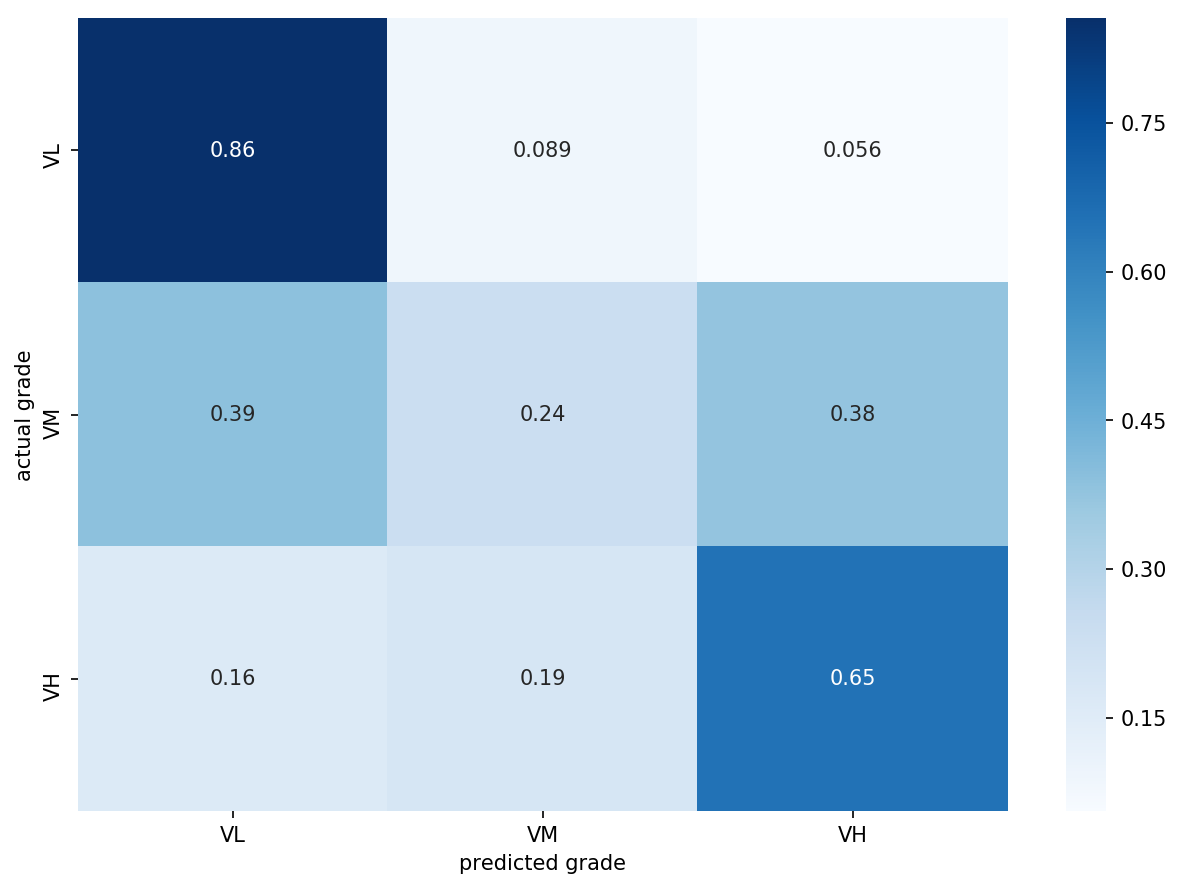

In [28]:
conf_matrix = confusion_matrix(Y_dev_move_3lev, modelm7.predict(X_dev_move_3lev).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in ['VL', 'VM', 'VH']],
                     columns = [i for i in ['VL', 'VM', 'VH']])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

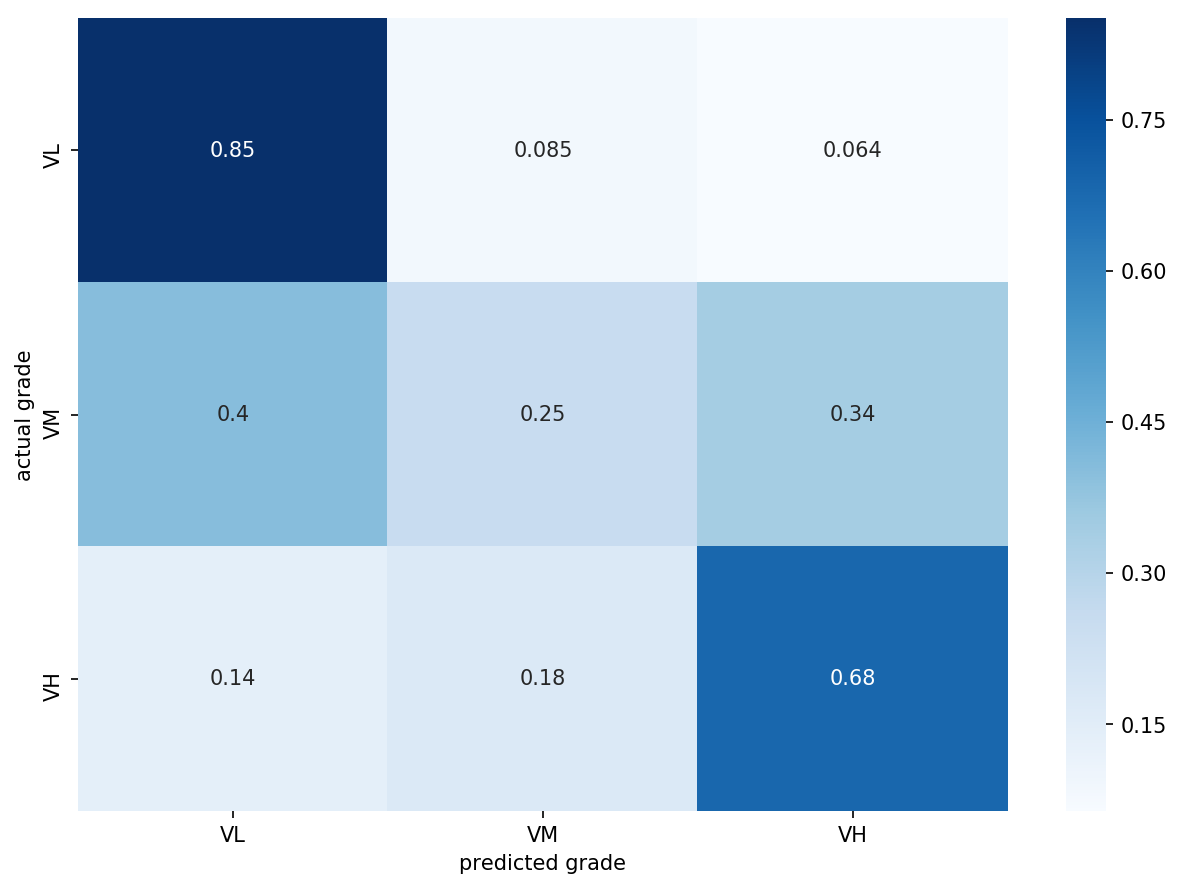

In [38]:
conf_matrix = confusion_matrix(Y_test_move_3lev, modelm7.predict(X_test_move_3lev).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in ['VL', 'VM', 'VH']],
                     columns = [i for i in ['VL', 'VM', 'VH']])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

In [72]:
moveGradeDic = {4: [4,2,2,3,3,2,2,3,2,3,2,2,4,2,3,2,3,3,3,3,4,4],
                5: [3,3,2,4,3,3,3,4,2,5,4,3,4,4,4,2,3,3,3,2,2,3,4,4],
                6: [5,4,3,6,5,2, 4,7,6,3, 4,6,6,3,4,3,5,4,4],
                7: [5,4,3,6,5,4,6,6,6,3,5,6,7,6,4,4,6,6,6,2],
                8: [8,4,6,5,4,4,7,6,5,6,5,7,6,7,6,6,7,7,5],
                9: [9,8,9,7,5,6,6,7,7,7,4,4,5,5,5,9,8,8,7],
                10: [8,7,6,9,7,7,7,9,6,6,8,7,7,7,10,9,5,7,7,6,6,7,5],
                11: [9,9,11,7, 8,6,8,9,9,8, 7,10,10,9, 6,6,6,8,10,9,5],
                12: [8,8,7,10,7,6, 7,9,6,11, 10,11,8, 7,9,10,10,9],
                13: [7,12,6, 6,6,8,7,7, 9,11,9,9]}

[0.40909091 0.40909091 0.18181818 0.         0.         0.
 0.         0.         0.         0.         0.        ]
[0.20833333 0.41666667 0.33333333 0.04166667 0.         0.
 0.         0.         0.         0.         0.        ]
[0.05263158 0.21052632 0.31578947 0.15789474 0.21052632 0.05263158
 0.         0.         0.         0.         0.        ]
[0.05 0.1  0.2  0.15 0.45 0.05 0.   0.   0.   0.   0.  ]
[0.         0.         0.15789474 0.21052632 0.31578947 0.26315789
 0.05263158 0.         0.         0.         0.        ]
[0.         0.         0.10526316 0.21052632 0.10526316 0.26315789
 0.15789474 0.15789474 0.         0.         0.        ]
[0.         0.         0.         0.08695652 0.2173913  0.43478261
 0.08695652 0.13043478 0.04347826 0.         0.        ]
[0.         0.         0.         0.04761905 0.19047619 0.0952381
 0.19047619 0.28571429 0.14285714 0.04761905 0.        ]
[0.         0.         0.         0.         0.11111111 0.22222222
 0.16666667 0.16666667 0.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


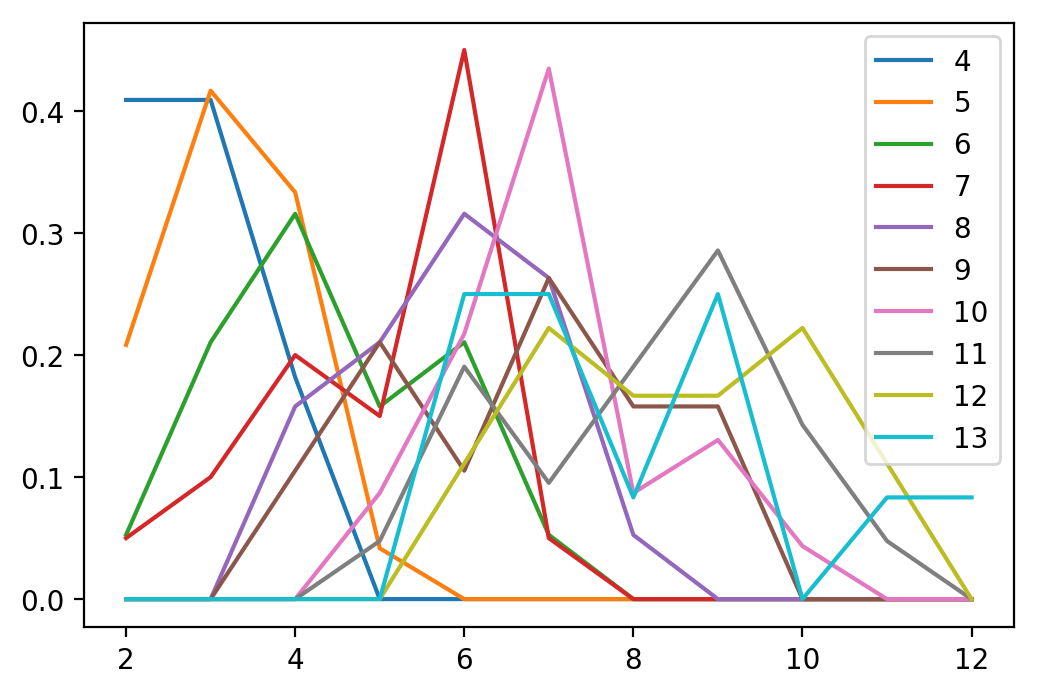

In [73]:
plt.figure(dpi = 200)
for key in moveGradeDic.keys():
    hist, bin_edges = np.histogram(moveGradeDic[key], bins = [1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5], 
                                   normed = True)
    print(hist)
    plt.plot((bin_edges[:-1]+bin_edges[1:])/2, hist, label = str(key))
plt.legend()

In [75]:
grad_prob_dict = {0: [0.40, 0.40, 0.20, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00], 
                  1: [0.20, 0.40, 0.35, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00], 
                  2: [0.05, 0.20, 0.30, 0.20, 0.20, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00], 
                  3: [0.05, 0.10, 0.20, 0.20, 0.40, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00], 
                  4: [0.00, 0.00, 0.15, 0.25, 0.30, 0.25, 0.05, 0.00, 0.00, 0.00, 0.00], 
                  5: [0.00, 0.00, 0.10, 0.15, 0.20, 0.25, 0.15, 0.15, 0.00, 0.00, 0.00], 
                  6: [0.00, 0.00, 0.00, 0.10, 0.20, 0.40, 0.15, 0.10, 0.05, 0.00, 0.00], 
                  7: [0.00, 0.00, 0.00, 0.05, 0.10, 0.15, 0.20, 0.30, 0.15, 0.05, 0.00], 
                  8: [0.00, 0.00, 0.00, 0.00, 0.15, 0.15, 0.15, 0.20, 0.20, 0.10, 0.05], 
                  9: [0.00, 0.00, 0.00, 0.00, 0.10, 0.10, 0.10, 0.20, 0.20, 0.20, 0.10]}

In [97]:
grade_prob_matrix = [[0.40, 0.40, 0.20, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00], 
                   [0.20, 0.40, 0.35, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00], 
                   [0.05, 0.20, 0.30, 0.20, 0.20, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00], 
                   [0.05, 0.10, 0.20, 0.20, 0.40, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00], 
                   [0.00, 0.00, 0.15, 0.25, 0.30, 0.25, 0.05, 0.00, 0.00, 0.00, 0.00], 
                   [0.00, 0.00, 0.10, 0.15, 0.20, 0.25, 0.15, 0.15, 0.00, 0.00, 0.00], 
                   [0.00, 0.00, 0.00, 0.10, 0.20, 0.40, 0.15, 0.10, 0.05, 0.00, 0.00], 
                   [0.00, 0.00, 0.00, 0.05, 0.10, 0.15, 0.20, 0.30, 0.15, 0.05, 0.00], 
                   [0.00, 0.00, 0.00, 0.00, 0.15, 0.15, 0.15, 0.20, 0.20, 0.10, 0.05], 
                   [0.00, 0.00, 0.00, 0.00, 0.10, 0.10, 0.10, 0.20, 0.20, 0.20, 0.10]]

In [76]:
Y_dev_move_prob = np.zeros((len(Y_dev_move), 11))
for i, y in enumerate(Y_dev_move):
    Y_dev_move_prob[i, :] = grad_prob_dict[y]

In [78]:
Y_train_move_prob = np.zeros((len(Y_train_move), 11))
for i, y in enumerate(Y_train_move):
    Y_train_move_prob[i, :] = grad_prob_dict[y]

### Model M8: probability training

In [90]:
modelm8 = Sequential()
modelm8.add(Dense(100, activation='relu', input_shape=(22, ), kernel_initializer='glorot_normal'))
modelm8.add(Dense(75, activation='relu', kernel_initializer='glorot_normal'))
modelm8.add(Dense(50, activation='relu', kernel_initializer='glorot_normal'))
modelm8.add(Dense(20, activation='relu', kernel_initializer='glorot_normal'))
modelm8.add(Dense(11, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01)
modelm8.compile(optimizer=opt, loss='categorical_crossentropy')
print(modelm8.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_17 (Dense)             (None, 75)                7575      
_________________________________________________________________
dense_18 (Dense)             (None, 50)                3800      
_________________________________________________________________
dense_19 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_20 (Dense)             (None, 11)                231       
Total params: 14,926
Trainable params: 14,926
Non-trainable params: 0
_________________________________________________________________
None


In [84]:
historym8_all = []
np.random.seed(0)

In [91]:
for i in range(30):
    historym8 = modelm8.fit(X_train_move, Y_train_move_prob, 
                            epochs=10, batch_size=128, 
                            validation_data = (X_dev_move, Y_dev_move_prob))
    historym8_all.append(historym8)

Train on 133166 samples, validate on 16307 samples
Epoch 1/10
133166/133166 [==============================] - 2s 12us/step - loss: 1.6028 - val_loss: 1.7409
Epoch 2/10
133166/133166 [==============================] - 2s 12us/step - loss: 1.5888 - val_loss: 1.8055
Epoch 3/10
133166/133166 [==============================] - 2s 12us/step - loss: 1.5856 - val_loss: 1.8458
Epoch 4/10
133166/133166 [==============================] - 2s 12us/step - loss: 1.5844 - val_loss: 1.9851
Epoch 5/10
133166/133166 [==============================] - 2s 11us/step - loss: 1.5825 - val_loss: 1.8777
Epoch 6/10
133166/133166 [==============================] - 1s 10us/step - loss: 1.5815 - val_loss: 2.0851
Epoch 7/10
133166/133166 [==============================] - 1s 10us/step - loss: 1.5803 - val_loss: 1.8229
Epoch 8/10
133166/133166 [==============================] - 1s 11us/step - loss: 1.5792 - val_loss: 1.7540
Epoch 9/10
133166/133166 [==============================] - 1s 10us/step - loss: 1.5784 - val

In [95]:
Y_predict_m8 = modelm8.predict(X_dev_move)

In [98]:
y_pred = Y_predict_m8[0, :]

In [105]:
np.sum((y_pred - grade_prob_matrix)**2, axis = 1).argmin()

1

In [107]:
grade_predict = []
for y_pred in Y_predict_m8:
    grade_predict.append(np.sum((y_pred - grade_prob_matrix)**2, axis = 1).argmin())

In [111]:
grade_predict = np.array(grade_predict)

0.33825964309805606

In [94]:
Y_dev_move_prob

array([[0.4 , 0.4 , 0.2 , ..., 0.  , 0.  , 0.  ],
       [0.05, 0.1 , 0.2 , ..., 0.  , 0.  , 0.  ],
       [0.4 , 0.4 , 0.2 , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.05, 0.2 , 0.3 , ..., 0.  , 0.  , 0.  ],
       [0.2 , 0.4 , 0.35, ..., 0.  , 0.  , 0.  ],
       [0.05, 0.2 , 0.3 , ..., 0.  , 0.  , 0.  ]])

### model M9: 5 level

In [227]:
X_train_move_5lev = copy.deepcopy(X_train_move)
Y_train_move_5lev = copy.deepcopy(Y_train_move)
X_dev_move_5lev = copy.deepcopy(X_dev_move)
Y_dev_move_5lev = copy.deepcopy(Y_dev_move)

In [236]:
Y_train_move_5lev[Y_train_move <= 1] = 0
Y_dev_move_5lev[Y_dev_move <= 1] = 0
Y_train_move_5lev[(Y_train_move == 2) + (Y_train_move == 3)] = 1
Y_dev_move_5lev[(Y_dev_move == 2) + (Y_dev_move == 3)] = 1
Y_train_move_5lev[(Y_train_move == 4) + (Y_train_move == 5)] = 2
Y_dev_move_5lev[(Y_dev_move == 4) + (Y_dev_move == 5)] = 2
Y_train_move_5lev[(Y_train_move == 6) + (Y_train_move == 7)] = 3
Y_dev_move_5lev[(Y_dev_move == 6) + (Y_dev_move == 7)] = 3
Y_train_move_5lev[(Y_train_move == 8) + (Y_train_move == 9)] = 4
Y_dev_move_5lev[(Y_dev_move == 8) + (Y_dev_move == 9)] = 4

In [233]:
modelm9 = Sequential()
modelm9.add(Dense(100, activation='relu', input_shape=(22, ), kernel_initializer='glorot_normal'))
modelm9.add(Dense(80, activation='relu', kernel_initializer='glorot_normal'))
modelm9.add(Dense(75, activation='relu', kernel_initializer='glorot_normal'))
modelm9.add(Dense(50, activation='relu', kernel_initializer='glorot_normal'))
modelm9.add(Dense(20, activation='relu', kernel_initializer='glorot_normal'))
modelm9.add(Dense(5, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01)
modelm9.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(modelm9.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 100)               2300      
_________________________________________________________________
dense_57 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_58 (Dense)             (None, 75)                6075      
_________________________________________________________________
dense_59 (Dense)             (None, 50)                3800      
_________________________________________________________________
dense_60 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_61 (Dense)             (None, 5)                 105       
Total params: 21,380
Trainable params: 21,380
Non-trainable params: 0
_________________________________________________

In [237]:
historym9_all = []
np.random.seed(0)

In [238]:
for i in range(30):
    historym9 = modelm9.fit(X_train_move_5lev, Y_train_move_5lev, 
                            epochs=10, batch_size=128, 
                            validation_data = (X_dev_move_5lev, Y_dev_move_5lev), 
                            class_weight = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5})
    historym9_all.append(historym9)

Train on 133166 samples, validate on 16307 samples
Epoch 1/10
133166/133166 [==============================] - 2s 13us/step - loss: 1.4970 - sparse_categorical_accuracy: 0.6389 - val_loss: 1.4697 - val_sparse_categorical_accuracy: 0.5541
Epoch 2/10
133166/133166 [==============================] - 2s 12us/step - loss: 1.4836 - sparse_categorical_accuracy: 0.6420 - val_loss: 1.4601 - val_sparse_categorical_accuracy: 0.5713
Epoch 3/10
133166/133166 [==============================] - 2s 14us/step - loss: 1.4768 - sparse_categorical_accuracy: 0.6412 - val_loss: 1.4820 - val_sparse_categorical_accuracy: 0.5745
Epoch 4/10
133166/133166 [==============================] - 2s 16us/step - loss: 1.4754 - sparse_categorical_accuracy: 0.6459 - val_loss: 2.1220 - val_sparse_categorical_accuracy: 0.5648
Epoch 5/10
133166/133166 [==============================] - 2s 14us/step - loss: 1.4688 - sparse_categorical_accuracy: 0.6454 - val_loss: 1.6532 - val_sparse_categorical_accuracy: 0.5577
Epoch 6/10
133

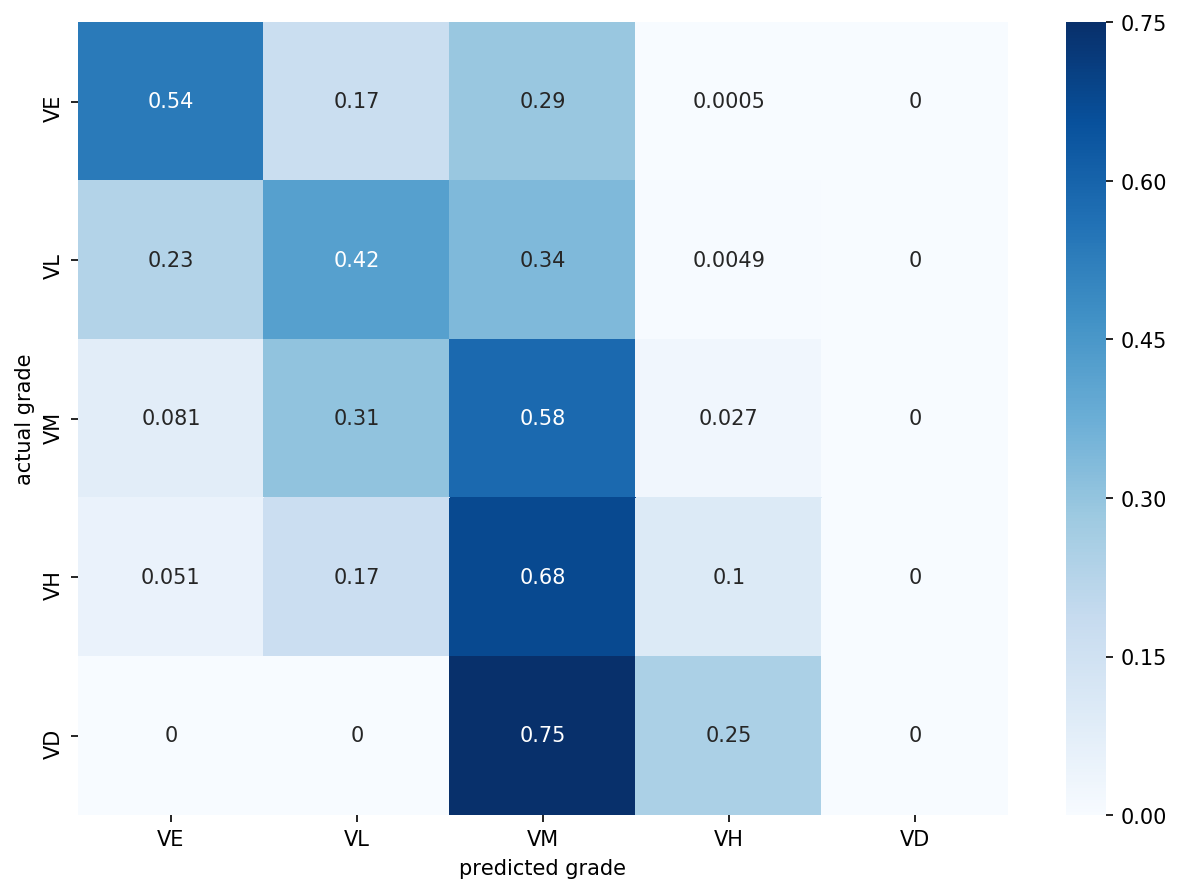

In [240]:
conf_matrix = confusion_matrix(Y_dev_move_5lev, modelm9.predict(X_dev_move_5lev).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in ['VE', 'VL', 'VM', 'VH', 'VD']],
                     columns = [i for i in ['VE', 'VL', 'VM', 'VH', 'VD']])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

### Model M10: 4 level

In [415]:
from keras.layers import BatchNormalization

In [47]:
X_train_move_4lev = copy.deepcopy(X_train_move)
Y_train_move_4lev = copy.deepcopy(Y_train_move)
X_dev_move_4lev = copy.deepcopy(X_dev_move)
Y_dev_move_4lev = copy.deepcopy(Y_dev_move)

In [48]:
Y_train_move_4lev[Y_train_move <= 1] = 0
Y_dev_move_4lev[Y_dev_move <= 1] = 0
Y_train_move_4lev[(Y_train_move == 2) + (Y_train_move == 3)] = 1
Y_dev_move_4lev[(Y_dev_move == 2) + (Y_dev_move == 3)] = 1
Y_train_move_4lev[(Y_train_move == 4) + (Y_train_move == 5)] = 2
Y_dev_move_4lev[(Y_dev_move == 4) + (Y_dev_move == 5)] = 2
Y_train_move_4lev[Y_train_move >= 6] = 3
Y_dev_move_4lev[Y_dev_move >= 6] = 3

In [52]:
np.random.seed(0)
tf.random.set_seed(0)
modelm10 = Sequential()
modelm10.add(Dense(100, activation='relu', input_shape=(22, ), kernel_initializer='glorot_normal'))
modelm10.add(BatchNormalization())
modelm10.add(Dropout(0.5))
modelm10.add(Dense(80, activation='relu', kernel_initializer='glorot_normal'))
modelm10.add(BatchNormalization())
modelm10.add(Dropout(0.5))
modelm10.add(Dense(75, activation='relu', kernel_initializer='glorot_normal'))
modelm10.add(BatchNormalization())
modelm10.add(Dropout(0.5))
modelm10.add(Dense(50, activation='relu', kernel_initializer='glorot_normal'))
modelm10.add(BatchNormalization())
modelm10.add(Dropout(0.5))
modelm10.add(Dense(20, activation='relu', kernel_initializer='glorot_normal'))
modelm10.add(BatchNormalization())
modelm10.add(Dropout(0.5))
modelm10.add(Dense(4, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01)
modelm10.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(modelm10.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 100)               2300      
_________________________________________________________________
batch_normalization_23 (Batc (None, 100)               400       
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 80)                8080      
_________________________________________________________________
batch_normalization_24 (Batc (None, 80)                320       
_________________________________________________________________
dropout_16 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 75)               

In [53]:
historym10_all = []
np.random.seed(0)

In [54]:
for i in range(30):
    historym10 = modelm10.fit(X_train_move_4lev, Y_train_move_4lev, 
                            epochs=10, batch_size=128, 
                            validation_data = (X_dev_move_4lev, Y_dev_move_4lev), 
                            class_weight = {0: 1, 1: 2, 2: 4, 3: 8})
    historym10_all.append(historym10)

Train on 133166 samples, validate on 16307 samples
Epoch 1/10
133166/133166 [==============================] - 5s 36us/step - loss: 1.9211 - sparse_categorical_accuracy: 0.5867 - val_loss: 1.9691 - val_sparse_categorical_accuracy: 0.5577
Epoch 2/10
133166/133166 [==============================] - 4s 28us/step - loss: 1.8352 - sparse_categorical_accuracy: 0.6073 - val_loss: 1.7735 - val_sparse_categorical_accuracy: 0.5496
Epoch 3/10
133166/133166 [==============================] - 4s 28us/step - loss: 1.8166 - sparse_categorical_accuracy: 0.6126 - val_loss: 1.6610 - val_sparse_categorical_accuracy: 0.5553
Epoch 4/10
133166/133166 [==============================] - 4s 29us/step - loss: 1.8174 - sparse_categorical_accuracy: 0.6138 - val_loss: 2.1410 - val_sparse_categorical_accuracy: 0.5436
Epoch 5/10
133166/133166 [==============================] - 4s 32us/step - loss: 1.8125 - sparse_categorical_accuracy: 0.6178 - val_loss: 2.0089 - val_sparse_categorical_accuracy: 0.5460
Epoch 6/10
133

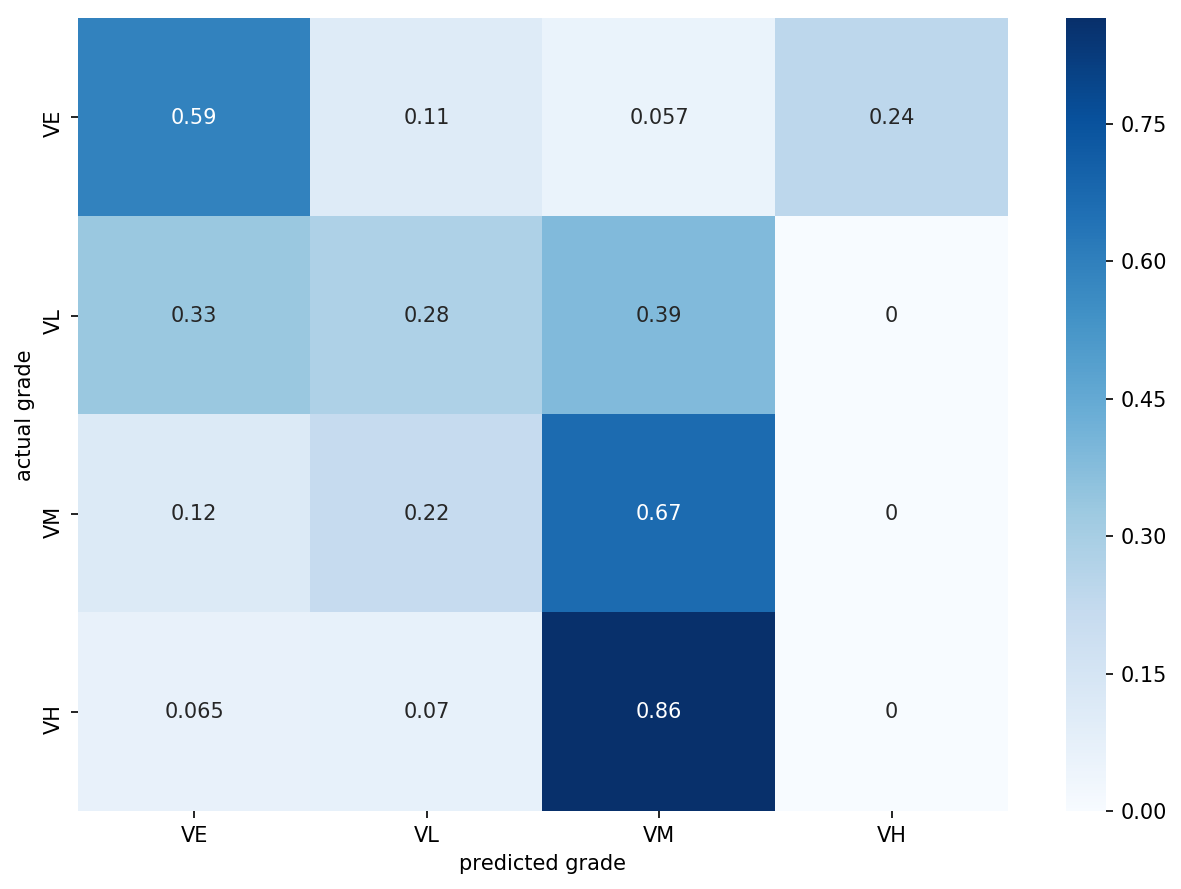

In [56]:
conf_matrix = confusion_matrix(Y_dev_move_4lev, modelm10.predict(X_dev_move_4lev).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in ['VE', 'VL', 'VM', 'VH']],
                     columns = [i for i in ['VE', 'VL', 'VM', 'VH']])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

### Model M11: 3level + batchnorm

In [16]:
from keras.layers import BatchNormalization

In [14]:
np.random.seed(0)
tf.random.set_seed(0)

In [17]:
modelm11 = Sequential()
modelm11.add(Dense(100, activation='relu', input_shape=(22, ), kernel_initializer='glorot_normal'))
modelm11.add(BatchNormalization())
modelm11.add(Dense(80, activation='relu', kernel_initializer='glorot_normal'))
modelm11.add(BatchNormalization())
modelm11.add(Dense(75, activation='relu', kernel_initializer='glorot_normal'))
modelm11.add(BatchNormalization())
modelm11.add(Dense(50, activation='relu', kernel_initializer='glorot_normal'))
modelm11.add(BatchNormalization())
modelm11.add(Dense(20, activation='relu', kernel_initializer='glorot_normal'))
modelm11.add(BatchNormalization())
modelm11.add(Dense(3, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01)
modelm11.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(modelm11.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               2300      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_3 (Dense)              (None, 80)                8080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 80)                320       
_________________________________________________________________
dense_4 (Dense)              (None, 75)                6075      
_________________________________________________________________
batch_normalization_3 (Batch (None, 75)                300       
_________________________________________________________________
dense_5 (Dense)              (None, 50)               

In [18]:
historym11_all = []

In [19]:
for i in range(30):
    historym11 = modelm11.fit(X_train_move_3lev, Y_train_move_3lev, 
                            epochs=10, batch_size=128, 
                            validation_data = (X_dev_move_3lev, Y_dev_move_3lev), 
                            class_weight = {0: 1, 1: 2, 2: 3})
    historym11_all.append(historym11)

Train on 133166 samples, validate on 16307 samples
Epoch 1/10
133166/133166 [==============================] - 6s 47us/step - loss: 1.2889 - sparse_categorical_accuracy: 0.6423 - val_loss: 2.3615 - val_sparse_categorical_accuracy: 0.5400
Epoch 2/10
133166/133166 [==============================] - 5s 39us/step - loss: 1.2577 - sparse_categorical_accuracy: 0.6496 - val_loss: 1.3605 - val_sparse_categorical_accuracy: 0.5764
Epoch 3/10
133166/133166 [==============================] - 5s 38us/step - loss: 1.2496 - sparse_categorical_accuracy: 0.6528 - val_loss: 1.5247 - val_sparse_categorical_accuracy: 0.5616
Epoch 4/10
133166/133166 [==============================] - 4s 32us/step - loss: 1.2452 - sparse_categorical_accuracy: 0.6528 - val_loss: 1.8728 - val_sparse_categorical_accuracy: 0.5580
Epoch 5/10
133166/133166 [==============================] - 4s 33us/step - loss: 1.2392 - sparse_categorical_accuracy: 0.6548 - val_loss: 1.5892 - val_sparse_categorical_accuracy: 0.5466
Epoch 6/10
133

KeyboardInterrupt: 

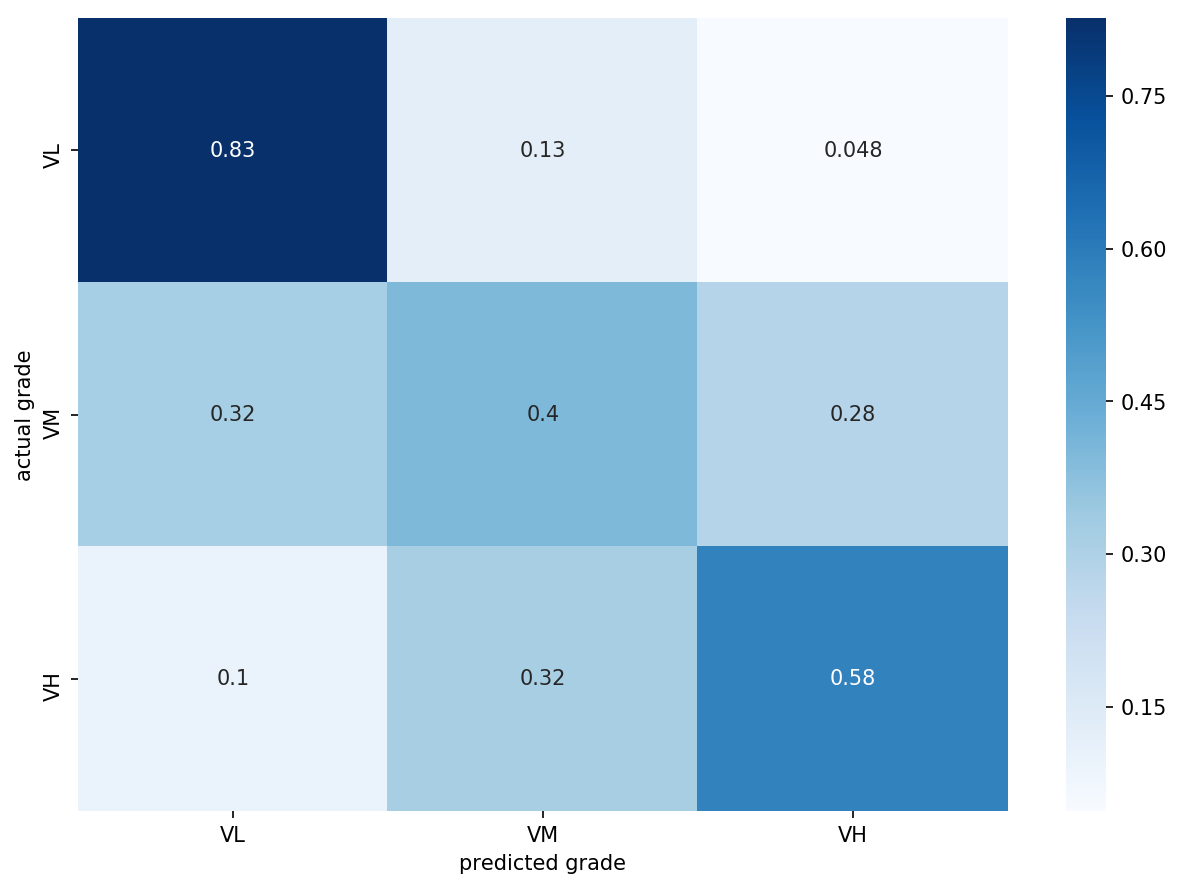

In [22]:
conf_matrix = confusion_matrix(Y_test_move_3lev, modelm11.predict(X_test_move_3lev).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in ['VL', 'VM', 'VH']],
                     columns = [i for i in ['VL', 'VM', 'VH']])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

In [26]:
np.sum(Y_move_3lev == modelm11.predict(X_dev_move_3lev).argmax(axis=1))/len(Y_test_move_3lev)

0.7407453262349882

In [23]:
model_json = modelm11.to_json()
with open("modelm11.json", "w") as json_file:
    json_file.write(model_json)
modelm11.save_weights("modelm11.h5")

In [76]:
modelm11_20vec = keras.Model(inputs=modelm11.input,
                                       outputs=modelm11.get_layer('dense_6').output)

In [139]:
np.min(modelm11_20vec.predict(X_dev_move_3lev))

0.0

In [122]:
modelm11_50vec = keras.Model(inputs=modelm11.input,
                                       outputs=modelm11.get_layer('dense_5').output)

In [135]:
X_train_50vec= np.zeros((len(X_train), 12, 50))
for i, x in enumerate(X_train):
    tmax = int(training_set['tmax'][i])
    X_train_50vec[i, 0:tmax, :] = modelm11_50vec.predict(X_train[i])[0:tmax, :]

In [137]:
X_dev_50vec= np.zeros((len(X_dev), 12, 50))
for i, x in enumerate(X_dev):
    tmax = int(dev_set['tmax'][i])
    X_dev_50vec[i, 0:tmax, :] = modelm11_50vec.predict(X_dev[i])[0:tmax, :]

In [140]:
log_X_train_50vec = np.log(X_train_50vec + 1)

In [141]:
log_X_dev_50vec = np.log(X_dev_50vec + 1)

### Model C7: input from M11_50vec

In [147]:
np.random.seed(0)
tf.random.set_seed(0)
modelc7 = Sequential()
modelc7.add(Masking(mask_value=0., input_shape = (12, 50)))
modelc7.add(BatchNormalization())
modelc7.add(LSTM(40, activation='relu', input_shape=(12, 50), kernel_initializer='glorot_normal'))
modelc7.add(BatchNormalization())
modelc7.add(Dropout(0.5))
modelc7.add(Dense(20, activation='relu', kernel_initializer='glorot_normal'))
modelc7.add(BatchNormalization())
modelc7.add(Dropout(0.5))
modelc7.add(Dense(15, activation='relu', kernel_initializer='glorot_normal'))
modelc7.add(BatchNormalization())
modelc7.add(Dropout(0.5))
modelc7.add(Dense(10, activation='softmax'))
modelc7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(modelc7.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_6 (Masking)          (None, 12, 50)            0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 12, 50)            200       
_________________________________________________________________
lstm_12 (LSTM)               (None, 40)                14560     
_________________________________________________________________
batch_normalization_42 (Batc (None, 40)                160       
_________________________________________________________________
dropout_30 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 20)                820       
_________________________________________________________________
batch_normalization_43 (Batc (None, 20)              

In [148]:
historyc7_all = []

In [149]:
for i in range(10):
    historyc7 = modelc7.fit(X_train_50vec, Y_train, epochs=10, batch_size=32, validation_data = (X_dev_50vec, Y_dev))
    historyc7_all.append(historyc7)

Train on 20157 samples, validate on 2442 samples
Epoch 1/10
20157/20157 [==============================] - 8s 377us/step - loss: 1.9228 - sparse_categorical_accuracy: 0.3510 - val_loss: 1.2835 - val_sparse_categorical_accuracy: 0.5205
Epoch 2/10
20157/20157 [==============================] - 7s 328us/step - loss: 1.3514 - sparse_categorical_accuracy: 0.4638 - val_loss: 1.1865 - val_sparse_categorical_accuracy: 0.5364
Epoch 3/10
20157/20157 [==============================] - 7s 324us/step - loss: 1.2433 - sparse_categorical_accuracy: 0.4906 - val_loss: 1.1931 - val_sparse_categorical_accuracy: 0.5311
Epoch 4/10
20157/20157 [==============================] - 6s 308us/step - loss: 1.1980 - sparse_categorical_accuracy: 0.5055 - val_loss: 1.1601 - val_sparse_categorical_accuracy: 0.5360
Epoch 5/10
20157/20157 [==============================] - 7s 352us/step - loss: 1.1682 - sparse_categorical_accuracy: 0.5183 - val_loss: 1.2046 - val_sparse_categorical_accuracy: 0.5221
Epoch 6/10
20157/2015

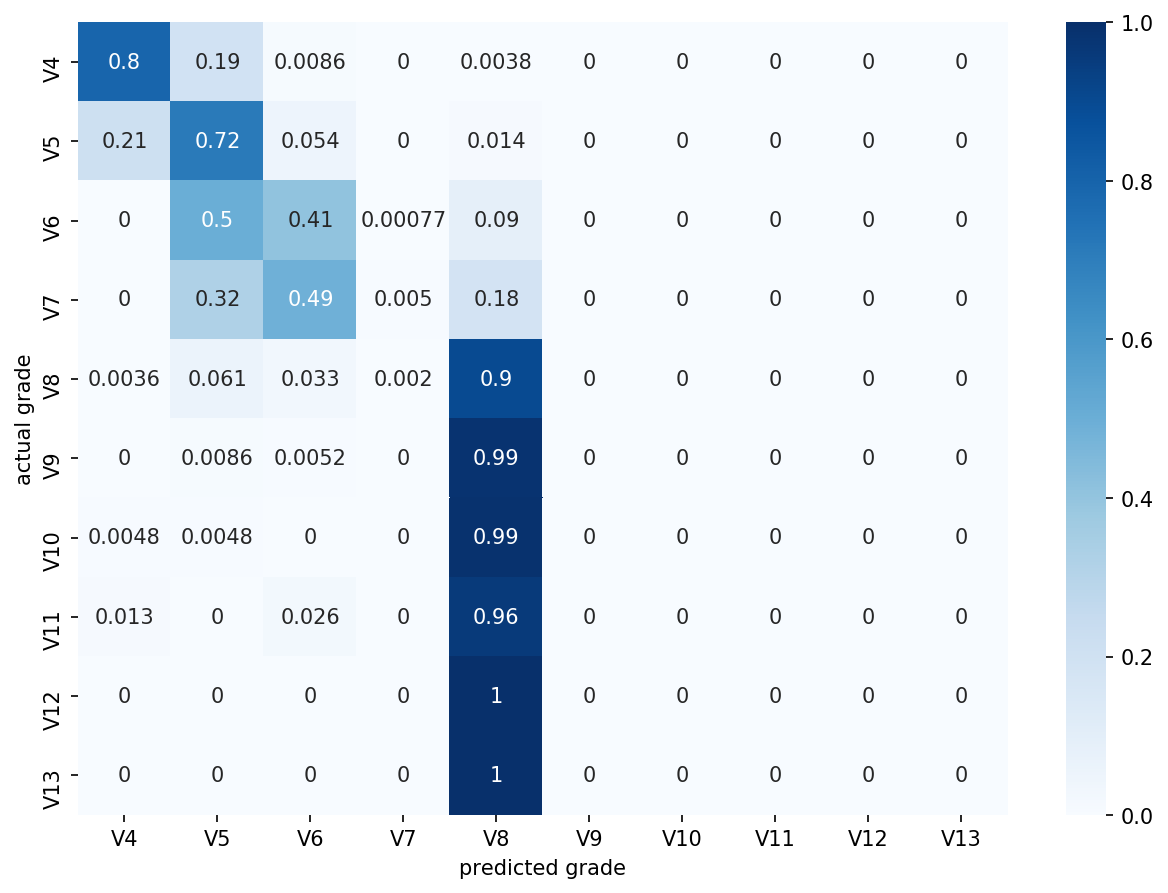

In [151]:
conf_matrix = confusion_matrix(Y_train, modelc7.predict(X_train_50vec).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

### Model C6: input from M11_20vec

In [115]:
X_train_20vec= np.zeros((len(X_train), 12, 20))
for i, x in enumerate(X_train):
    tmax = int(training_set['tmax'][i])
    X_train_20vec[i, 0:tmax, :] = modelm11_20vec.predict(X_train[i])[0:tmax, :]

In [116]:
X_dev_20vec= np.zeros((len(X_dev), 12, 20))
for i, x in enumerate(X_dev):
    tmax = int(dev_set['tmax'][i])
    X_dev_20vec[i, 0:tmax, :] = modelm11_20vec.predict(X_dev[i])[0:tmax, :]

In [117]:
np.random.seed(0)
tf.random.set_seed(0)
modelc6 = Sequential()
modelc6.add(Masking(mask_value=0., input_shape = (12, 20)))
modelc6.add(BatchNormalization())
modelc6.add(LSTM(40, activation='relu', input_shape=(12, 20), kernel_initializer='glorot_normal'))
modelc6.add(BatchNormalization())
modelc6.add(Dropout(0.5))
modelc6.add(Dense(20, activation='relu', kernel_initializer='glorot_normal'))
modelc6.add(BatchNormalization())
modelc6.add(Dropout(0.5))
modelc6.add(Dense(15, activation='relu', kernel_initializer='glorot_normal'))
modelc6.add(BatchNormalization())
modelc6.add(Dropout(0.5))
modelc6.add(Dense(10, activation='softmax'))
modelc6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(modelc6.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_4 (Masking)          (None, 12, 20)            0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 12, 20)            80        
_________________________________________________________________
lstm_10 (LSTM)               (None, 40)                9760      
_________________________________________________________________
batch_normalization_34 (Batc (None, 40)                160       
_________________________________________________________________
dropout_24 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 20)                820       
_________________________________________________________________
batch_normalization_35 (Batc (None, 20)              

In [118]:
historyc6_all = []

In [119]:
for i in range(10):
    historyc6 = modelc6.fit(X_train_20vec, Y_train, epochs=10, batch_size=32, validation_data = (X_dev_20vec, Y_dev))
    historyc6_all.append(historyc6)

Train on 20157 samples, validate on 2442 samples
Epoch 1/10
20157/20157 [==============================] - 7s 356us/step - loss: 1.9080 - sparse_categorical_accuracy: 0.3566 - val_loss: 1.2824 - val_sparse_categorical_accuracy: 0.5262
Epoch 2/10
20157/20157 [==============================] - 6s 299us/step - loss: 1.3373 - sparse_categorical_accuracy: 0.4707 - val_loss: 1.3350 - val_sparse_categorical_accuracy: 0.4660
Epoch 3/10
20157/20157 [==============================] - 6s 304us/step - loss: 1.2353 - sparse_categorical_accuracy: 0.4959 - val_loss: 1.1907 - val_sparse_categorical_accuracy: 0.5225
Epoch 4/10
20157/20157 [==============================] - 6s 316us/step - loss: 1.1980 - sparse_categorical_accuracy: 0.5074 - val_loss: 1.1652 - val_sparse_categorical_accuracy: 0.5287
Epoch 5/10
20157/20157 [==============================] - 6s 322us/step - loss: 1.1747 - sparse_categorical_accuracy: 0.5147 - val_loss: 1.1599 - val_sparse_categorical_accuracy: 0.5328
Epoch 6/10
20157/2015

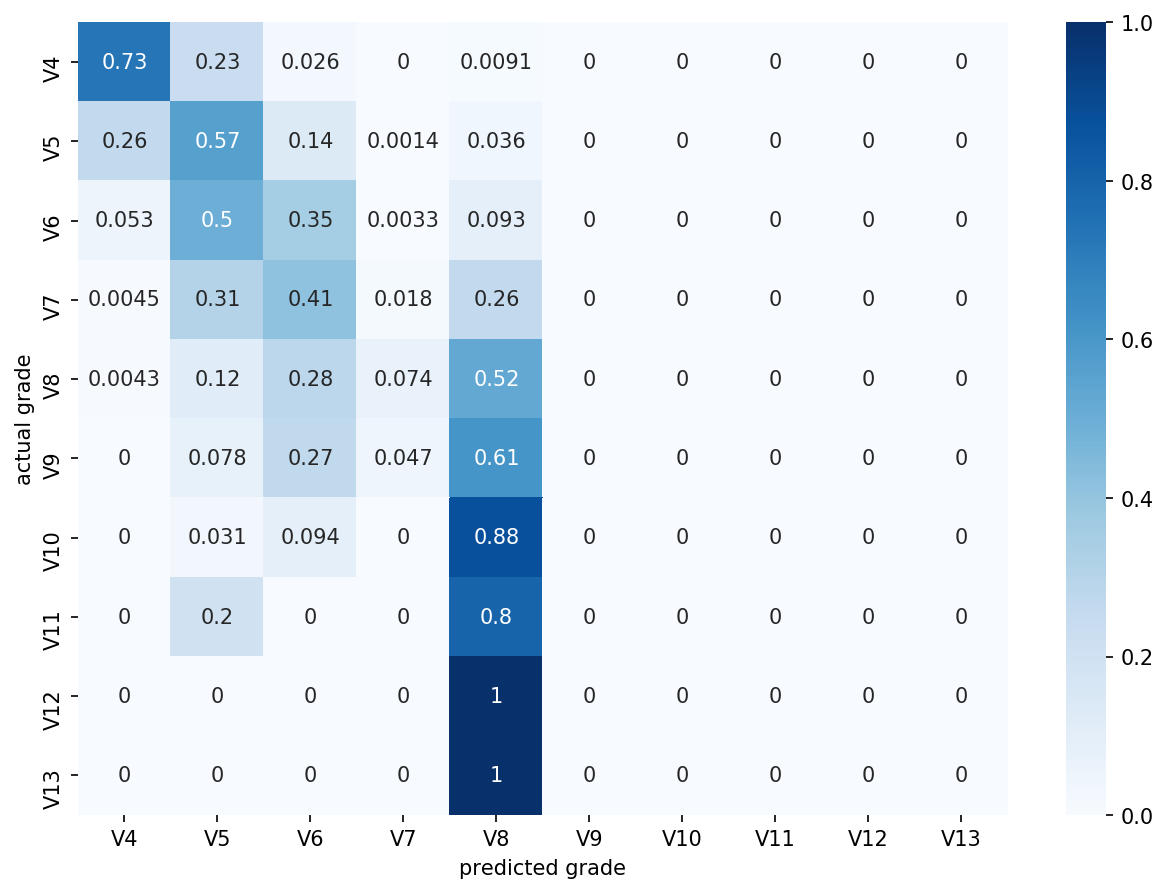

In [121]:
conf_matrix = confusion_matrix(Y_dev, modelc6.predict(X_dev_20vec).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

### Model C8: combine output from Model M11 & original vector

In [163]:
X_train_res = np.zeros((len(X_train), 12, 9))
for i, x in enumerate(X_train):
    tmax = int(training_set['tmax'][i])
    X_train_res[i, 0:tmax, 0:3] = modelm11.predict(X_train[i])[0:tmax, :]
    X_train_res[i, :, 3] = np.sqrt(X_train[i][:, 7]**2 + X_train[i][:, 8]**2)
    X_train_res[i, :, 4] = np.sqrt(X_train[i][:, 12]**2 + X_train[i][:, 13]**2)
    X_train_res[i, :, 5] = X_train[i][:, -1]
    X_train_res[i, :, 6] = X_train[i][:, 3]
    X_train_res[i, :, 7] = X_train[i][:, 6]
    X_train_res[i, :, 8] = X_train[i][:, 11]

In [164]:
X_dev_res = np.zeros((len(X_dev), 12, 9))
for i, x in enumerate(X_dev):
    tmax = int(dev_set['tmax'][i])
    X_dev_res[i, 0:tmax, 0:3] = modelm11.predict(X_dev[i])[0:tmax, :]
    X_dev_res[i, :, 3] = np.sqrt(X_dev[i][:, 7]**2 + X_dev[i][:, 8]**2)
    X_dev_res[i, :, 4] = np.sqrt(X_dev[i][:, 12]**2 + X_dev[i][:, 13]**2)
    X_dev_res[i, :, 5] = X_dev[i][:, -1]
    X_dev_res[i, :, 6] = X_dev[i][:, 3]
    X_dev_res[i, :, 7] = X_dev[i][:, 6]
    X_dev_res[i, :, 8] = X_dev[i][:, 11]

In [170]:
np.random.seed(0)
tf.random.set_seed(0)
modelc8 = Sequential()
modelc8.add(Masking(mask_value=0., input_shape = (12, 9)))
modelc8.add(Bidirectional(LSTM(40, activation='relu', input_shape=(12, 9), kernel_initializer='glorot_normal')))
modelc8.add(BatchNormalization())
modelc8.add(Dropout(0.5))
modelc8.add(Dense(30, activation='relu', kernel_initializer='glorot_normal'))
modelc8.add(BatchNormalization())
modelc8.add(Dropout(0.5))
modelc8.add(Dense(20, activation='relu', kernel_initializer='glorot_normal'))
modelc8.add(BatchNormalization())
modelc8.add(Dropout(0.5))
modelc8.add(Dense(15, activation='relu', kernel_initializer='glorot_normal'))
modelc8.add(BatchNormalization())
modelc8.add(Dropout(0.5))
modelc8.add(Dense(10, activation='softmax'))
modelc8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(modelc8.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_9 (Masking)          (None, 12, 9)             0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 80)                16000     
_________________________________________________________________
batch_normalization_51 (Batc (None, 80)                320       
_________________________________________________________________
dropout_40 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 30)                2430      
_________________________________________________________________
batch_normalization_52 (Batc (None, 30)                120       
_________________________________________________________________
dropout_41 (Dropout)         (None, 30)              

In [171]:
historyc8_all = []

In [172]:
for i in range(10):
    historyc8 = modelc8.fit(X_train_res, Y_train, epochs=10, batch_size=32, validation_data = (X_dev_res, Y_dev))
    historyc8_all.append(historyc8)

Train on 20157 samples, validate on 2442 samples
Epoch 1/10
20157/20157 [==============================] - 12s 590us/step - loss: 1.9492 - sparse_categorical_accuracy: 0.3442 - val_loss: 1.2732 - val_sparse_categorical_accuracy: 0.5168
Epoch 2/10
20157/20157 [==============================] - 9s 469us/step - loss: 1.3803 - sparse_categorical_accuracy: 0.4582 - val_loss: 1.1942 - val_sparse_categorical_accuracy: 0.5254
Epoch 3/10
20157/20157 [==============================] - 10s 480us/step - loss: 1.2736 - sparse_categorical_accuracy: 0.4794 - val_loss: 1.1806 - val_sparse_categorical_accuracy: 0.5229
Epoch 4/10
20157/20157 [==============================] - 10s 481us/step - loss: 1.2294 - sparse_categorical_accuracy: 0.4950 - val_loss: 1.2073 - val_sparse_categorical_accuracy: 0.5053
Epoch 5/10
20157/20157 [==============================] - 10s 485us/step - loss: 1.2010 - sparse_categorical_accuracy: 0.5028 - val_loss: 1.1584 - val_sparse_categorical_accuracy: 0.5291
Epoch 6/10
20157/

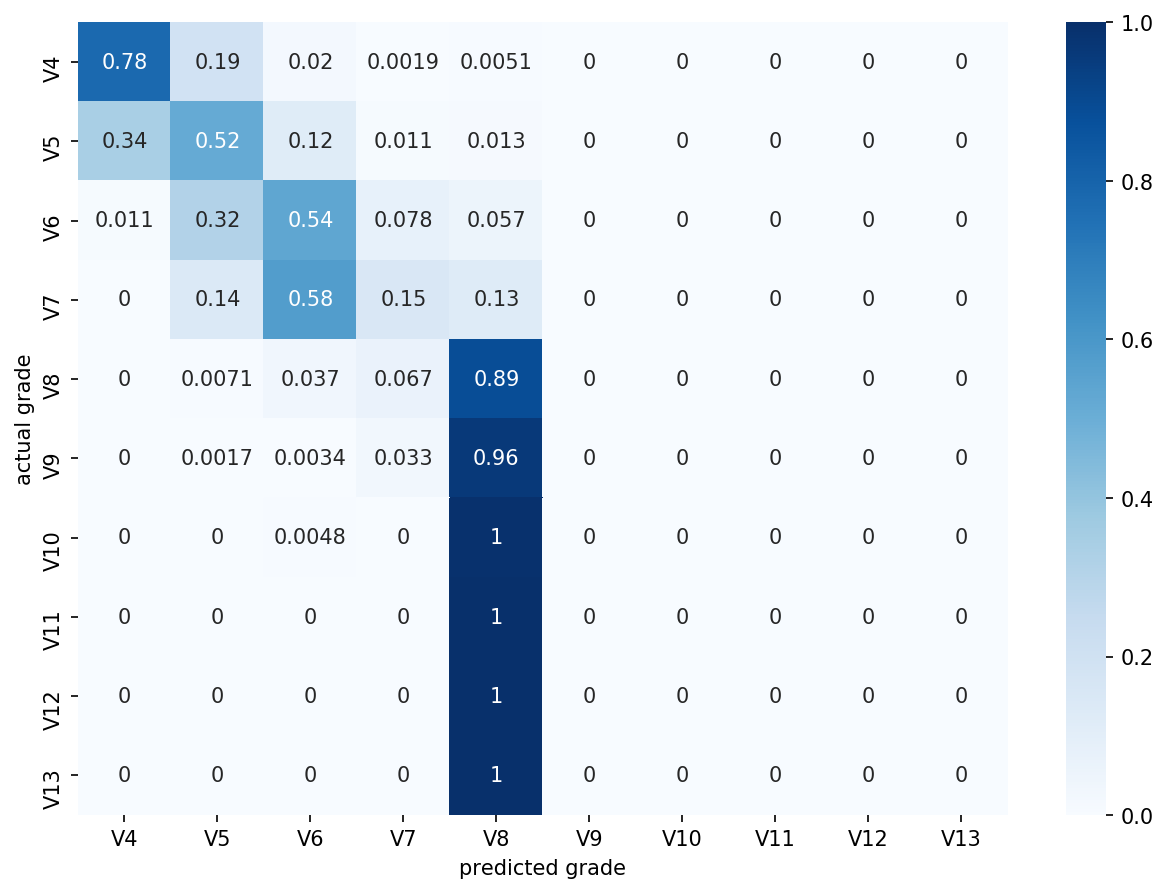

In [173]:
conf_matrix = confusion_matrix(Y_train, modelc8.predict(X_train_res).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

### Model B1: compare with naive BRNN

In [174]:
np.random.seed(0)
tf.random.set_seed(0)
modelb1 = Sequential()
modelb1.add(Masking(mask_value=0., input_shape = (12, 22)))
modelb1.add(Bidirectional(LSTM(40, activation='relu', input_shape=(12, 22), kernel_initializer='glorot_normal')))
modelb1.add(BatchNormalization())
modelb1.add(Dropout(0.5))
modelb1.add(Dense(30, activation='relu', kernel_initializer='glorot_normal'))
modelb1.add(BatchNormalization())
modelb1.add(Dropout(0.5))
modelb1.add(Dense(20, activation='relu', kernel_initializer='glorot_normal'))
modelb1.add(BatchNormalization())
modelb1.add(Dropout(0.5))
modelb1.add(Dense(15, activation='relu', kernel_initializer='glorot_normal'))
modelb1.add(BatchNormalization())
modelb1.add(Dropout(0.5))
modelb1.add(Dense(10, activation='softmax'))
modelb1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(modelb1.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_10 (Masking)         (None, 12, 22)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 80)                20160     
_________________________________________________________________
batch_normalization_55 (Batc (None, 80)                320       
_________________________________________________________________
dropout_44 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 30)                2430      
_________________________________________________________________
batch_normalization_56 (Batc (None, 30)                120       
_________________________________________________________________
dropout_45 (Dropout)         (None, 30)              

In [175]:
historyb1_all = []

In [176]:
for i in range(10):
    historyb1 = modelb1.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data = (X_dev, Y_dev))
    historyb1_all.append(historyb1)

Train on 20157 samples, validate on 2442 samples
Epoch 1/10
20157/20157 [==============================] - 14s 686us/step - loss: 2.0417 - sparse_categorical_accuracy: 0.3211 - val_loss: 1.3661 - val_sparse_categorical_accuracy: 0.4623
Epoch 2/10
20157/20157 [==============================] - 15s 752us/step - loss: 1.4832 - sparse_categorical_accuracy: 0.4255 - val_loss: 1.2551 - val_sparse_categorical_accuracy: 0.4996
Epoch 3/10
20157/20157 [==============================] - 16s 812us/step - loss: 1.3792 - sparse_categorical_accuracy: 0.4468 - val_loss: 1.2293 - val_sparse_categorical_accuracy: 0.5066
Epoch 4/10
20157/20157 [==============================] - 10s 504us/step - loss: 1.3344 - sparse_categorical_accuracy: 0.4568 - val_loss: 1.2036 - val_sparse_categorical_accuracy: 0.4975
Epoch 5/10
20157/20157 [==============================] - 9s 454us/step - loss: 1.3067 - sparse_categorical_accuracy: 0.4686 - val_loss: 1.1881 - val_sparse_categorical_accuracy: 0.5156
Epoch 6/10
20157/

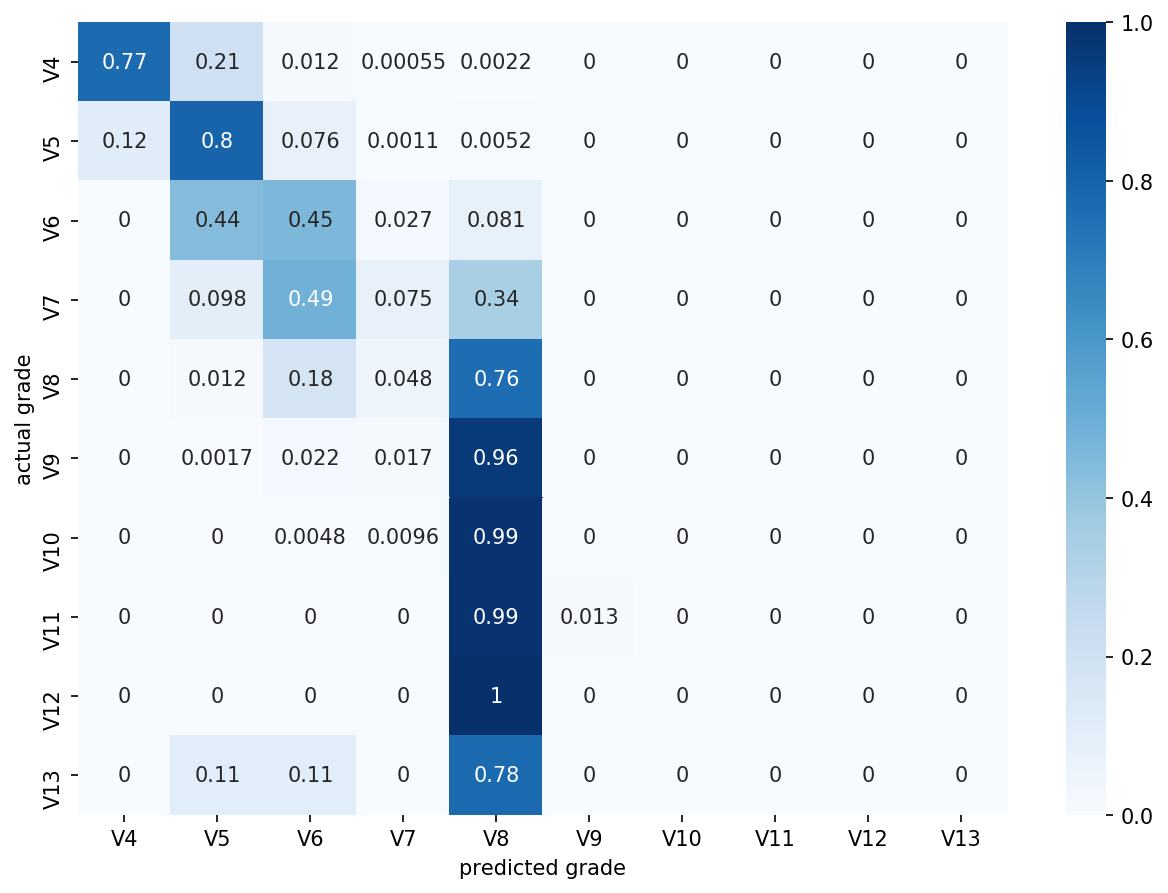

In [177]:
conf_matrix = confusion_matrix(Y_train, modelb1.predict(X_train).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

### Model C4: input from Model M11

In [65]:
from mpl_toolkits.mplot3d import Axes3D

In [70]:
X_train_converted = np.zeros((len(X_train), 12, 3))
score_dict = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
for i, x in enumerate(X_train):
    tmax = int(training_set['tmax'][i])
    y = int(Y_train[i])
    X_train_converted[i, 0:tmax, :] = modelm11.predict(X_train[i])[0:tmax, :]
    score_dict[y].append(list(np.mean(X_train_converted[i, 0:tmax, :], axis = 0)))

In [72]:
arr[:, 0]

array([[0.06211124, 0.27570485, 0.66218391],
       [0.04431204, 0.16038584, 0.79530212],
       [0.05643089, 0.2311103 , 0.71245883],
       [0.11994141, 0.30972757, 0.57033098],
       [0.11173696, 0.25142884, 0.63683419],
       [0.26406941, 0.20179507, 0.53413552],
       [0.08220178, 0.07675903, 0.8410392 ],
       [0.07812318, 0.21542184, 0.70645495],
       [0.05196351, 0.280333  , 0.66770351],
       [0.03096549, 0.14182824, 0.82720621],
       [0.02029891, 0.10498204, 0.8747191 ],
       [0.22723514, 0.32695488, 0.44580999],
       [0.04004284, 0.16787445, 0.79208273],
       [0.11482783, 0.30345917, 0.581713  ],
       [0.06239108, 0.24105663, 0.69655228],
       [0.23390824, 0.24035959, 0.52573215],
       [0.05601255, 0.22069893, 0.72328851],
       [0.18041932, 0.34779491, 0.47178579],
       [0.08314479, 0.24684249, 0.67001269],
       [0.08578499, 0.23637464, 0.67784036],
       [0.05461743, 0.25109479, 0.69428777],
       [0.0227181 , 0.10186232, 0.87541962],
       [0.

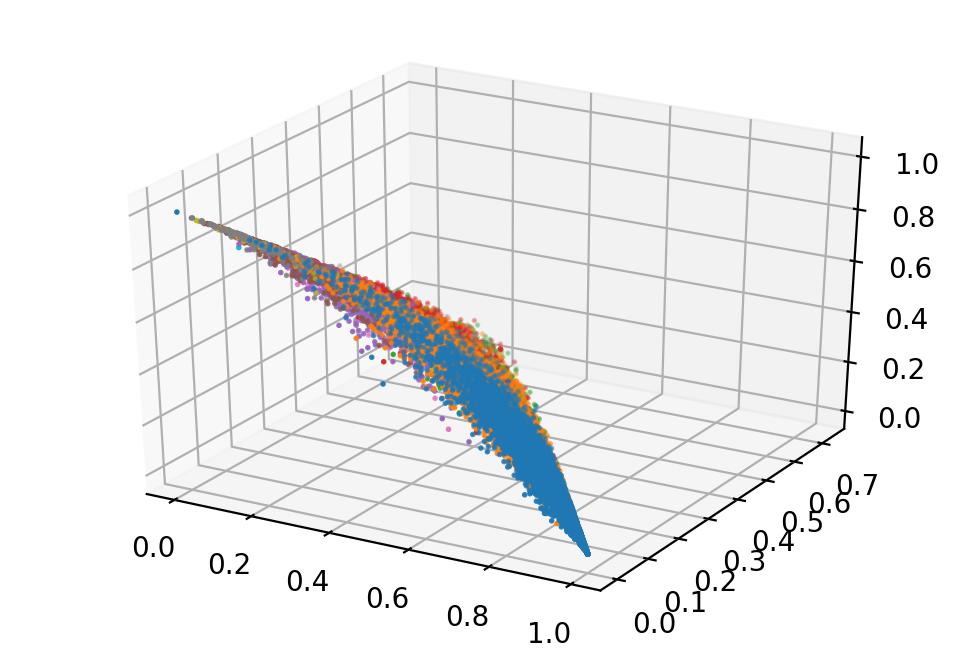

In [75]:
fig = plt.figure(dpi = 200)
ax = fig.add_subplot(111, projection='3d')

for key in score_dict.keys():
    arr = np.array(score_dict[key])
    ax.scatter(arr[:, 0], arr[:, 1], arr[:, 2], s = 1, label = str(key))

In [28]:
X_dev_converted = np.zeros((len(X_dev), 12, 3))
for i, x in enumerate(X_dev):
    tmax = int(dev_set['tmax'][i])
    X_dev_converted[i, 0:tmax, :] = modelm11.predict(X_dev[i])[0:tmax, :]

In [30]:
np.random.seed(0)
tf.random.set_seed(0)
modelc4 = Sequential()
modelc4.add(Masking(mask_value=0., input_shape = (12, 3)))
modelc4.add(LSTM(20, activation='relu', input_shape=(12, 3), kernel_initializer='glorot_normal', return_sequences = 'True'))
modelc4.add(BatchNormalization())
modelc4.add(Dropout(0.5))
modelc4.add(LSTM(20, activation='relu', kernel_initializer='glorot_normal', return_sequences = 'True'))
modelc4.add(BatchNormalization())
modelc4.add(Dropout(0.5))
modelc4.add(LSTM(15, activation='relu', kernel_initializer='glorot_normal'))
modelc4.add(BatchNormalization())
modelc4.add(Dropout(0.5))
modelc4.add(Dense(15, activation='relu', kernel_initializer='glorot_normal'))
modelc4.add(BatchNormalization())
modelc4.add(Dropout(0.5))
modelc4.add(Dense(10, activation='softmax'))
modelc4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(modelc4.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_2 (Masking)          (None, 12, 3)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 12, 20)            1920      
_________________________________________________________________
batch_normalization_10 (Batc (None, 12, 20)            80        
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 20)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 12, 20)            3280      
_________________________________________________________________
batch_normalization_11 (Batc (None, 12, 20)            80        
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 20)           

In [31]:
historyc4_all = []

In [32]:
for i in range(10):
    historyc4 = modelc4.fit(X_train_converted, Y_train, epochs=10, batch_size=32, validation_data = (X_dev_converted, Y_dev))
    historyc4_all.append(historyc4)

Train on 24603 samples, validate on 2442 samples
Epoch 1/10
24603/24603 [==============================] - 19s 766us/step - loss: 1.8336 - sparse_categorical_accuracy: 0.3539 - val_loss: 1.3378 - val_sparse_categorical_accuracy: 0.4836
Epoch 2/10
24603/24603 [==============================] - 16s 660us/step - loss: 1.3680 - sparse_categorical_accuracy: 0.4554 - val_loss: 1.3373 - val_sparse_categorical_accuracy: 0.4873
Epoch 3/10
24603/24603 [==============================] - 16s 660us/step - loss: 1.2989 - sparse_categorical_accuracy: 0.4678 - val_loss: 1.3767 - val_sparse_categorical_accuracy: 0.4828
Epoch 4/10
24603/24603 [==============================] - 16s 655us/step - loss: 1.2694 - sparse_categorical_accuracy: 0.4758 - val_loss: 1.3801 - val_sparse_categorical_accuracy: 0.4861
Epoch 5/10
24603/24603 [==============================] - 16s 662us/step - loss: 1.2508 - sparse_categorical_accuracy: 0.4830 - val_loss: 1.3988 - val_sparse_categorical_accuracy: 0.4791
Epoch 6/10
24603

KeyboardInterrupt: 

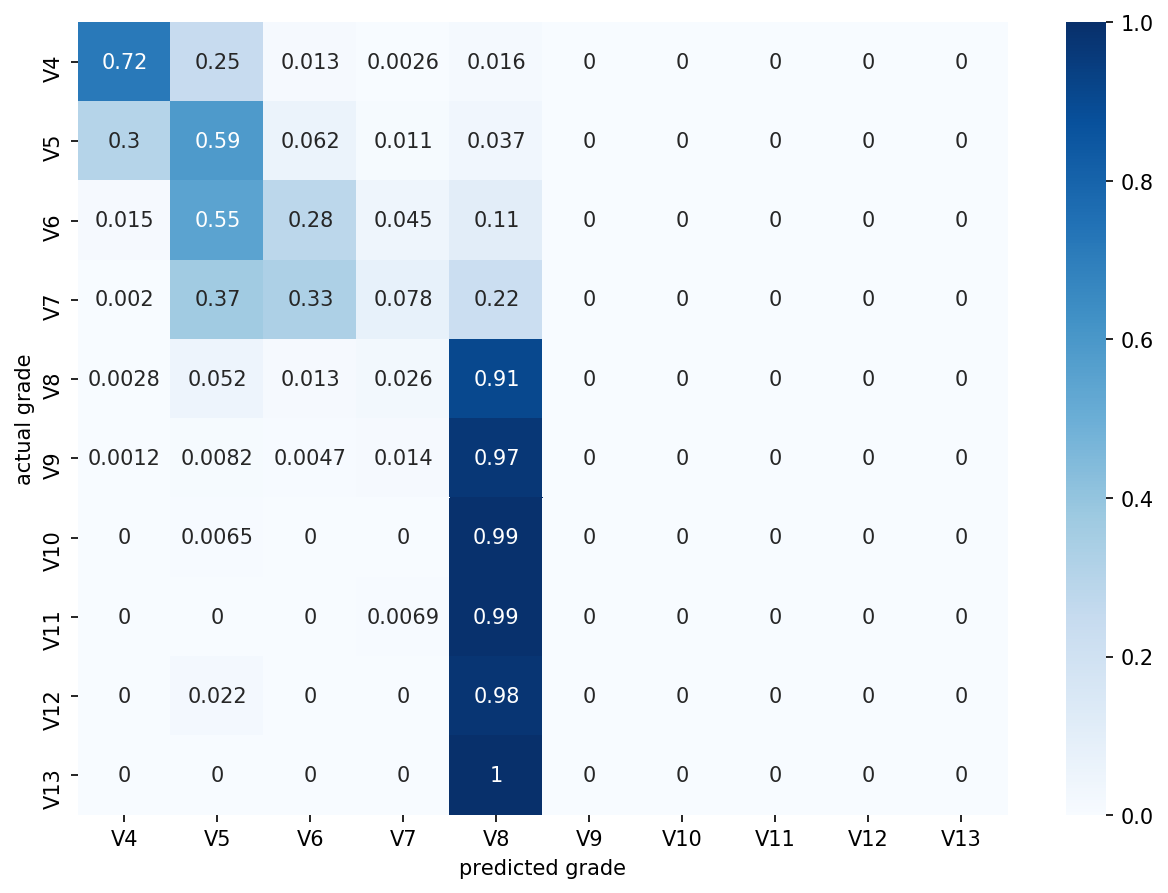

In [34]:
conf_matrix = confusion_matrix(Y_train, modelc4.predict(X_train_converted).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

### Model C5: using CNN after first categorization

In [36]:
np.random.seed(0)
tf.random.set_seed(0)
modelc5 = Sequential()
modelc5.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(12, 3), kernel_initializer='glorot_normal'))
modelc5.add(MaxPooling1D(pool_size=2))
modelc5.add(Dropout(0.5))
modelc5.add(Conv1D(filters=64, kernel_size=3, activation='relu', kernel_initializer='glorot_normal'))
modelc5.add(MaxPooling1D(pool_size=2))
modelc5.add(Dropout(0.5))
modelc5.add(Flatten())
modelc5.add(Dense(100, activation='relu', kernel_initializer='glorot_normal'))
modelc5.add(BatchNormalization())
modelc5.add(Dropout(0.5))
modelc5.add(Dense(10, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01)
modelc5.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(modelc5.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 10, 64)            640       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 5, 64)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 3, 64)             12352     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [37]:
historyc5_all = []

In [43]:
class_weight = {0: 1.,
                1: 1.,
                2: 1., 
                3: 1, 
                4: 1,
                5: 4, 
                6: 4, 
                7: 4, 
                8: 4, 
                9: 4}
class_weight2 = {0: 1.,
                1: 1.,
                2: 1., 
                3: 1, 
                4: 1,
                5: 4, 
                6: 8, 
                7: 12, 
                8: 16, 
                9: 16}

In [38]:
for i in range(10):
    historyc5 = modelc5.fit(X_train_converted, Y_train, epochs=10, batch_size=32, validation_data = (X_dev_converted, Y_dev))
    historyc5_all.append(historyc5)

Train on 24603 samples, validate on 2442 samples
Epoch 1/10
24603/24603 [==============================] - 3s 103us/step - loss: 1.2844 - accuracy: 0.4653 - val_loss: 1.4876 - val_accuracy: 0.4754
Epoch 2/10
24603/24603 [==============================] - 2s 80us/step - loss: 1.1899 - accuracy: 0.4965 - val_loss: 1.5263 - val_accuracy: 0.4689
Epoch 3/10
24603/24603 [==============================] - 2s 79us/step - loss: 1.1862 - accuracy: 0.5003 - val_loss: 1.4923 - val_accuracy: 0.4640
Epoch 4/10
24603/24603 [==============================] - 2s 88us/step - loss: 1.1767 - accuracy: 0.5003 - val_loss: 1.5657 - val_accuracy: 0.4722
Epoch 5/10
24603/24603 [==============================] - 2s 83us/step - loss: 1.1697 - accuracy: 0.5068 - val_loss: 1.5674 - val_accuracy: 0.4758
Epoch 6/10
24603/24603 [==============================] - 2s 72us/step - loss: 1.1634 - accuracy: 0.5041 - val_loss: 1.5821 - val_accuracy: 0.4627
Epoch 7/10
24603/24603 [==============================] - 2s 81us/st

In [41]:
for i in range(10):
    historyc5 = modelc5.fit(X_train_converted, Y_train, epochs=10, batch_size=32, validation_data = (X_dev_converted, Y_dev), class_weight = class_weight)
    historyc5_all.append(historyc5)

Train on 24603 samples, validate on 2442 samples
Epoch 1/10
24603/24603 [==============================] - 2s 86us/step - loss: 1.4760 - accuracy: 0.4853 - val_loss: 1.3837 - val_accuracy: 0.4582
Epoch 2/10
24603/24603 [==============================] - 2s 82us/step - loss: 1.4594 - accuracy: 0.4825 - val_loss: 1.3914 - val_accuracy: 0.4730
Epoch 3/10
24603/24603 [==============================] - 2s 87us/step - loss: 1.4520 - accuracy: 0.4832 - val_loss: 1.4746 - val_accuracy: 0.4599
Epoch 4/10
24603/24603 [==============================] - 2s 89us/step - loss: 1.4488 - accuracy: 0.4834 - val_loss: 1.4018 - val_accuracy: 0.4492
Epoch 5/10
24603/24603 [==============================] - 2s 76us/step - loss: 1.4506 - accuracy: 0.4839 - val_loss: 1.4186 - val_accuracy: 0.4668
Epoch 6/10
24603/24603 [==============================] - 2s 87us/step - loss: 1.4421 - accuracy: 0.4854 - val_loss: 1.4348 - val_accuracy: 0.4746
Epoch 7/10
24603/24603 [==============================] - 2s 88us/ste

In [44]:
for i in range(10):
    historyc5 = modelc5.fit(X_train_converted, Y_train, epochs=10, batch_size=32, validation_data = (X_dev_converted, Y_dev), class_weight = class_weight2)
    historyc5_all.append(historyc5)

Train on 24603 samples, validate on 2442 samples
Epoch 1/10
24603/24603 [==============================] - 2s 88us/step - loss: 1.7990 - accuracy: 0.4743 - val_loss: 1.3815 - val_accuracy: 0.4709
Epoch 2/10
24603/24603 [==============================] - 2s 88us/step - loss: 1.7830 - accuracy: 0.4738 - val_loss: 1.4211 - val_accuracy: 0.4636
Epoch 3/10
24603/24603 [==============================] - 2s 91us/step - loss: 1.7672 - accuracy: 0.4799 - val_loss: 1.3616 - val_accuracy: 0.4402
Epoch 4/10
24603/24603 [==============================] - 2s 79us/step - loss: 1.7642 - accuracy: 0.4784 - val_loss: 1.3456 - val_accuracy: 0.4734
Epoch 5/10
24603/24603 [==============================] - 2s 80us/step - loss: 1.7596 - accuracy: 0.4791 - val_loss: 1.3780 - val_accuracy: 0.4668
Epoch 6/10
24603/24603 [==============================] - 2s 89us/step - loss: 1.7570 - accuracy: 0.4764 - val_loss: 1.3975 - val_accuracy: 0.4738
Epoch 7/10
24603/24603 [==============================] - 2s 81us/ste

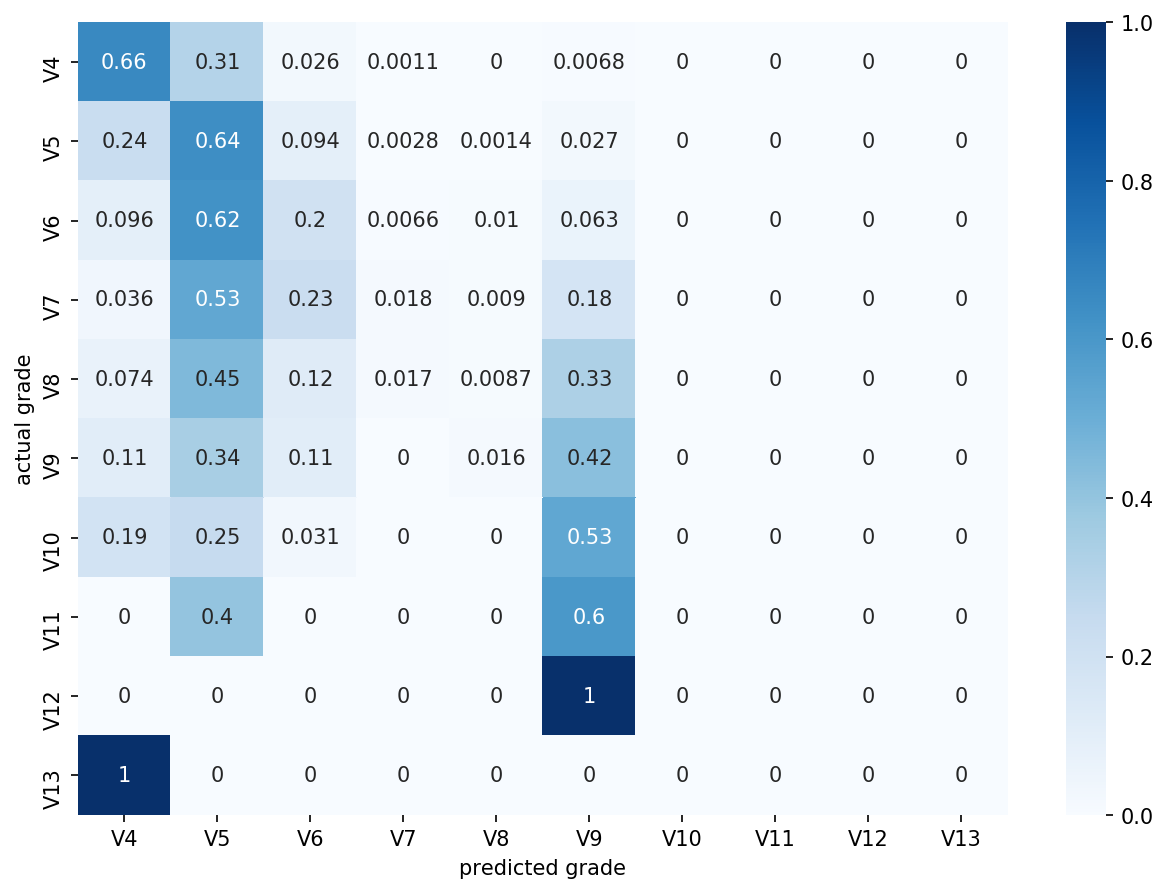

In [46]:
conf_matrix = confusion_matrix(Y_dev, modelc5.predict(X_dev_converted).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

### Model M12: add batchnorm and dropout

In [ ]:
from keras.layers import Dropout

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)
modelm12 = Sequential()
modelm12.add(Dense(100, activation='relu', input_shape=(22, ), kernel_initializer='glorot_normal'))
modelm12.add(BatchNormalization())
modelm12.add(Dropout(0.5))
modelm12.add(Dense(80, activation='relu', kernel_initializer='glorot_normal'))
modelm12.add(BatchNormalization())
modelm12.add(Dropout(0.5))
modelm12.add(Dense(75, activation='relu', kernel_initializer='glorot_normal'))
modelm12.add(BatchNormalization())
modelm12.add(Dropout(0.5))
modelm12.add(Dense(50, activation='relu', kernel_initializer='glorot_normal'))
modelm12.add(BatchNormalization())
modelm12.add(Dropout(0.5))
modelm12.add(Dense(20, activation='relu', kernel_initializer='glorot_normal'))
modelm12.add(BatchNormalization())
modelm12.add(Dense(3, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01)
modelm12.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(modelm12.summary())

In [ ]:
historym12_all = []

In [ ]:
for i in range(30):
    historym12 = modelm12.fit(X_train_move_3lev, Y_train_move_3lev, 
                            epochs=10, batch_size=128, 
                            validation_data = (X_dev_move_3lev, Y_dev_move_3lev), 
                            class_weight = {0: 1, 1: 2, 2: 3})
    historym12_all.append(historym12)

### Model c0

In [277]:
X_train_converted = np.zeros((len(X_train), 12, 5))
for i, x in enumerate(X_train):
    tmax = int(training_set['tmax'][i])
    X_train_converted[i, 0:tmax, :] = modelm9.predict(X_train[i])[0:tmax, :]

In [278]:
X_dev_converted = np.zeros((len(X_dev), 12, 5))
for i, x in enumerate(X_dev):
    tmax = int(dev_set['tmax'][i])
    X_dev_converted[i, 0:tmax, :] = modelm9.predict(X_dev[i])[0:tmax, :]

In [280]:
modelc0 = Sequential()
modelc0.add(Masking(mask_value=0., input_shape = (12, 5)))
modelc0.add(LSTM(20, activation='relu', input_shape=(12, 5), kernel_initializer='glorot_normal', return_sequences = 'True'))
modelc0.add(LSTM(20, activation='relu', kernel_initializer='glorot_normal', return_sequences = 'True'))
modelc0.add(LSTM(15, activation='relu', kernel_initializer='glorot_normal'))
modelc0.add(Dense(15, activation='relu', kernel_initializer='glorot_normal'))
modelc0.add(Dense(10, activation='softmax'))
modelc0.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(modelc0.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_29 (Masking)         (None, 12, 5)             0         
_________________________________________________________________
lstm_62 (LSTM)               (None, 12, 20)            2080      
_________________________________________________________________
lstm_63 (LSTM)               (None, 12, 20)            3280      
_________________________________________________________________
lstm_64 (LSTM)               (None, 15)                2160      
_________________________________________________________________
dense_125 (Dense)            (None, 15)                240       
_________________________________________________________________
dense_126 (Dense)            (None, 10)                160       
Total params: 7,920
Trainable params: 7,920
Non-trainable params: 0
___________________________________________________

In [281]:
historyc0_all = []
np.random.seed(0)

In [282]:
for i in range(10):
    historyc0 = modelc0.fit(X_train_converted, Y_train, epochs=10, batch_size=32, validation_data = (X_dev_converted, Y_dev))
    historyc0_all.append(historyc0)

Train on 24603 samples, validate on 2442 samples
Epoch 1/10
24603/24603 [==============================] - 17s 699us/step - loss: 1.4470 - sparse_categorical_accuracy: 0.4219 - val_loss: 1.2661 - val_sparse_categorical_accuracy: 0.4750
Epoch 2/10
24603/24603 [==============================] - 15s 614us/step - loss: 1.2086 - sparse_categorical_accuracy: 0.4866 - val_loss: 1.2134 - val_sparse_categorical_accuracy: 0.4988
Epoch 3/10
24603/24603 [==============================] - 15s 611us/step - loss: 1.1695 - sparse_categorical_accuracy: 0.4948 - val_loss: 1.2032 - val_sparse_categorical_accuracy: 0.4967
Epoch 4/10
24603/24603 [==============================] - 15s 611us/step - loss: 1.1631 - sparse_categorical_accuracy: 0.4989 - val_loss: 1.2038 - val_sparse_categorical_accuracy: 0.4885
Epoch 5/10
24603/24603 [==============================] - 15s 618us/step - loss: 1.1569 - sparse_categorical_accuracy: 0.5005 - val_loss: 1.2018 - val_sparse_categorical_accuracy: 0.5094
Epoch 6/10
24603

KeyboardInterrupt: 

In [287]:
for i in range(10):
    historyc0 = modelc0.fit(X_train_converted, Y_train, epochs=10, batch_size=32, validation_data = (X_dev_converted, Y_dev))
    historyc0_all.append(historyc0)

Train on 24603 samples, validate on 2442 samples
Epoch 1/10
24603/24603 [==============================] - 16s 634us/step - loss: 1.1415 - sparse_categorical_accuracy: 0.5006 - val_loss: 1.2036 - val_sparse_categorical_accuracy: 0.5037
Epoch 2/10
24603/24603 [==============================] - 16s 634us/step - loss: 1.1416 - sparse_categorical_accuracy: 0.4988 - val_loss: 1.2053 - val_sparse_categorical_accuracy: 0.5004
Epoch 3/10
24603/24603 [==============================] - 15s 618us/step - loss: 1.1422 - sparse_categorical_accuracy: 0.5045 - val_loss: 1.2008 - val_sparse_categorical_accuracy: 0.5066
Epoch 4/10
24603/24603 [==============================] - 16s 651us/step - loss: 1.1408 - sparse_categorical_accuracy: 0.5013 - val_loss: 1.2158 - val_sparse_categorical_accuracy: 0.4926
Epoch 5/10
24603/24603 [==============================] - 15s 591us/step - loss: 1.1412 - sparse_categorical_accuracy: 0.5008 - val_loss: 1.2118 - val_sparse_categorical_accuracy: 0.4967
Epoch 6/10
24603

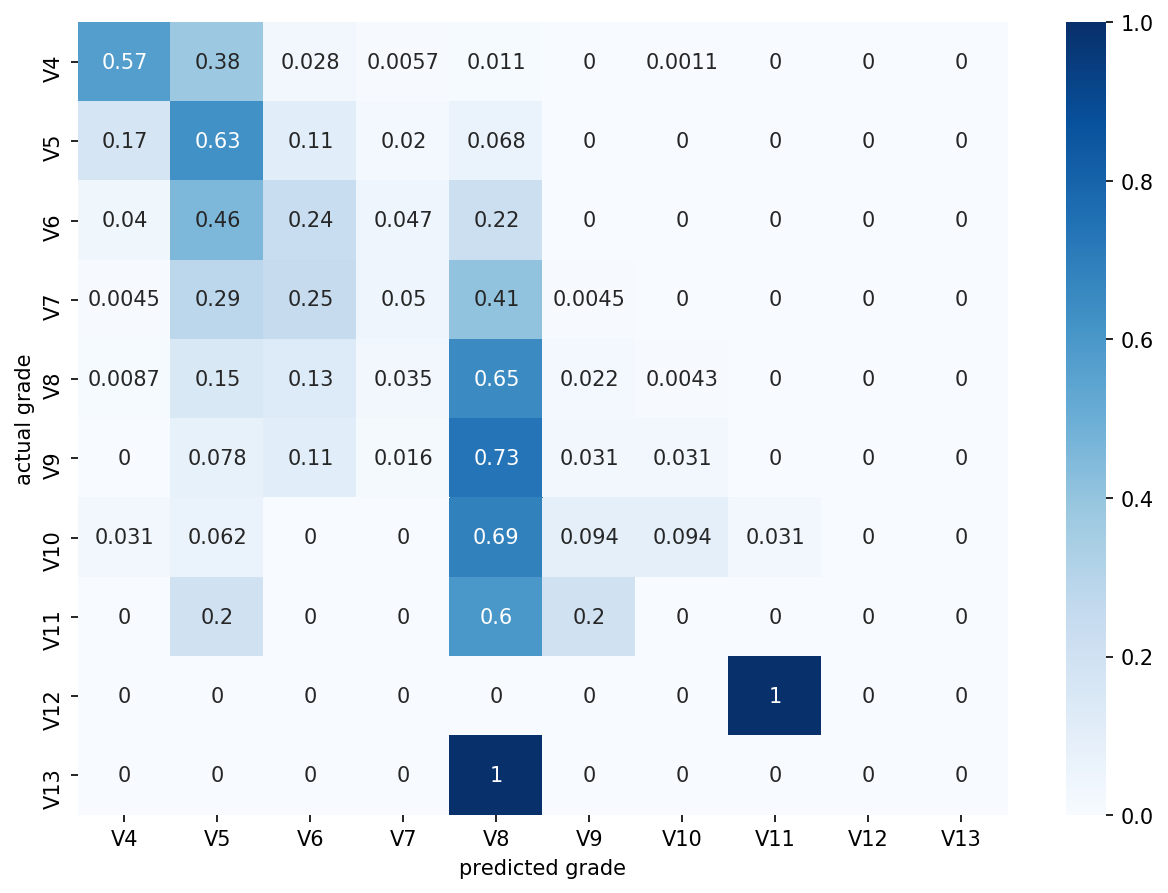

In [288]:
conf_matrix = confusion_matrix(Y_dev, modelc0.predict(X_dev_converted).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

In [318]:
from keras.layers import AveragePooling1D

In [289]:
F1_c0 = metrics.f1_score(Y_dev, modelc0.predict(X_dev_converted).argmax(axis = 1), average = 'macro')
print(F1_c0)

0.21604084319171862


### Model C1: combine 2 layers

In [179]:
import keras.backend as K

In [180]:
np.random.seed(0)
tf.random.set_seed(0)
inputs = Input(shape = (12, 22))
mask = Masking(mask_value = 0.).compute_mask(inputs)
lstm0 = LSTM(20, activation='relu', input_shape=(12, 22), kernel_initializer='glorot_normal', return_sequences = 'True')(
    inputs, mask = mask)
dense1 = Dense(100, activation='relu', kernel_initializer='glorot_normal')(lstm0)
dense2 = Dense(80, activation='relu', kernel_initializer='glorot_normal')(dense1)
dense3 = Dense(75, activation='relu', kernel_initializer='glorot_normal')(dense2)
dense4 = Dense(50, activation='relu', kernel_initializer='glorot_normal')(dense3)
dense5 = Dense(20, activation='relu', kernel_initializer='glorot_normal')(dense4)
dense6 = Dense(10, activation='relu', kernel_initializer='glorot_normal')(dense5)
flat = Flatten()(dense6)
softmax2 = Dense(10, activation='softmax', name = 'softmax2')(flat)
lstm1 = LSTM(20, activation='relu', kernel_initializer='glorot_normal', return_sequences = True)(dense6)
lstm2 = LSTM(20, activation='relu', kernel_initializer='glorot_normal')(lstm1)
dense7 = Dense(15, activation='relu', kernel_initializer='glorot_normal')(lstm2)
dense8 = Dense(15, activation='relu', kernel_initializer='glorot_normal')(dense7)
softmax3 = Dense(10, activation='softmax', name = 'softmax2')(dense8)

def custom_loss(layer):
    def loss(y_true,y_pred):
        loss1 = K.sparse_categorical_crossentropy(y_true, y_pred)
        loss2 = K.sparse_categorical_crossentropy(y_true, layer)
        return K.mean(loss1 + loss2, axis=-1)
    return loss

modelc1 = Model(inputs=[inputs], outputs=[softmax3])
modelc1.compile(optimizer='adam', 
                loss=custom_loss(softmax2),
                #loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])

In [190]:
modelc1_2 = Model(inputs=[inputs], outputs=[softmax3])
modelc1_2.compile(optimizer='adam', 
                loss=custom_loss(softmax2),
                #loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])

In [181]:
print(modelc1.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12, 22)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 12, 20)            3440      
_________________________________________________________________
dense_53 (Dense)             (None, 12, 100)           2100      
_________________________________________________________________
dense_54 (Dense)             (None, 12, 80)            8080      
_________________________________________________________________
dense_55 (Dense)             (None, 12, 75)            6075      
_________________________________________________________________
dense_56 (Dense)             (None, 12, 50)            3800      
_________________________________________________________________
dense_57 (Dense)             (None, 12, 20)            1020

In [182]:
historyc1_all = []
np.random.seed(0)

In [183]:
for i in range(10):
    historyc1 = modelc1.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = (X_dev, Y_dev))
    historyc1_all.append(historyc1)

Train on 20157 samples, validate on 2442 samples
Epoch 1/10
20157/20157 [==============================] - 8s 391us/step - loss: 3.8997 - sparse_categorical_accuracy: 0.3699 - val_loss: 3.0641 - val_sparse_categorical_accuracy: 0.4558
Epoch 2/10
20157/20157 [==============================] - 6s 284us/step - loss: 2.8270 - sparse_categorical_accuracy: 0.4661 - val_loss: 2.6189 - val_sparse_categorical_accuracy: 0.4984
Epoch 3/10
20157/20157 [==============================] - 5s 230us/step - loss: 2.5605 - sparse_categorical_accuracy: 0.4891 - val_loss: 2.4712 - val_sparse_categorical_accuracy: 0.5127
Epoch 4/10
20157/20157 [==============================] - 4s 217us/step - loss: 2.4604 - sparse_categorical_accuracy: 0.4997 - val_loss: 2.4240 - val_sparse_categorical_accuracy: 0.5111
Epoch 5/10
20157/20157 [==============================] - 4s 222us/step - loss: 2.4123 - sparse_categorical_accuracy: 0.5070 - val_loss: 2.3787 - val_sparse_categorical_accuracy: 0.5192
Epoch 6/10
20157/2015

In [191]:
historyc1_2_all = []
np.random.seed(0)

In [192]:
for i in range(10):
    historyc1_2 = modelc1_2.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = (X_dev, Y_dev), 
                                class_weight = {0:1, 1:1, 2:2, 3: 2, 4: 1, 5: 4, 6:2, 7: 4, 8: 8, 9: 8})
    historyc1_2_all.append(historyc1_2)

Train on 20157 samples, validate on 2442 samples
Epoch 1/10
20157/20157 [==============================] - 8s 407us/step - loss: 2.7319 - sparse_categorical_accuracy: 0.5656 - val_loss: 2.3668 - val_sparse_categorical_accuracy: 0.5242
Epoch 2/10
20157/20157 [==============================] - 5s 263us/step - loss: 2.7185 - sparse_categorical_accuracy: 0.5678 - val_loss: 2.3954 - val_sparse_categorical_accuracy: 0.5197
Epoch 3/10
20157/20157 [==============================] - 5s 259us/step - loss: 2.7226 - sparse_categorical_accuracy: 0.5644 - val_loss: 2.3906 - val_sparse_categorical_accuracy: 0.5172
Epoch 4/10
20157/20157 [==============================] - 5s 261us/step - loss: 2.7026 - sparse_categorical_accuracy: 0.5706 - val_loss: 2.3915 - val_sparse_categorical_accuracy: 0.5139
Epoch 5/10
20157/20157 [==============================] - 5s 271us/step - loss: 2.7090 - sparse_categorical_accuracy: 0.5705 - val_loss: 2.4009 - val_sparse_categorical_accuracy: 0.5053
Epoch 6/10
20157/2015

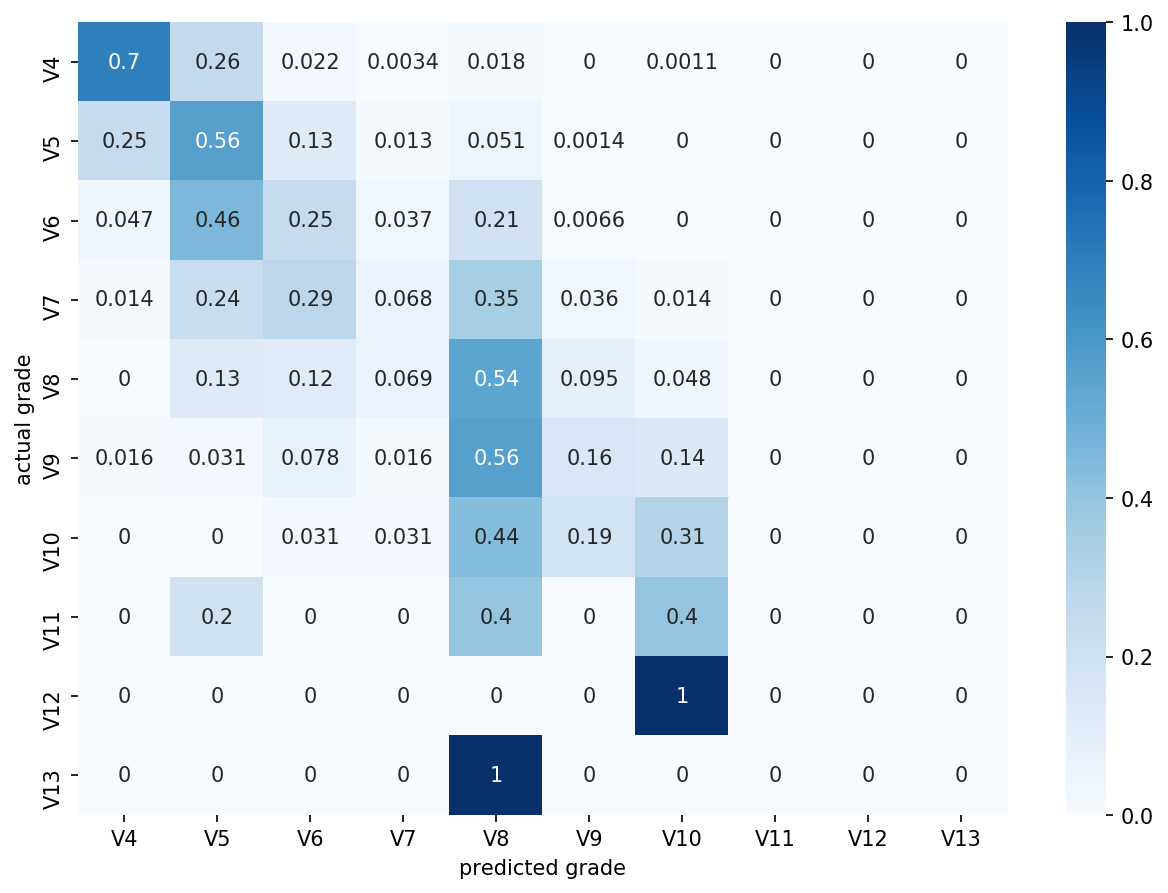

In [189]:
conf_matrix = confusion_matrix(Y_dev, modelc1.predict(X_dev).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

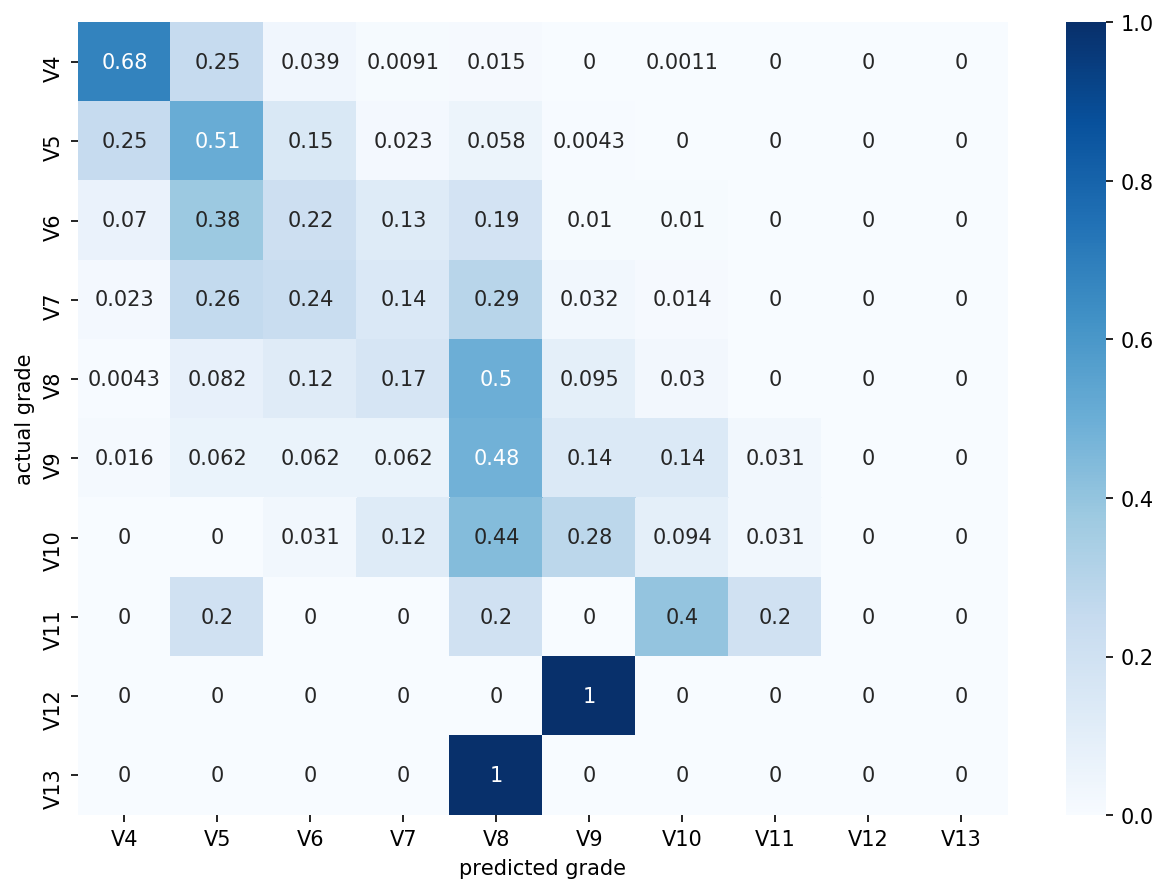

In [195]:
conf_matrix = confusion_matrix(Y_dev, modelc1_2.predict(X_dev).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

In [207]:
compute_accuracy(Y_dev, modelc1.predict(X_dev).argmax(axis=1))

(0.4860769860769861, 0.8509418509418509)

In [187]:
from sklearn import metrics

In [188]:
F1_c1 = metrics.f1_score(Y_dev, modelc1.predict(X_dev).argmax(axis=1), average = 'macro')
print(F1_c1)

0.24882571364917


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [196]:
F1_c1_2 = metrics.f1_score(Y_dev, modelc1_2.predict(X_dev).argmax(axis=1), average = 'macro')
print(F1_c1_2)

0.24737522421619335


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [185]:
model_json = modelc1.to_json()
with open("modelc1.json", "w") as json_file:
    json_file.write(model_json)
modelc1.save_weights("modelc1.h5")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/engine/network.py:896: UserWarning: Layer lstm_17 was passed non-serializable keyword arguments: {'mask': <tf.Tensor 'Any:0' shape=(None, 12) dtype=bool>}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  '. They will not be included '


In [208]:
model_json = modelc1_2.to_json()
with open("modelc1_2.json", "w") as json_file:
    json_file.write(model_json)
modelc1_2.save_weights("modelc1_2.h5")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/engine/network.py:896: UserWarning: Layer lstm_17 was passed non-serializable keyword arguments: {'mask': <tf.Tensor 'Any:0' shape=(None, 12) dtype=bool>}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  '. They will not be included '


In [209]:
modelc1_2.save_weights("modelc1_2.h5")

In [211]:
inputs = Input(shape = (12, 22))
mask = Masking(mask_value = 0.).compute_mask(inputs)
lstm0 = LSTM(20, activation='relu', input_shape=(12, 22), kernel_initializer='glorot_normal', return_sequences = 'True')(
    inputs, mask = mask)
dense1 = Dense(100, activation='relu', kernel_initializer='glorot_normal')(lstm0)
dense2 = Dense(80, activation='relu', kernel_initializer='glorot_normal')(dense1)
dense3 = Dense(75, activation='relu', kernel_initializer='glorot_normal')(dense2)
dense4 = Dense(50, activation='relu', kernel_initializer='glorot_normal')(dense3)
dense5 = Dense(20, activation='relu', kernel_initializer='glorot_normal')(dense4)
dense6 = Dense(10, activation='relu', kernel_initializer='glorot_normal')(dense5)
flat = Flatten()(dense6)
softmax2 = Dense(10, activation='softmax', name = 'softmax2')(flat)
lstm1 = LSTM(20, activation='relu', kernel_initializer='glorot_normal', return_sequences = True)(dense6)
lstm2 = LSTM(20, activation='relu', kernel_initializer='glorot_normal')(lstm1)
dense7 = Dense(15, activation='relu', kernel_initializer='glorot_normal')(lstm2)
dense8 = Dense(15, activation='relu', kernel_initializer='glorot_normal')(dense7)
softmax3 = Dense(10, activation='softmax', name = 'softmax2')(dense8)

def custom_loss(layer):
    def loss(y_true,y_pred):
        loss1 = K.sparse_categorical_crossentropy(y_true, y_pred)
        loss2 = K.sparse_categorical_crossentropy(y_true, layer)
        return K.mean(loss1 + loss2, axis=-1)
    return loss

model_recover = Model(inputs=[inputs], outputs=[softmax3])
model_recover.compile(optimizer='adam', 
                loss=custom_loss(softmax2),
                #loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])

In [212]:
model_recover.load_weights('modelc1_2.h5')

In [213]:
F1_rec = metrics.f1_score(Y_dev, model_recover.predict(X_dev).argmax(axis=1), average = 'macro')
print(F1_rec)

0.24737522421619335


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [216]:
compute_accuracy(Y_train, model_recover.predict(X_train).argmax(axis=1))

(0.6625986009822891, 0.9119908716574887)

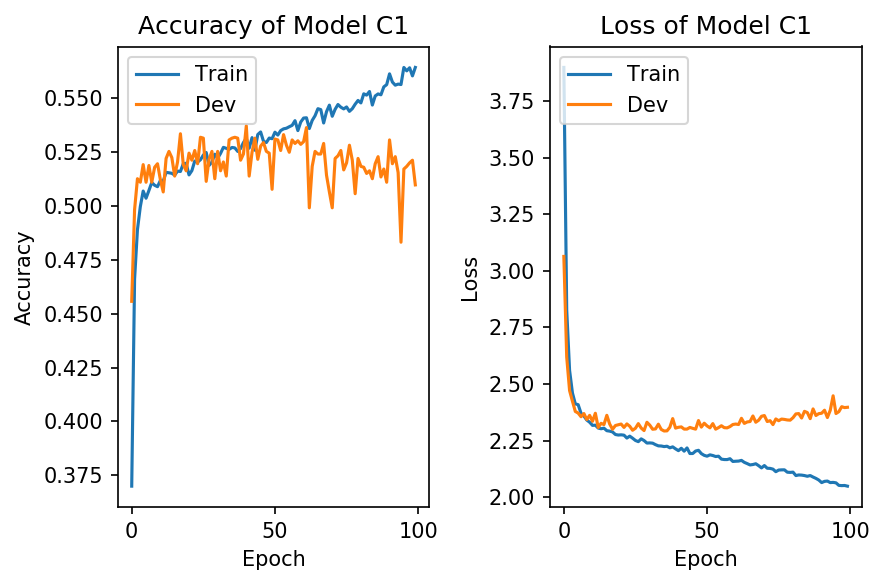

In [247]:
plot_history(historyc1_all, 'Model C1')

In [217]:
len(Y_train)

20157

In [218]:
len(Y_dev)

2442

In [219]:
len(Y_test)

2497

### Model C1_3: change to tanh

In [225]:
np.random.seed(0)
tf.random.set_seed(0)
inputs = Input(shape = (12, 22))
mask = Masking(mask_value = 0.).compute_mask(inputs)
lstm0 = LSTM(20, activation='tanh', input_shape=(12, 22), kernel_initializer='glorot_normal', return_sequences = 'True')(
    inputs, mask = mask)
dense1 = Dense(100, activation='relu', kernel_initializer='glorot_normal')(lstm0)
dense2 = Dense(80, activation='relu', kernel_initializer='glorot_normal')(dense1)
dense3 = Dense(75, activation='relu', kernel_initializer='glorot_normal')(dense2)
dense4 = Dense(50, activation='relu', kernel_initializer='glorot_normal')(dense3)
dense5 = Dense(20, activation='relu', kernel_initializer='glorot_normal')(dense4)
dense6 = Dense(10, activation='relu', kernel_initializer='glorot_normal')(dense5)
flat = Flatten()(dense6)
softmax2 = Dense(10, activation='softmax', name = 'softmax2')(flat)
lstm1 = LSTM(20, activation='tanh', kernel_initializer='glorot_normal', return_sequences = True)(dense6)
lstm2 = LSTM(20, activation='tanh', kernel_initializer='glorot_normal')(lstm1)
dense7 = Dense(15, activation='relu', kernel_initializer='glorot_normal')(lstm2)
dense8 = Dense(15, activation='relu', kernel_initializer='glorot_normal')(dense7)
softmax3 = Dense(10, activation='softmax', name = 'softmax2')(dense8)

def custom_loss(layer):
    def loss(y_true,y_pred):
        loss1 = K.sparse_categorical_crossentropy(y_true, y_pred)
        loss2 = K.sparse_categorical_crossentropy(y_true, layer)
        return K.mean(loss1 + loss2, axis=-1)
    return loss

modelc1_3 = Model(inputs=[inputs], outputs=[softmax3])
modelc1_3.compile(optimizer='adam', 
                loss=custom_loss(softmax2),
                metrics=['sparse_categorical_accuracy'])

In [226]:
historyc1_3_all = []

In [227]:
for i in range(10):
    historyc1_3 = modelc1_3.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = (X_dev, Y_dev), 
                                class_weight = {0:1, 1:1, 2:2, 3: 2, 4: 1, 5: 4, 6:2, 7: 4, 8: 8, 9: 8})
    historyc1_3_all.append(historyc1_3)

Train on 20157 samples, validate on 2442 samples
Epoch 1/10
20157/20157 [==============================] - 6s 314us/step - loss: 5.0519 - sparse_categorical_accuracy: 0.3964 - val_loss: 3.0839 - val_sparse_categorical_accuracy: 0.4611
Epoch 2/10
20157/20157 [==============================] - 4s 205us/step - loss: 3.9058 - sparse_categorical_accuracy: 0.4842 - val_loss: 2.7690 - val_sparse_categorical_accuracy: 0.5094
Epoch 3/10
20157/20157 [==============================] - 3s 169us/step - loss: 3.5944 - sparse_categorical_accuracy: 0.4947 - val_loss: 2.5628 - val_sparse_categorical_accuracy: 0.4996
Epoch 4/10
20157/20157 [==============================] - 3s 169us/step - loss: 3.3471 - sparse_categorical_accuracy: 0.4997 - val_loss: 2.4615 - val_sparse_categorical_accuracy: 0.5074
Epoch 5/10
20157/20157 [==============================] - 3s 172us/step - loss: 3.2468 - sparse_categorical_accuracy: 0.5036 - val_loss: 2.4079 - val_sparse_categorical_accuracy: 0.5217
Epoch 6/10
20157/2015

In [232]:
for i in range(10):
    historyc1_3 = modelc1_3.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = (X_dev, Y_dev), 
                                class_weight = {0:1, 1:1, 2:2, 3: 4, 4: 1, 5: 4, 6: 8, 7: 8, 8: 8, 9: 8})
    historyc1_3_all.append(historyc1_3)

Train on 20157 samples, validate on 2442 samples
Epoch 1/10
20157/20157 [==============================] - 4s 206us/step - loss: 3.3302 - sparse_categorical_accuracy: 0.5531 - val_loss: 2.3817 - val_sparse_categorical_accuracy: 0.5217
Epoch 2/10
20157/20157 [==============================] - 4s 191us/step - loss: 3.3118 - sparse_categorical_accuracy: 0.5532 - val_loss: 2.3758 - val_sparse_categorical_accuracy: 0.5188
Epoch 3/10
20157/20157 [==============================] - 4s 195us/step - loss: 3.3167 - sparse_categorical_accuracy: 0.5561 - val_loss: 2.4001 - val_sparse_categorical_accuracy: 0.5016
Epoch 4/10
20157/20157 [==============================] - 4s 196us/step - loss: 3.3111 - sparse_categorical_accuracy: 0.5569 - val_loss: 2.3902 - val_sparse_categorical_accuracy: 0.5045
Epoch 5/10
20157/20157 [==============================] - 4s 190us/step - loss: 3.3109 - sparse_categorical_accuracy: 0.5521 - val_loss: 2.3665 - val_sparse_categorical_accuracy: 0.5254
Epoch 6/10
20157/2015

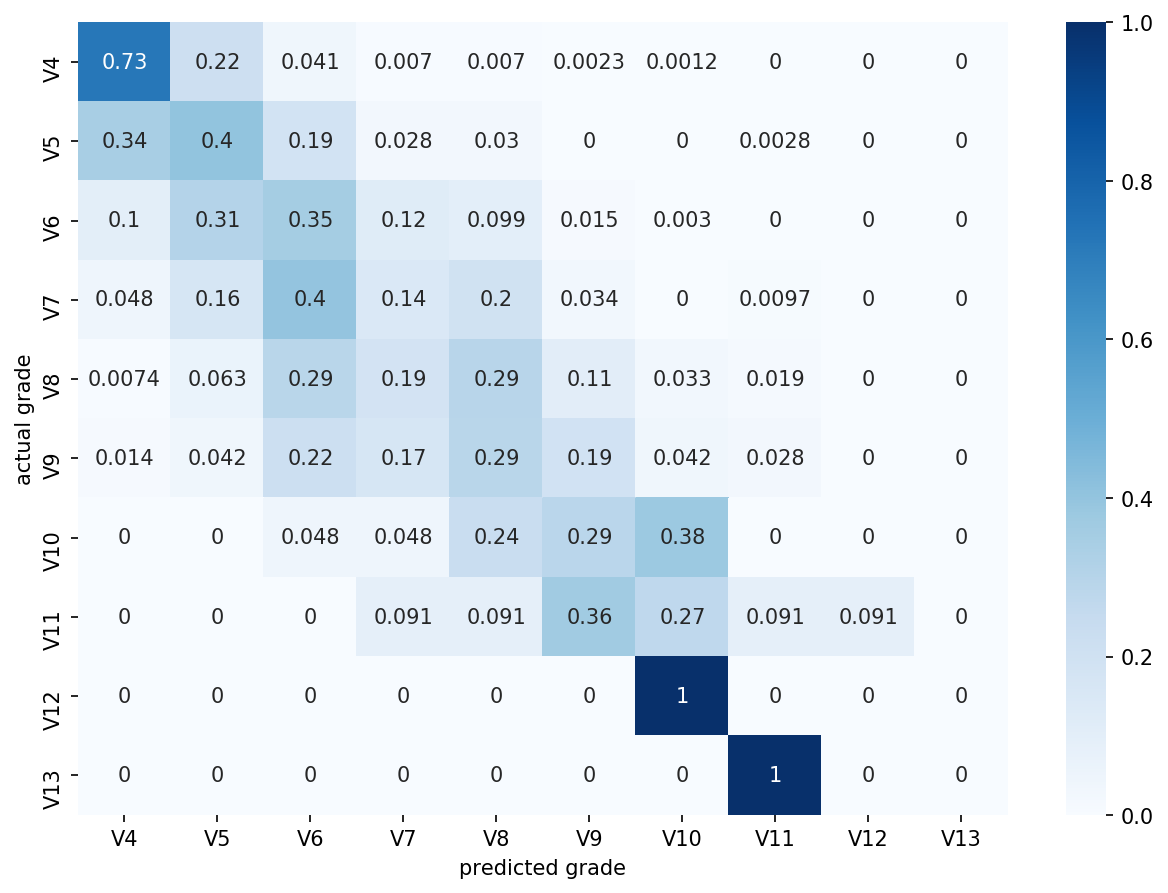

In [237]:
conf_matrix = confusion_matrix(Y_test, modelc1_3.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

In [288]:
F1_rec = metrics.f1_score(Y_train, modelc1_3.predict(X_train).argmax(axis=1), average = 'macro')
print(F1_rec)

0.5057003231041498


In [286]:
compute_accuracy(Y_train, modelc1_3.predict(X_train).argmax(axis=1))

(0.6426551570174133, 0.9129334722428933)

In [314]:
model_json = modelc1_3.to_json()
with open("modelc1_3.json", "w") as json_file:
    json_file.write(model_json)
modelc1_3.save_weights("modelc1_3.h5")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/engine/network.py:896: UserWarning: Layer lstm_33 was passed non-serializable keyword arguments: {'mask': <tf.Tensor 'Any_6:0' shape=(None, 12) dtype=bool>}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  '. They will not be included '


In [316]:
modelc1_3.save_weights("modelc1_3.h5")

In [324]:
def plot_history(history_all, model_name):
    # Plot training & validation accuracy values
    acc = []
    val_acc = []
    loss = []
    val_loss = []
    for history in history_all:
        acc.append(history.history['sparse_categorical_accuracy'])
        val_acc.append(history.history['val_sparse_categorical_accuracy'])
        loss.append(history.history['loss'])
        val_loss.append(history.history['val_loss'])

    acc = sum(acc, [])
    val_acc = sum(val_acc, [])
    loss = sum(loss, [])
    val_loss = sum(val_loss, [])

    fig, axes = plt.subplots(nrows = 1, ncols = 2, dpi = 150)
    axes[0].plot(acc)
    axes[0].plot(val_acc)
    axes[0].set_title('Accuracy of '+ model_name)
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['Train', 'Dev'], loc='upper left')

    axes[1].plot(loss)
    axes[1].plot(val_loss)
    axes[1].set_title('Loss of ' + model_name)
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['Train', 'Dev'], loc='upper left')
    plt.tight_layout()
    return

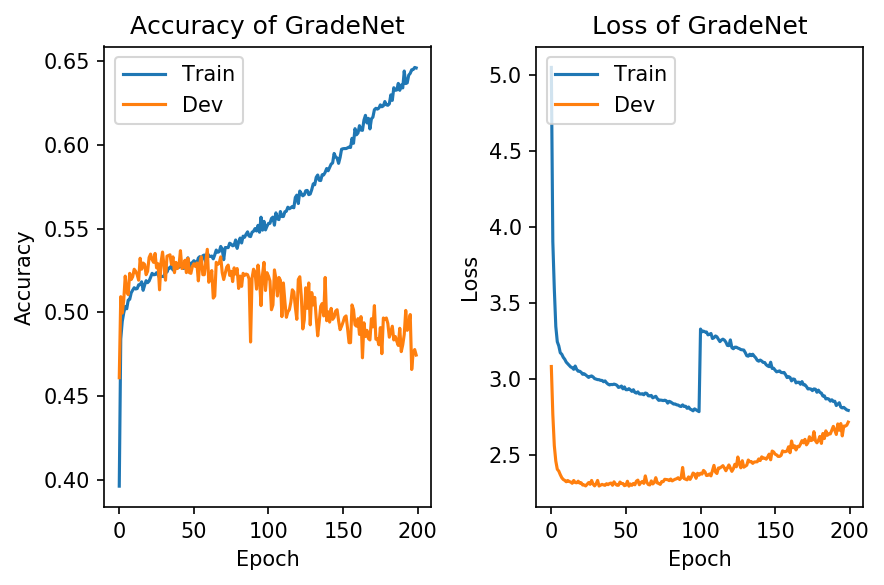

In [325]:
plot_history(historyc1_3_all, 'GradeNet')

In [259]:
(Y_test).astype(int)

array([2, 1, 1, ..., 2, 0, 1])

In [260]:
tf.one_hot(Y_test.astype(int), depth = 10)

<tf.Tensor: shape=(2497, 10), dtype=float32, numpy=
array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)>

In [261]:
kl = tf.keras.losses.KLDivergence()
kl(tf.one_hot(Y_test.astype(int), depth = 10), modelc1_3.predict(X_test)).numpy()

1.392339

In [269]:
Y_test

array([2., 1., 1., ..., 2., 0., 1.])

In [290]:
# MAE
np.mean(np.abs(Y_train - modelc1_3.predict(X_train).argmax(axis=1)))

0.4649997519472144

In [297]:
from sklearn.metrics import classification_report

In [301]:
import pandas as pd
import numpy as np
from scipy import interp

from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

In [299]:
sk_report = classification_report(
    digits=4,
    y_true=Y_test, 
    y_pred=modelc1_3.predict(X_test).argmax(axis=1))
print(sk_report)

              precision    recall  f1-score   support

         0.0     0.6757    0.7263    0.7001       855
         1.0     0.4637    0.4050    0.4324       726
         2.0     0.2516    0.3533    0.2939       334
         3.0     0.1875    0.1449    0.1635       207
         4.0     0.3798    0.2937    0.3312       269
         5.0     0.2090    0.1944    0.2014        72
         6.0     0.3077    0.3810    0.3404        21
         7.0     0.0769    0.0909    0.0833        11
         8.0     0.0000    0.0000    0.0000         1
         9.0     0.0000    0.0000    0.0000         1

    accuracy                         0.4666      2497
   macro avg     0.2552    0.2589    0.2546      2497
weighted avg     0.4653    0.4666    0.4630      2497



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [305]:
report_with_auc = class_report(
    y_true=Y_test, 
    y_pred=modelc1_3.predict(X_test).argmax(axis=1), 
    y_score=modelc1_3.predict(X_test))
print(report_with_auc)

             precision    recall  f1-score  support    pred       AUC
0             0.675734  0.726316  0.700113    855.0   919.0  0.868536
1             0.463722  0.404959  0.432353    726.0   634.0  0.715155
2             0.251599  0.353293  0.293898    334.0   469.0  0.733898
3             0.187500  0.144928  0.163488    207.0   160.0  0.773447
4             0.379808  0.293680  0.331237    269.0   208.0  0.872511
5             0.208955  0.194444  0.201439     72.0    67.0  0.886128
6             0.307692  0.380952  0.340426     21.0    26.0  0.959862
7             0.076923  0.090909  0.083333     11.0    13.0  0.976011
8             0.000000  0.000000  0.000000      1.0     1.0  0.925881
avg / total   0.465271  0.466560  0.463020   2496.0  2496.0  0.908078


In [312]:
metrics.roc_auc_score(Y_test, modelc1_3.predict(X_test).argmax(axis=1), multi_class= 'ovr', average="macro")

TypeError: roc_auc_score() got an unexpected keyword argument 'multi_class'

In [320]:
modelc1_3.predict(X_test)

array([[4.24967669e-02, 1.21112555e-01, 2.80977190e-01, ...,
        1.80181320e-04, 1.86360376e-05, 6.54933319e-05],
       [5.83389282e-01, 3.68347496e-01, 4.60627191e-02, ...,
        7.64605829e-07, 1.09859101e-07, 1.67769340e-05],
       [3.24592799e-01, 6.42536581e-01, 3.10683120e-02, ...,
        4.10226448e-07, 9.88865878e-09, 2.74753620e-06],
       ...,
       [9.95926037e-02, 6.45443738e-01, 5.78333139e-02, ...,
        1.64277008e-04, 9.74706563e-06, 3.05083777e-05],
       [9.98235226e-01, 1.29287271e-03, 4.07177955e-04, ...,
        1.81710380e-08, 1.51082880e-08, 3.89814049e-05],
       [3.38027924e-02, 1.80968642e-01, 2.26777926e-01, ...,
        2.73562473e-04, 5.14333042e-05, 1.02610531e-04]], dtype=float32)

In [321]:
model_recover.load_weights('/Users/jrchang612/MoonboardRNN/model/modelc1_3.h5')

In [322]:
model_recover.predict(X_test)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Model C1_4: use KL divergence + crossentropy

In [275]:
np.random.seed(0)
tf.random.set_seed(0)
inputs = Input(shape = (12, 22))
mask = Masking(mask_value = 0.).compute_mask(inputs)
lstm0 = LSTM(20, activation='tanh', input_shape=(12, 22), kernel_initializer='glorot_normal', return_sequences = 'True')(
    inputs, mask = mask)
dense1 = Dense(100, activation='relu', kernel_initializer='glorot_normal')(lstm0)
dense2 = Dense(80, activation='relu', kernel_initializer='glorot_normal')(dense1)
dense3 = Dense(75, activation='relu', kernel_initializer='glorot_normal')(dense2)
dense4 = Dense(50, activation='relu', kernel_initializer='glorot_normal')(dense3)
dense5 = Dense(20, activation='relu', kernel_initializer='glorot_normal')(dense4)
dense6 = Dense(10, activation='relu', kernel_initializer='glorot_normal')(dense5)
flat = Flatten()(dense6)
softmax2 = Dense(10, activation='softmax', name = 'softmax2')(flat)
lstm1 = LSTM(20, activation='tanh', kernel_initializer='glorot_normal', return_sequences = True)(dense6)
lstm2 = LSTM(20, activation='tanh', kernel_initializer='glorot_normal')(lstm1)
dense7 = Dense(15, activation='relu', kernel_initializer='glorot_normal')(lstm2)
dense8 = Dense(15, activation='relu', kernel_initializer='glorot_normal')(dense7)
softmax3 = Dense(10, activation='softmax', name = 'softmax2')(dense8)

def custom_loss2(layer):
    def loss(y_true,y_pred):
        loss1 = K.sparse_categorical_crossentropy(y_true, y_pred)
        loss2 = tf.keras.losses.KLD(tf.one_hot(
            tf.dtypes.cast(y_true, tf.int32), depth = 10), layer)
        return K.mean(loss1 + loss2, axis=-1)
    return loss

modelc1_4 = Model(inputs=[inputs], outputs=[softmax3])
modelc1_4.compile(optimizer='adam', 
                loss=custom_loss2(softmax2),
                metrics=['sparse_categorical_accuracy'])

In [276]:
historyc1_4_all = []

In [277]:
for i in range(10):
    historyc1_4 = modelc1_4.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = (X_dev, Y_dev), 
                                class_weight = {0:1, 1:1, 2:2, 3: 4, 4: 1, 5: 4, 6: 8, 7: 8, 8: 8, 9: 8})
    historyc1_4_all.append(historyc1_4)

Train on 20157 samples, validate on 2442 samples
Epoch 1/10
20157/20157 [==============================] - 6s 291us/step - loss: 6.3502 - sparse_categorical_accuracy: 0.3535 - val_loss: 3.5979 - val_sparse_categorical_accuracy: 0.3620
Epoch 2/10
20157/20157 [==============================] - 5s 237us/step - loss: 5.2137 - sparse_categorical_accuracy: 0.4556 - val_loss: 3.0646 - val_sparse_categorical_accuracy: 0.4992
Epoch 3/10
20157/20157 [==============================] - 5s 229us/step - loss: 4.9838 - sparse_categorical_accuracy: 0.4994 - val_loss: 3.0076 - val_sparse_categorical_accuracy: 0.5094
Epoch 4/10
20157/20157 [==============================] - 5s 232us/step - loss: 4.9460 - sparse_categorical_accuracy: 0.5022 - val_loss: 3.0051 - val_sparse_categorical_accuracy: 0.5111
Epoch 5/10
20157/20157 [==============================] - 5s 226us/step - loss: 4.9215 - sparse_categorical_accuracy: 0.5042 - val_loss: 2.9841 - val_sparse_categorical_accuracy: 0.5192
Epoch 6/10
20157/2015

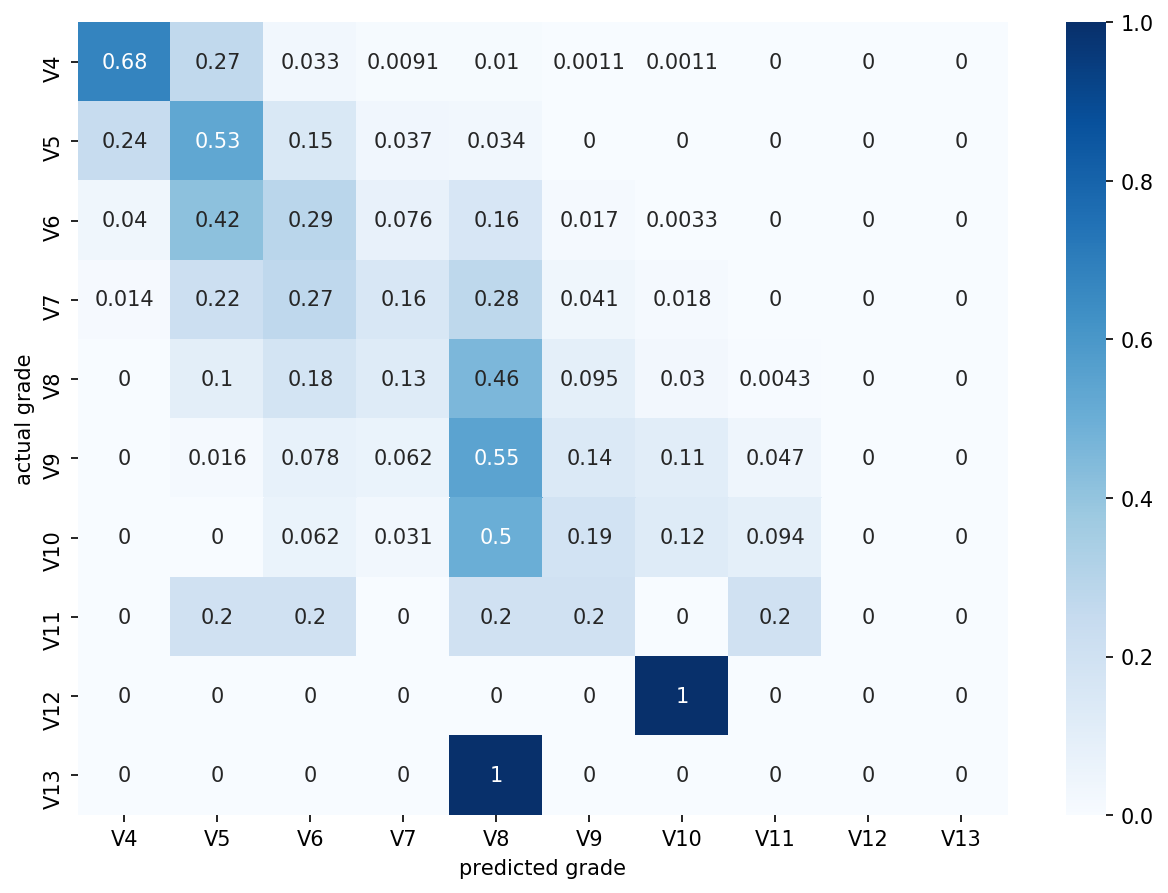

In [279]:
conf_matrix = confusion_matrix(Y_dev, modelc1_4.predict(X_dev).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

In [280]:
F1_c1_4 = metrics.f1_score(Y_dev, modelc1_4.predict(X_dev).argmax(axis=1), average = 'macro')
print(F1_c1_4)

0.2535364449995873


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [283]:
compute_accuracy(Y_dev, modelc1_4.predict(X_dev).argmax(axis=1))

(0.49836199836199835, 0.85995085995086)

In [284]:
model_json = modelc1_4.to_json()
with open("modelc1_4.json", "w") as json_file:
    json_file.write(model_json)
modelc1_4.save_weights("modelc1_4.h5")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/engine/network.py:896: UserWarning: Layer lstm_42 was passed non-serializable keyword arguments: {'mask': <tf.Tensor 'Any_9:0' shape=(None, 12) dtype=bool>}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  '. They will not be included '


### Model C1b: add batchnorm and dropout

In [200]:
np.random.seed(0)
tf.random.set_seed(0)
inputs = Input(shape = (12, 22))
mask = Masking(mask_value = 0.).compute_mask(inputs)
lstm0 = LSTM(20, activation='relu', input_shape=(12, 22), kernel_initializer='glorot_normal', return_sequences = 'True')(
    inputs, mask = mask)
dense1 = Dense(100, activation='relu', kernel_initializer='glorot_normal')(lstm0)
bn1 = BatchNormalization()(dense1)
drop1 = Dropout(0.5)(bn1)
dense2 = Dense(80, activation='relu', kernel_initializer='glorot_normal')(drop1)
bn2 = BatchNormalization()(dense2)
drop2 = Dropout(0.5)(bn2)
dense3 = Dense(75, activation='relu', kernel_initializer='glorot_normal')(drop2)
bn3 = BatchNormalization()(dense3)
drop3 = Dropout(0.5)(bn3)
dense4 = Dense(50, activation='relu', kernel_initializer='glorot_normal')(drop3)
bn4 = BatchNormalization()(dense4)
drop4 = Dropout(0.5)(bn4)
dense5 = Dense(20, activation='relu', kernel_initializer='glorot_normal')(drop4)
bn5 = BatchNormalization()(dense5)
dense6 = Dense(10, activation='relu', kernel_initializer='glorot_normal')(bn5)
bn6 = BatchNormalization()(dense6)
flat = Flatten()(bn6)
softmax2 = Dense(10, activation='softmax', name = 'softmax2')(flat)
lstm1 = Bidirectional(LSTM(20, activation='relu', kernel_initializer='glorot_normal', return_sequences = True))(dense6)
lstm2 = Bidirectional(LSTM(20, activation='relu', kernel_initializer='glorot_normal'))(lstm1)
dense7 = Dense(15, activation='relu', kernel_initializer='glorot_normal')(lstm2)
bn7 = BatchNormalization()(dense7)
drop7 = Dropout(0.5)(bn7)
dense8 = Dense(15, activation='relu', kernel_initializer='glorot_normal')(drop7)
bn8 = BatchNormalization()(dense8)
softmax3 = Dense(10, activation='softmax', name = 'softmax2')(bn8)

def custom_loss(layer):
    def loss(y_true,y_pred):
        loss1 = K.sparse_categorical_crossentropy(y_true, y_pred)
        loss2 = K.sparse_categorical_crossentropy(y_true, layer)
        return K.mean(loss1 + loss2, axis=-1)
    return loss

modelc1b = Model(inputs=[inputs], outputs=[softmax3])
modelc1b.compile(optimizer='adam', 
                loss=custom_loss(softmax2),
                #loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])

In [201]:
historyc1b_all = []
np.random.seed(0)

In [202]:
for i in range(10):
    historyc1b = modelc1b.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = (X_dev, Y_dev), 
                                class_weight = {0:1, 1:1, 2:2, 3: 2, 4: 1, 5: 4, 6:4, 7: 8, 8: 16, 9: 16})
    historyc1b_all.append(historyc1b)

Train on 20157 samples, validate on 2442 samples
Epoch 1/10
20157/20157 [==============================] - 12s 615us/step - loss: 6.9948 - sparse_categorical_accuracy: 0.1762 - val_loss: 4.4604 - val_sparse_categorical_accuracy: 0.3616
Epoch 2/10
20157/20157 [==============================] - 7s 362us/step - loss: 5.7755 - sparse_categorical_accuracy: 0.3546 - val_loss: 4.1993 - val_sparse_categorical_accuracy: 0.3812
Epoch 3/10
20157/20157 [==============================] - 7s 366us/step - loss: 4.9571 - sparse_categorical_accuracy: 0.4422 - val_loss: 3.8207 - val_sparse_categorical_accuracy: 0.4550
Epoch 4/10
20157/20157 [==============================] - 7s 368us/step - loss: 4.5561 - sparse_categorical_accuracy: 0.4619 - val_loss: 3.7197 - val_sparse_categorical_accuracy: 0.4619
Epoch 5/10
20157/20157 [==============================] - 8s 373us/step - loss: 4.3286 - sparse_categorical_accuracy: 0.4669 - val_loss: 3.6039 - val_sparse_categorical_accuracy: 0.4832
Epoch 6/10
20157/201

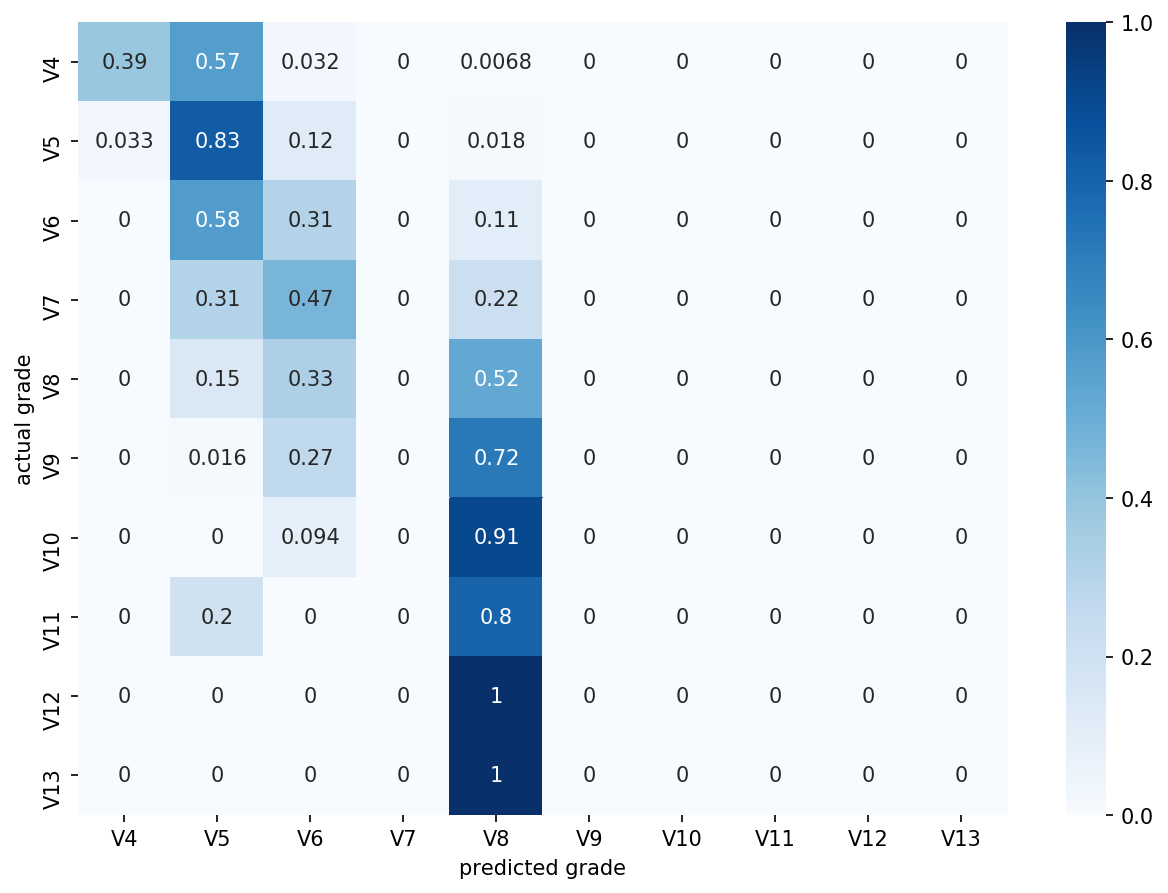

In [203]:
conf_matrix = confusion_matrix(Y_dev, modelc1b.predict(X_dev).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

In [204]:
def compute_accuracy(y_true, y_predict):
    complete_accurate = np.sum(y_true == y_predict)/len(y_true)
    roughly_accurate = np.sum(np.abs(y_true - y_predict) <= 1)/len(y_true)
    return (complete_accurate, roughly_accurate)

### Model C3: add batch norm

In [421]:
inputs = Input(shape = (12, 22))
mask = Masking(mask_value = 0.).compute_mask(inputs)
lstm0 = LSTM(20, activation='relu', input_shape=(12, 22), kernel_initializer='glorot_normal', return_sequences = 'True')(
    inputs, mask = mask)
dense1 = Dense(100, activation='relu', kernel_initializer='glorot_normal')(lstm0)
bn1 = BatchNormalization()(dense1)
dense2 = Dense(80, activation='relu', kernel_initializer='glorot_normal')(bn1)
bn2 = BatchNormalization()(dense2)
dense3 = Dense(75, activation='relu', kernel_initializer='glorot_normal')(bn2)
bn3 = BatchNormalization()(dense3)
dense4 = Dense(50, activation='relu', kernel_initializer='glorot_normal')(bn3)
bn4 = BatchNormalization()(dense4)
dense5 = Dense(20, activation='relu', kernel_initializer='glorot_normal')(bn4)
bn5 = BatchNormalization()(dense5)
dense6 = Dense(10, activation='relu', kernel_initializer='glorot_normal')(dense5)
bn6 = BatchNormalization()(dense6)
flat = Flatten()(bn6)
softmax2 = Dense(10, activation='softmax', name = 'softmax2')(flat)
lstm1 = LSTM(20, activation='relu', kernel_initializer='glorot_normal', return_sequences = True)(bn6)
bn7 = BatchNormalization()(lstm1)
lstm2 = LSTM(20, activation='relu', kernel_initializer='glorot_normal')(bn7)
bn8 = BatchNormalization()(lstm2)
dense7 = Dense(15, activation='relu', kernel_initializer='glorot_normal')(bn8)
bn9 = BatchNormalization()(dense7)
dense8 = Dense(15, activation='relu', kernel_initializer='glorot_normal')(bn9)
bn10 = BatchNormalization()(dense8)
softmax3 = Dense(10, activation='softmax', name = 'softmax2')(bn10)

def custom_loss(layer):
    def loss(y_true,y_pred):
        loss1 = K.sparse_categorical_crossentropy(y_true, y_pred)
        loss2 = K.sparse_categorical_crossentropy(y_true, layer)
        return K.mean(loss1 + loss2, axis=-1)
    return loss

modelc3 = Model(inputs=[inputs], outputs=[softmax3])
modelc3.compile(optimizer='adam', 
                loss=custom_loss(softmax2),
                #loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])

In [422]:
historyc3_all = []
np.random.seed(0)

In [423]:
for i in range(10):
    historyc3 = modelc3.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = (X_dev, Y_dev))
    historyc3_all.append(historyc3)

Train on 24603 samples, validate on 2442 samples
Epoch 1/10
24603/24603 [==============================] - 9s 363us/step - loss: 4.0613 - sparse_categorical_accuracy: 0.2579 - val_loss: 4.3605 - val_sparse_categorical_accuracy: 0.2879
Epoch 2/10
24603/24603 [==============================] - 6s 257us/step - loss: 3.1900 - sparse_categorical_accuracy: 0.4340 - val_loss: 4.0277 - val_sparse_categorical_accuracy: 0.2879
Epoch 3/10
24603/24603 [==============================] - 6s 261us/step - loss: 2.9006 - sparse_categorical_accuracy: 0.4578 - val_loss: 3.8129 - val_sparse_categorical_accuracy: 0.2609
Epoch 4/10
24603/24603 [==============================] - 6s 247us/step - loss: 2.7530 - sparse_categorical_accuracy: 0.4680 - val_loss: 3.4280 - val_sparse_categorical_accuracy: 0.3038
Epoch 5/10
24603/24603 [==============================] - 6s 247us/step - loss: 2.6731 - sparse_categorical_accuracy: 0.4757 - val_loss: 3.1261 - val_sparse_categorical_accuracy: 0.3681
Epoch 6/10
24603/2460

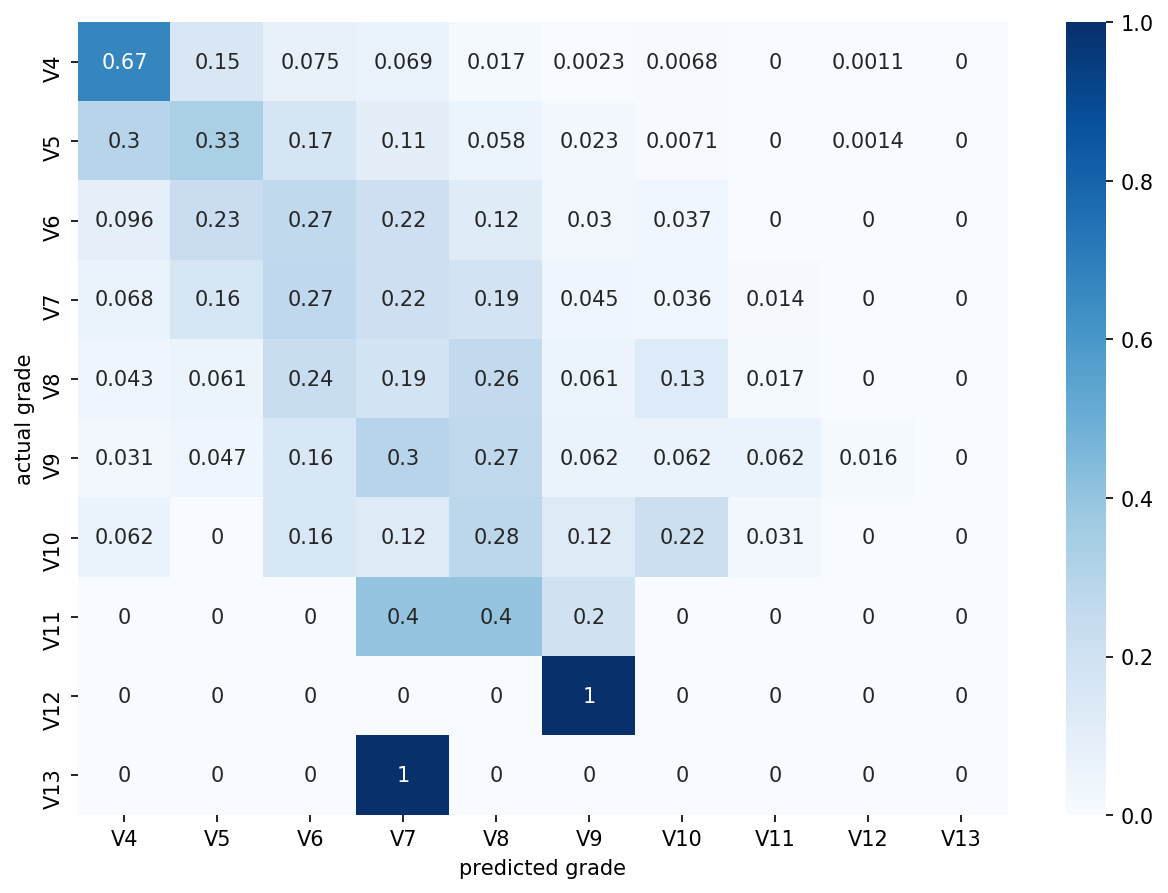

In [425]:
conf_matrix = confusion_matrix(Y_dev, modelc3.predict(X_dev).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

In [433]:
intermediate_layer_model = keras.Model(inputs=modelc3.input,
                                       outputs=modelc3.get_layer('softmax2').output)

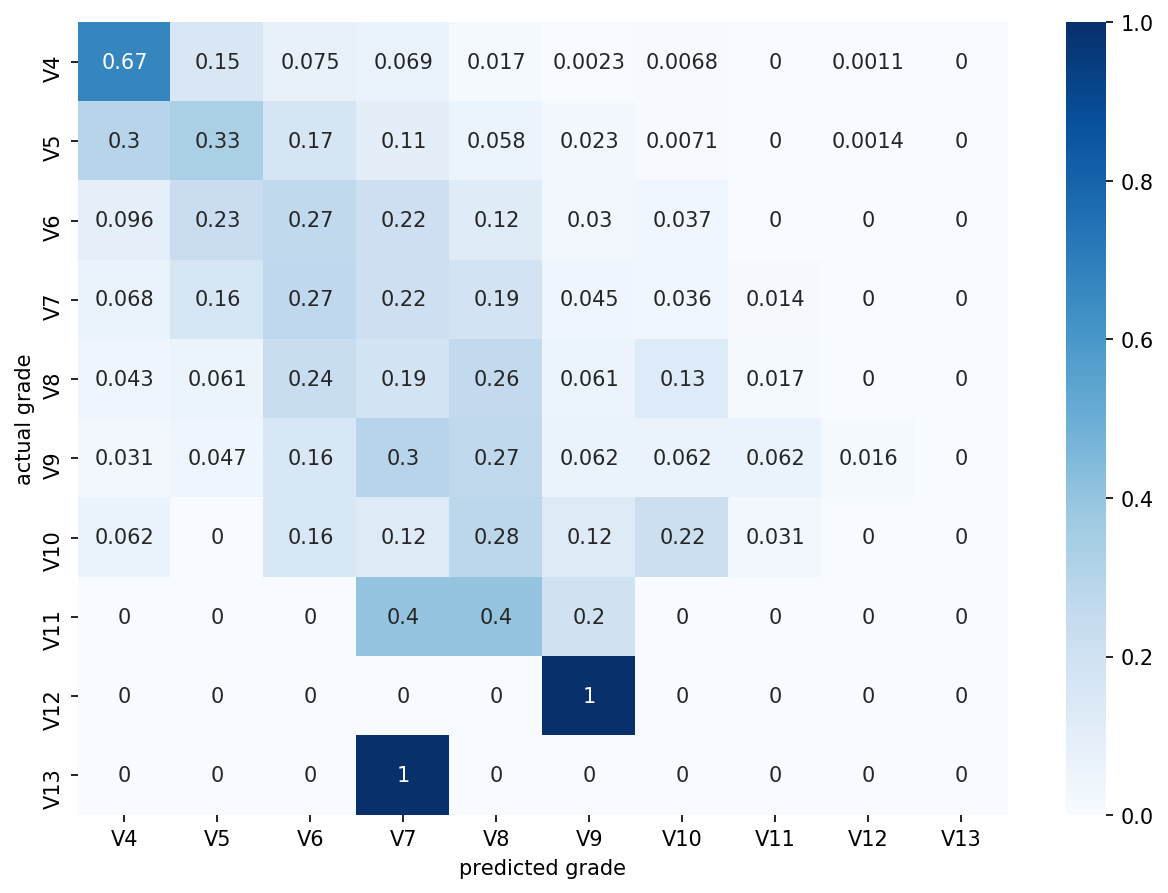

In [435]:
conf_matrix = confusion_matrix(Y_dev, intermediate_layer_model.predict(X_dev).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

In [434]:
.predict(X_dev)

array([[3.11205294e-02, 1.94345981e-01, 5.03526032e-02, ...,
        5.96315222e-05, 1.70934200e-05, 1.50848122e-04],
       [2.23872694e-03, 2.51530521e-02, 6.59871772e-02, ...,
        2.12200009e-03, 4.77384674e-05, 1.10587571e-03],
       [1.22482274e-02, 6.27214387e-02, 4.41928864e-01, ...,
        5.06265031e-04, 7.03243059e-05, 2.86545139e-04],
       ...,
       [1.65633842e-01, 8.29244077e-01, 2.26407568e-03, ...,
        8.71591146e-06, 1.60856889e-05, 8.60251384e-06],
       [7.67796859e-02, 9.73442271e-02, 1.25716418e-01, ...,
        5.77432511e-04, 1.14205875e-04, 2.16940971e-04],
       [9.90050316e-01, 9.78781283e-03, 7.99826521e-05, ...,
        1.29907448e-05, 1.10049323e-05, 8.83857228e-06]], dtype=float32)

In [427]:
F1_c3 = metrics.f1_score(Y_dev, modelc3.predict(X_dev).argmax(axis=1), average = 'macro')
print(F1_c3)

0.19485621174701132


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Model C3: add dropout

In [428]:
from keras.layers import Dropout

### Model C2: add logarithmic layer

In [384]:
from keras.layers import Lambda

In [398]:
inputs = Input(shape = (12, 22))
mask = Masking(mask_value = 0.).compute_mask(inputs)
lstm0 = LSTM(20, activation='relu', input_shape=(12, 22), kernel_initializer='glorot_normal', return_sequences = 'True')(
    inputs, mask = mask)
dense1 = Dense(100, activation='relu', kernel_initializer='glorot_normal')(lstm0)
dense2 = Dense(80, activation='relu', kernel_initializer='glorot_normal')(dense1)
dense3 = Dense(75, activation='relu', kernel_initializer='glorot_normal')(dense2)
dense4 = Dense(50, activation='relu', kernel_initializer='glorot_normal')(dense3)
dense5 = Dense(20, activation='relu', kernel_initializer='glorot_normal')(dense4)
dense6 = Dense(10, activation='relu', kernel_initializer='glorot_normal')(dense5)
flat = Flatten()(dense6)
softmax2 = Dense(10, activation='softmax', name = 'softmax2')(flat)
log = Lambda(lambda x: K.log(x + 1E-10))(dense6)
lstm1 = LSTM(20, activation='relu', kernel_initializer='glorot_normal', return_sequences = True)(log)
lstm2 = LSTM(20, activation='relu', kernel_initializer='glorot_normal')(lstm1)
dense7 = Dense(15, activation='relu', kernel_initializer='glorot_normal')(lstm2)
dense8 = Dense(15, activation='relu', kernel_initializer='glorot_normal')(dense7)
softmax3 = Dense(10, activation='softmax', name = 'softmax2')(dense8)

def custom_loss(layer):
    def loss(y_true,y_pred):
        loss1 = K.sparse_categorical_crossentropy(y_true, y_pred)
        loss2 = K.sparse_categorical_crossentropy(y_true, layer)
        return K.mean(loss1 + loss2, axis=-1)
    return loss

modelc2 = Model(inputs=[inputs], outputs=[softmax3])
modelc2.compile(optimizer='adam', 
                loss=custom_loss(softmax2),
                #loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])

In [399]:
historyc2_all = []
np.random.seed(0)

In [400]:
for i in range(10):
    historyc2 = modelc2.fit(X_train, Y_train, epochs=10, batch_size=256, validation_data = (X_dev, Y_dev))
    historyc2_all.append(historyc2)

Train on 24603 samples, validate on 2442 samples
Epoch 1/10
24603/24603 [==============================] - 6s 229us/step - loss: 4.0685 - sparse_categorical_accuracy: 0.3399 - val_loss: 3.6552 - val_sparse_categorical_accuracy: 0.3718
Epoch 2/10
24603/24603 [==============================] - 4s 145us/step - loss: 3.5684 - sparse_categorical_accuracy: 0.3793 - val_loss: 3.3510 - val_sparse_categorical_accuracy: 0.4373
Epoch 3/10
24603/24603 [==============================] - 4s 145us/step - loss: 3.3770 - sparse_categorical_accuracy: 0.4149 - val_loss: 3.3402 - val_sparse_categorical_accuracy: 0.4378
Epoch 4/10
24603/24603 [==============================] - 4s 173us/step - loss: 3.2943 - sparse_categorical_accuracy: 0.4211 - val_loss: 3.2577 - val_sparse_categorical_accuracy: 0.4754
Epoch 5/10
24603/24603 [==============================] - 4s 170us/step - loss: 3.2233 - sparse_categorical_accuracy: 0.4341 - val_loss: 3.2137 - val_sparse_categorical_accuracy: 0.4361
Epoch 6/10
24603/2460

KeyboardInterrupt: 

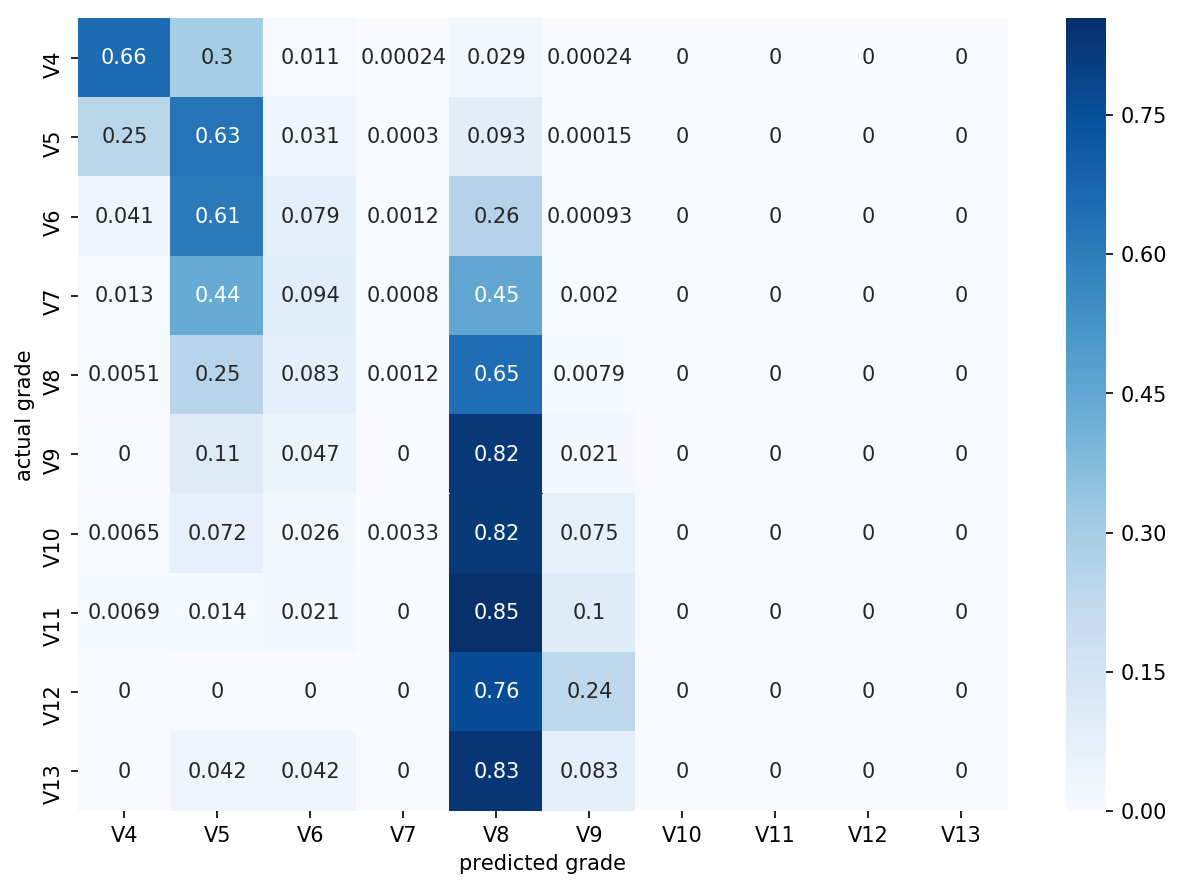

In [402]:
conf_matrix = confusion_matrix(Y_train, modelc2.predict(X_train).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

### Model S9: only feed in success score

In [113]:
models9 = Sequential()
models9.add(Masking(mask_value=0., input_shape = (12, 1)))
models9.add(LSTM(20, activation='relu', input_shape=(12, 1), kernel_initializer='glorot_normal', return_sequences = 'True'))
models9.add(LSTM(20, activation='relu', kernel_initializer='glorot_normal', return_sequences = 'True'))
models9.add(LSTM(15, activation='relu', kernel_initializer='glorot_normal'))
models9.add(Dense(15, activation='relu', kernel_initializer='glorot_normal'))
models9.add(Dense(10, activation='softmax'))
models9.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(models9.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, 12, 1)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 20)            1760      
_________________________________________________________________
lstm_2 (LSTM)                (None, 12, 20)            3280      
_________________________________________________________________
lstm_3 (LSTM)                (None, 15)                2160      
_________________________________________________________________
dense_21 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                160       
Total params: 7,600
Trainable params: 7,600
Non-trainable params: 0
____________________________________________________

In [114]:
historys9_all = []
np.random.seed(0)

In [117]:
for i in range(10):
    historys9 = models9.fit(X_train[:, :, -1].reshape((-1, 12, 1)), Y_train, epochs=10, batch_size=32, validation_data = (X_dev[:, :, -1].reshape((-1, 12, 1)), Y_dev))
    historys9_all.append(historys9)

Train on 24603 samples, validate on 2442 samples
Epoch 1/10
24603/24603 [==============================] - 17s 672us/step - loss: 1.5852 - sparse_categorical_accuracy: 0.3687 - val_loss: 1.3936 - val_sparse_categorical_accuracy: 0.4267
Epoch 2/10
24603/24603 [==============================] - 15s 602us/step - loss: 1.4116 - sparse_categorical_accuracy: 0.4194 - val_loss: 1.3658 - val_sparse_categorical_accuracy: 0.4341
Epoch 3/10
24603/24603 [==============================] - 15s 604us/step - loss: 1.3854 - sparse_categorical_accuracy: 0.4294 - val_loss: 1.3768 - val_sparse_categorical_accuracy: 0.4300
Epoch 4/10
24603/24603 [==============================] - 15s 608us/step - loss: 1.3772 - sparse_categorical_accuracy: 0.4306 - val_loss: 1.3765 - val_sparse_categorical_accuracy: 0.4333
Epoch 5/10
24603/24603 [==============================] - 15s 604us/step - loss: 1.3723 - sparse_categorical_accuracy: 0.4295 - val_loss: 1.3567 - val_sparse_categorical_accuracy: 0.4382
Epoch 6/10
24603

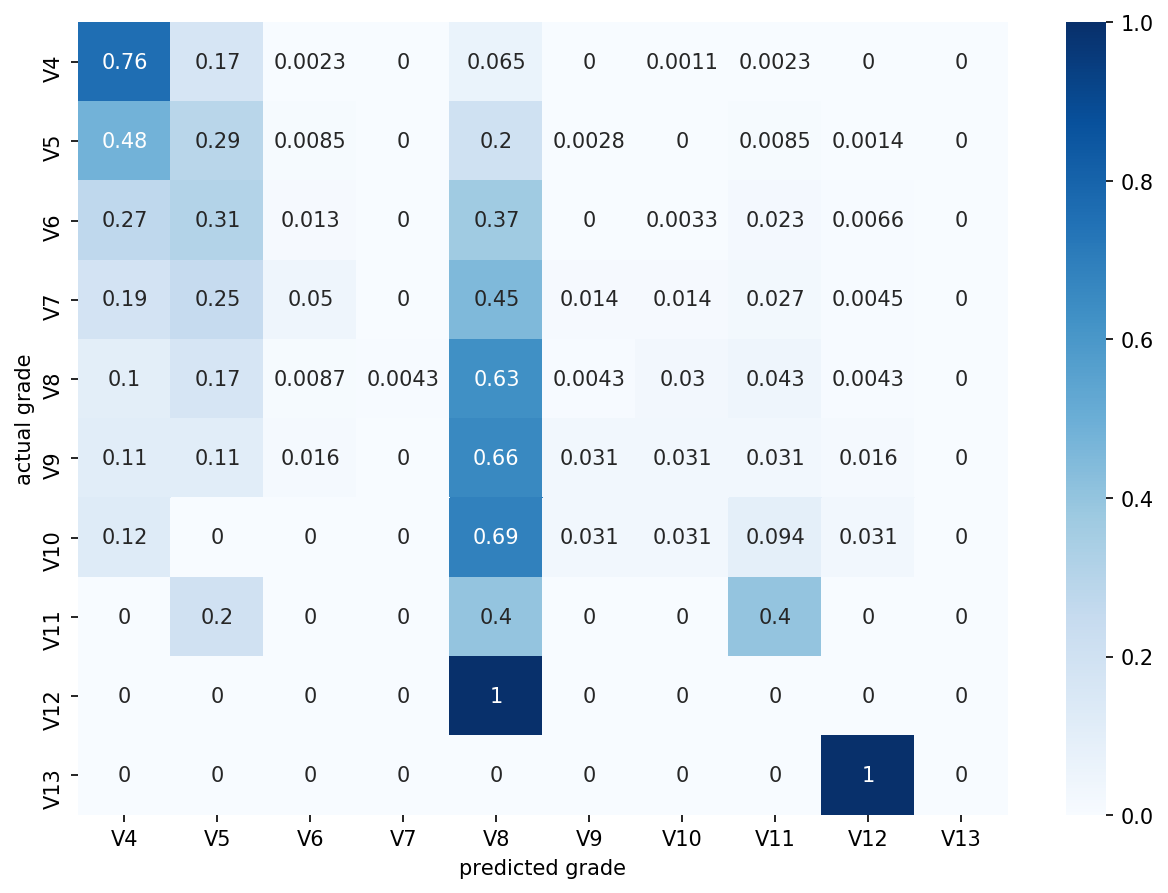

In [121]:
conf_matrix = confusion_matrix(Y_dev, models9.predict(X_dev[:, :, -1].reshape((-1, 12, 1))).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

In [165]:
moveScoreStatistics = {0: [],
                1: [],
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: [],
                8: [],
                9: []}
meanScoreStatistics = {0: [],
                1: [],
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: [],
                8: [],
                9: []}
stdScoreStatistics = {0: [],
                1: [],
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: [],
                8: [],
                9: []}
minScoreStatistics = {0: [],
                1: [],
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: [],
                8: [],
                9: []}
maxScoreStatistics = {0: [],
                1: [],
                2: [],
                3: [],
                4: [],
                5: [],
                6: [],
                7: [],
                8: [],
                9: []}

In [166]:
n_train = len(Y_train)
for i in range(n_train):
    tmax = int(training_set['tmax'][i])
    y = int(Y_train[i])
    moveScoreStatistics[y].append(list(X_train[i, 0:tmax, -1]))
    meanScoreStatistics[y].append(np.mean(X_train[i, 0:tmax, -1]))
    stdScoreStatistics[y].append(np.std(X_train[i, 0:tmax, -1]))
    minScoreStatistics[y].append(np.min(X_train[i, 0:tmax, -1]))
    maxScoreStatistics[y].append(np.max(X_train[i, 0:tmax, -1]))

[0.04552333 0.20261615 0.42799397 0.64478952 0.73322419 0.53657831
 0.275752   0.13992828 0.04216506 0.00597027]
[0.09393556 0.41103295 0.80961035 0.86410335 0.67519427 0.37833714
 0.18112437 0.06383466 0.02646803 0.0083037 ]
[0.20613803 0.82587352 1.15622293 0.96329887 0.6144499  0.28938608
 0.13610396 0.0568201  0.02246376 0.0013214 ]
[0.34358829 1.14251447 1.21089854 0.80059408 0.44533046 0.16679043
 0.04836923 0.01501114 0.         0.0016679 ]
[0.51632651 1.42825571 1.33910581 0.81535014 0.38445895 0.14486859
 0.0538614  0.0185729  0.00928645 0.00185729]
[0.90808365 2.03123975 1.56923228 1.00367141 0.63725169 0.3106602
 0.18320986 0.1035534  0.03982823 0.03186258]
[1.40378154 2.25134776 1.53621376 1.27134932 0.79459333 0.29135089
 0.37081022 0.07945933 0.07945933 0.05297289]
[1.95255228 2.99856242 1.95255228 1.3946802  0.76707411 0.34867005
 0.27893604 0.20920203 0.         0.13946802]
[2.78392327 2.95791847 1.39196163 0.52198561 0.         0.1739952
 0.         0.         0.      

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


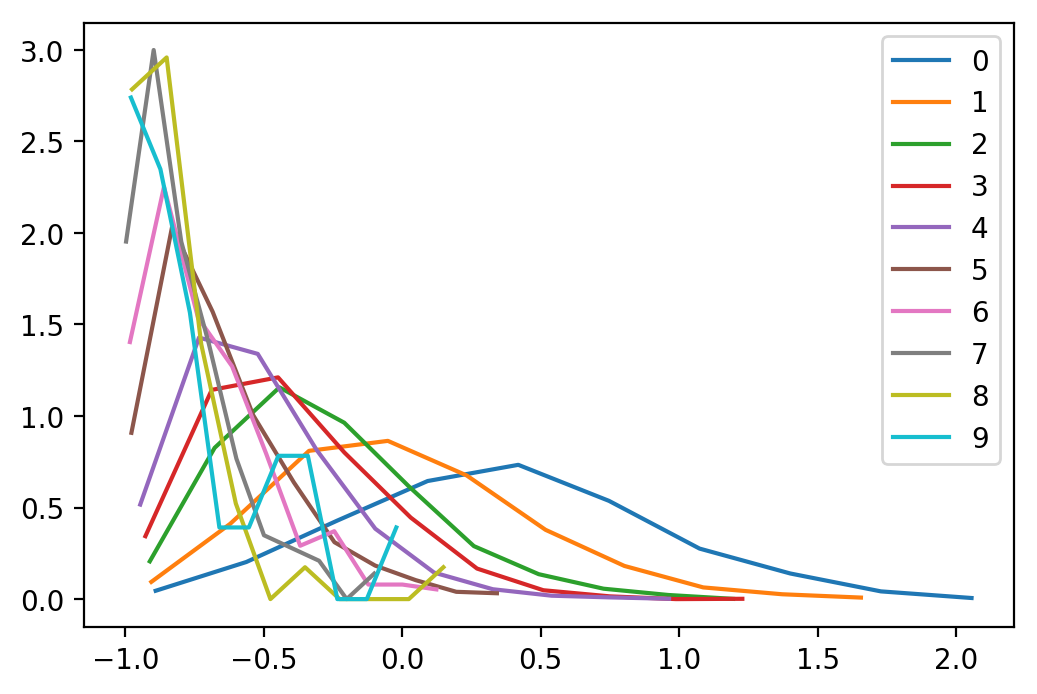

In [137]:
plt.figure(dpi = 200)
for key in meanScoreStatistics.keys():
    hist, bin_edges = np.histogram(meanScoreStatistics[key], normed = True)
    print(hist)
    plt.plot((bin_edges[:-1]+bin_edges[1:])/2, hist, label = str(key))
plt.legend()

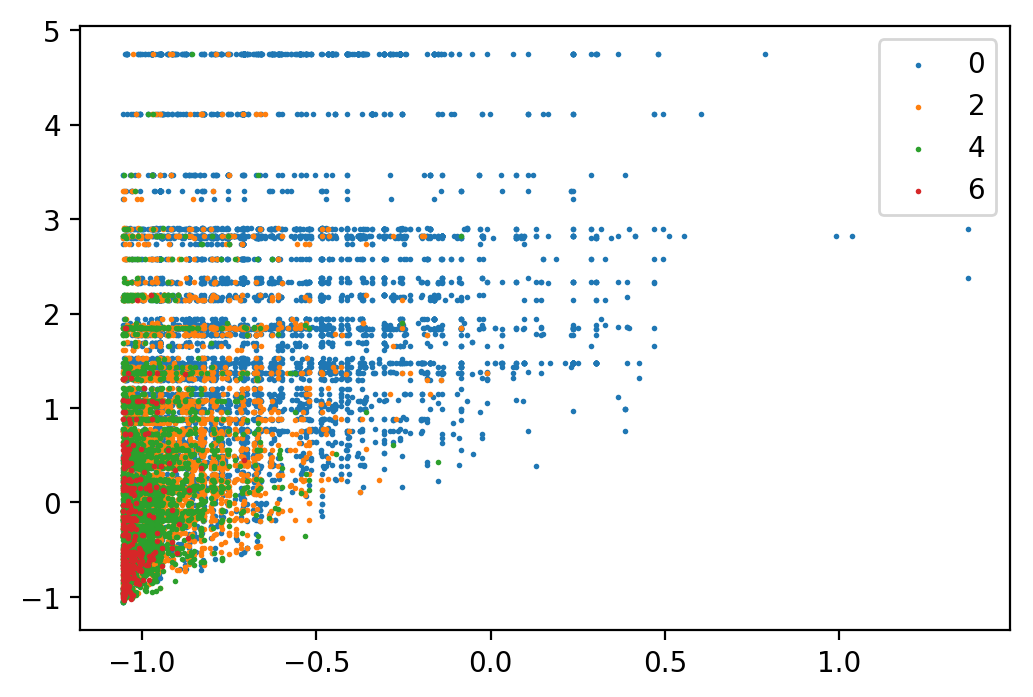

In [170]:
plt.figure(dpi = 200)
for key in [0,2,4,6]:
    plt.scatter(minScoreStatistics[key], maxScoreStatistics[key], label = str(key), s = 1)
plt.legend()

### Model S10: only feed in scores

In [172]:
models10 = Sequential()
models10.add(Masking(mask_value=0., input_shape = (12, 4)))
models10.add(LSTM(50, activation='relu', input_shape=(12, 4), kernel_initializer='glorot_normal', return_sequences = 'True'))
models10.add(LSTM(40, activation='relu', kernel_initializer='glorot_normal', return_sequences = 'True'))
models10.add(LSTM(30, activation='relu', kernel_initializer='glorot_normal'))
models10.add(Dense(20, activation='relu', kernel_initializer='glorot_normal'))
models10.add(Dense(10, activation='softmax'))
models10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(models10.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_2 (Masking)          (None, 12, 4)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 12, 50)            11000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 12, 40)            14560     
_________________________________________________________________
lstm_6 (LSTM)                (None, 30)                8520      
_________________________________________________________________
dense_23 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                210       
Total params: 34,910
Trainable params: 34,910
Non-trainable params: 0
__________________________________________________

In [173]:
historys10_all = []
np.random.seed(0)

In [174]:
for i in range(10):
    historys10 = models10.fit(
        X_train[:, :, (3,6,11,21)], Y_train, epochs=10, batch_size=32, validation_data = (X_dev[:, :, (3,6,11,21)], Y_dev))
    historys10_all.append(historys10)

Train on 24603 samples, validate on 2442 samples
Epoch 1/10
24603/24603 [==============================] - 17s 709us/step - loss: 1.4534 - sparse_categorical_accuracy: 0.4141 - val_loss: 1.3379 - val_sparse_categorical_accuracy: 0.4525
Epoch 2/10
24603/24603 [==============================] - 16s 643us/step - loss: 1.3371 - sparse_categorical_accuracy: 0.4443 - val_loss: 1.2985 - val_sparse_categorical_accuracy: 0.4652
Epoch 3/10
24603/24603 [==============================] - 16s 670us/step - loss: 1.3254 - sparse_categorical_accuracy: 0.4457 - val_loss: 1.3077 - val_sparse_categorical_accuracy: 0.4652
Epoch 4/10
24603/24603 [==============================] - 16s 669us/step - loss: 1.3216 - sparse_categorical_accuracy: 0.4471 - val_loss: 1.3059 - val_sparse_categorical_accuracy: 0.4533
Epoch 5/10
24603/24603 [==============================] - 16s 637us/step - loss: 1.3147 - sparse_categorical_accuracy: 0.4512 - val_loss: 1.2854 - val_sparse_categorical_accuracy: 0.4640
Epoch 6/10
24603

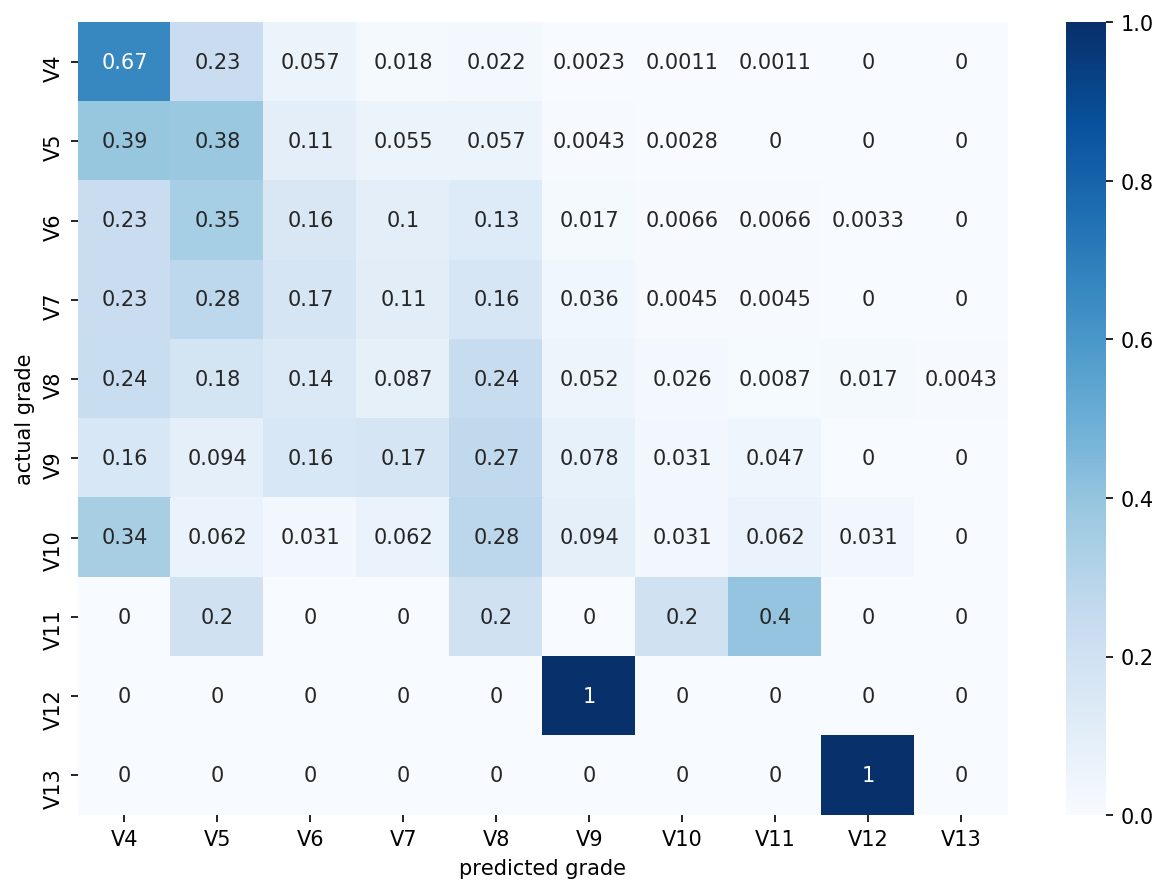

In [175]:
conf_matrix = confusion_matrix(Y_dev, models10.predict(X_dev[:, :, (3,6,11,21)]).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

### Model S11: only feed in scores + max pooling

In [194]:
from keras.layers import Multiply

In [178]:
models11 = Sequential()
models11.add(LSTM(30, activation='relu', input_shape=(12, 4), kernel_initializer='glorot_normal', return_sequences = 'True'))
models11.add(LSTM(20, activation='relu', kernel_initializer='glorot_normal', return_sequences = 'True'))
models11.add(MaxPooling1D(pool_size=2))
models11.add(LSTM(20, activation='relu', kernel_initializer='glorot_normal', return_sequences = 'True'))
models11.add(MaxPooling1D(pool_size=2))
models11.add(LSTM(20, activation='relu', kernel_initializer='glorot_normal'))
models11.add(Dense(20, activation='relu', kernel_initializer='glorot_normal'))
models11.add(Dense(10, activation='softmax'))
models11.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(models11.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 12, 30)            4200      
_________________________________________________________________
lstm_14 (LSTM)               (None, 12, 20)            4080      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 6, 20)             0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 6, 20)             3280      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 3, 20)             0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dense_27 (Dense)             (None, 20)               

In [181]:
historys11_all = []
np.random.seed(0)

In [182]:
for i in range(10):
    historys11 = models11.fit(
        X_train[:, :, (3,6,11,21)], Y_train, epochs=10, batch_size=32, validation_data = (X_dev[:, :, (3,6,11,21)], Y_dev))
    historys11_all.append(historys11)

Train on 24603 samples, validate on 2442 samples
Epoch 1/10
24603/24603 [==============================] - 11s 448us/step - loss: 1.3780 - sparse_categorical_accuracy: 0.4354 - val_loss: 1.3105 - val_sparse_categorical_accuracy: 0.4681
Epoch 2/10
24603/24603 [==============================] - 10s 425us/step - loss: 1.3459 - sparse_categorical_accuracy: 0.4415 - val_loss: 1.2646 - val_sparse_categorical_accuracy: 0.4783
Epoch 3/10
24603/24603 [==============================] - 10s 424us/step - loss: 1.3326 - sparse_categorical_accuracy: 0.4425 - val_loss: 1.2890 - val_sparse_categorical_accuracy: 0.4705
Epoch 4/10
24603/24603 [==============================] - 11s 442us/step - loss: 1.3287 - sparse_categorical_accuracy: 0.4483 - val_loss: 1.2762 - val_sparse_categorical_accuracy: 0.4726
Epoch 5/10
24603/24603 [==============================] - 11s 433us/step - loss: 1.3222 - sparse_categorical_accuracy: 0.4490 - val_loss: 1.2523 - val_sparse_categorical_accuracy: 0.4910
Epoch 6/10
24603

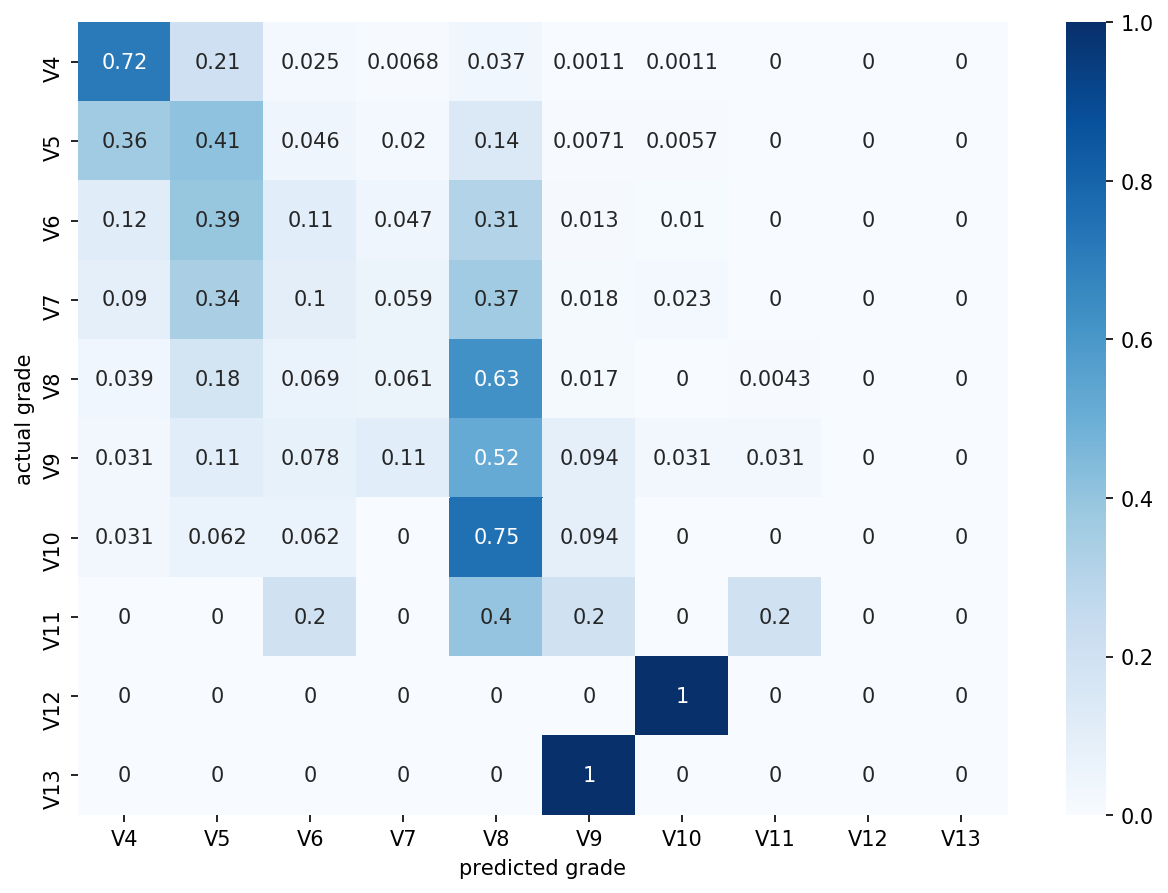

In [183]:
conf_matrix = confusion_matrix(Y_dev, models11.predict(X_dev[:, :, (3,6,11,21)]).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

In [184]:
from keras.layers import Permute

### Model S12: only feed in scores + max pooling

In [189]:
models12 = Sequential()
models12.add(LSTM(30, activation='relu', input_shape=(12, 4), kernel_initializer='glorot_normal', return_sequences = 'True'))
models12.add(LSTM(20, activation='relu', kernel_initializer='glorot_normal', return_sequences = 'True'))
models12.add(Permute((2, 1)))
models12.add(MaxPooling1D(pool_size=2))
models12.add(LSTM(20, activation='relu', kernel_initializer='glorot_normal', return_sequences = 'True'))
models12.add(Permute((2, 1)))
models12.add(MaxPooling1D(pool_size=2))
models12.add(LSTM(20, activation='relu', kernel_initializer='glorot_normal'))
models12.add(Dense(20, activation='relu', kernel_initializer='glorot_normal'))
models12.add(Dense(15, activation='relu', kernel_initializer='glorot_normal'))
models12.add(Dense(10, activation='softmax'))
models12.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(models12.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 12, 30)            4200      
_________________________________________________________________
lstm_22 (LSTM)               (None, 12, 20)            4080      
_________________________________________________________________
permute_2 (Permute)          (None, 20, 12)            0         
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 10, 12)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 10, 20)            2640      
_________________________________________________________________
permute_3 (Permute)          (None, 20, 10)            0         
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 10, 10)          

In [190]:
historys12_all = []
np.random.seed(0)

In [192]:
for i in range(10):
    historys12 = models12.fit(
        X_train[:, :, (3,6,11,21)], Y_train, epochs=10, batch_size=256, validation_data = (X_dev[:, :, (3,6,11,21)], Y_dev))
    historys12_all.append(historys12)

Train on 24603 samples, validate on 2442 samples
Epoch 1/10
24603/24603 [==============================] - 3s 124us/step - loss: 1.3420 - sparse_categorical_accuracy: 0.4452 - val_loss: 1.3177 - val_sparse_categorical_accuracy: 0.4627
Epoch 2/10
24603/24603 [==============================] - 3s 117us/step - loss: 1.3366 - sparse_categorical_accuracy: 0.4459 - val_loss: 1.3201 - val_sparse_categorical_accuracy: 0.4550
Epoch 3/10
24603/24603 [==============================] - 3s 131us/step - loss: 1.3338 - sparse_categorical_accuracy: 0.4462 - val_loss: 1.3113 - val_sparse_categorical_accuracy: 0.4595
Epoch 4/10
24603/24603 [==============================] - 3s 123us/step - loss: 1.3299 - sparse_categorical_accuracy: 0.4469 - val_loss: 1.2939 - val_sparse_categorical_accuracy: 0.4689
Epoch 5/10
24603/24603 [==============================] - 3s 121us/step - loss: 1.3277 - sparse_categorical_accuracy: 0.4462 - val_loss: 1.2893 - val_sparse_categorical_accuracy: 0.4701
Epoch 6/10
24603/2460

KeyboardInterrupt: 

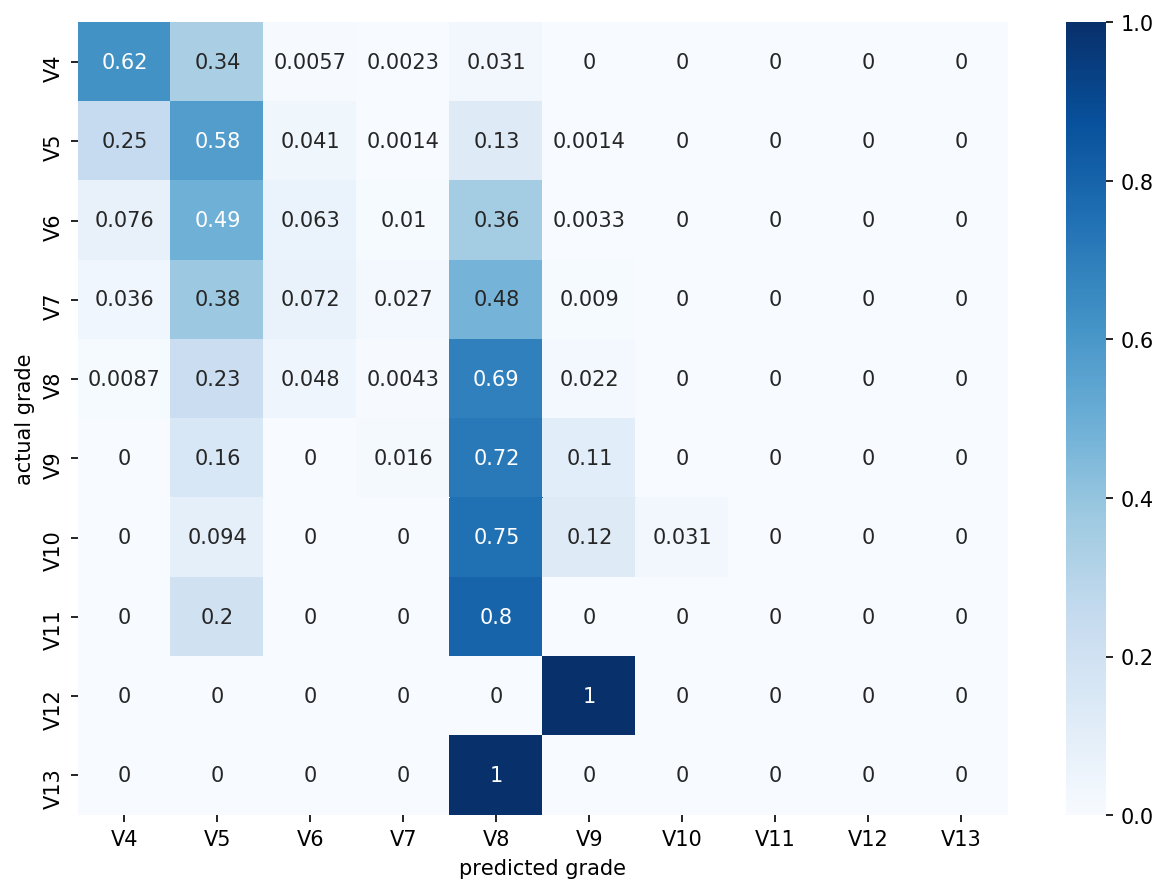

In [193]:
conf_matrix = confusion_matrix(Y_dev, models12.predict(X_dev[:, :, (3,6,11,21)]).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

### S13

In [196]:
models13 = Sequential()
models13.add(LSTM(30, activation='relu', input_shape=(12, 4), kernel_initializer='glorot_normal', return_sequences = 'True'))
models13.add(LSTM(20, activation='relu', kernel_initializer='glorot_normal', return_sequences = 'True'))
models13.add(MaxPooling1D(pool_size=2))
models13.add(LSTM(20, activation='relu', kernel_initializer='glorot_normal', return_sequences = 'True'))
models13.add(MaxPooling1D(pool_size=2))
models13.add(LSTM(20, activation='relu', kernel_initializer='glorot_normal'))
models13.add(Dense(20, activation='relu', kernel_initializer='glorot_normal'))
models13.add(Dense(15, activation='relu', kernel_initializer='glorot_normal'))
models13.add(Dense(10, activation='softmax'))
models13.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(models13.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 12, 30)            4200      
_________________________________________________________________
lstm_26 (LSTM)               (None, 12, 20)            4080      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 6, 20)             0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 6, 20)             3280      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 3, 20)             0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dense_34 (Dense)             (None, 20)              

In [197]:
historys13_all = []
np.random.seed(0)

In [198]:
for i in range(10):
    historys13 = models13.fit(
        -X_train[:, :, (3,6,11,21)], Y_train, epochs=10, batch_size=256, validation_data = (-X_dev[:, :, (3,6,11,21)], Y_dev))
    historys13_all.append(historys12)

Train on 24603 samples, validate on 2442 samples
Epoch 1/10
24603/24603 [==============================] - 4s 168us/step - loss: 1.8440 - sparse_categorical_accuracy: 0.3381 - val_loss: 1.4112 - val_sparse_categorical_accuracy: 0.4263
Epoch 2/10
24603/24603 [==============================] - 3s 104us/step - loss: 1.4278 - sparse_categorical_accuracy: 0.4102 - val_loss: 1.3482 - val_sparse_categorical_accuracy: 0.4599
Epoch 3/10
24603/24603 [==============================] - 2s 101us/step - loss: 1.3828 - sparse_categorical_accuracy: 0.4350 - val_loss: 1.3230 - val_sparse_categorical_accuracy: 0.4517
Epoch 4/10
24603/24603 [==============================] - 2s 97us/step - loss: 1.3641 - sparse_categorical_accuracy: 0.4392 - val_loss: 1.3396 - val_sparse_categorical_accuracy: 0.4431
Epoch 5/10
24603/24603 [==============================] - 2s 95us/step - loss: 1.3573 - sparse_categorical_accuracy: 0.4385 - val_loss: 1.2835 - val_sparse_categorical_accuracy: 0.4738
Epoch 6/10
24603/24603 

KeyboardInterrupt: 

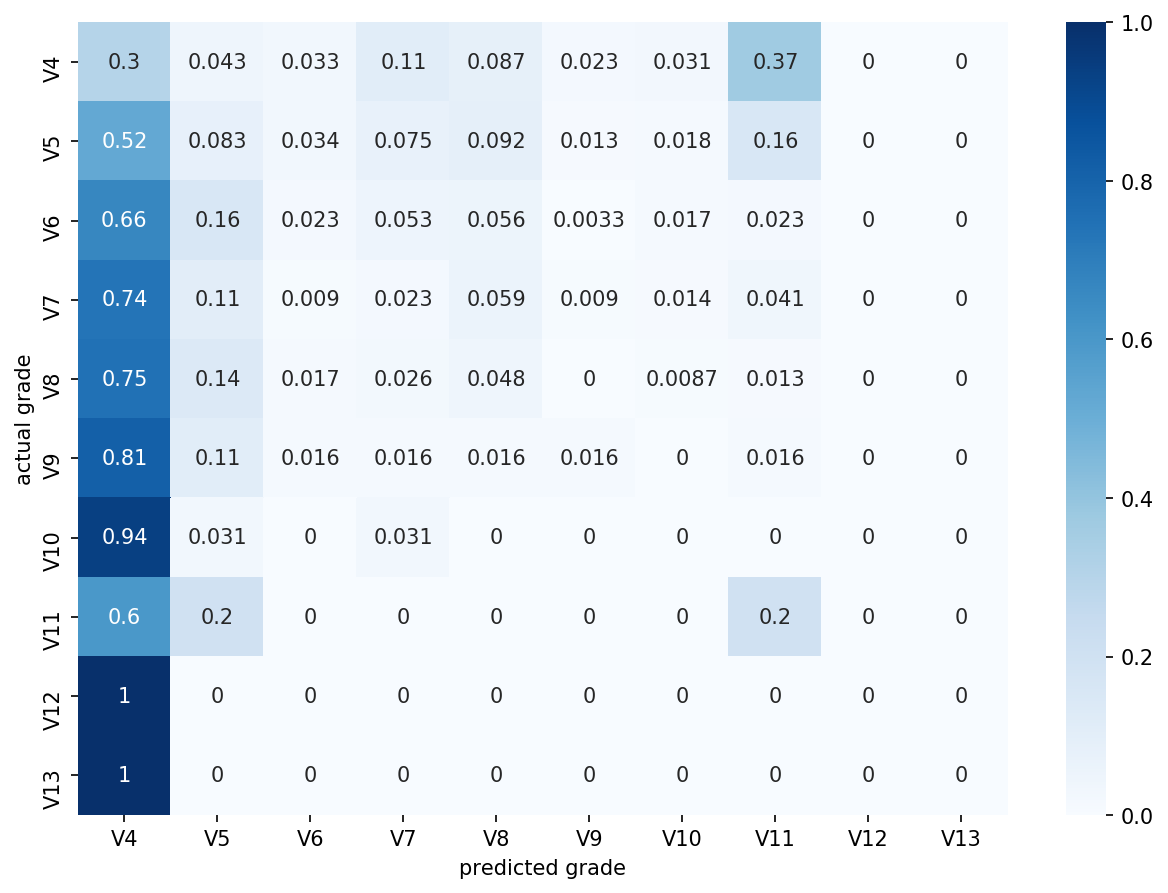

In [199]:
conf_matrix = confusion_matrix(Y_dev, models13.predict(X_dev[:, :, (3,6,11,21)]).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

### S14 CONV

In [219]:
inputs = Input(shape = (12, 4))
mask = Masking(mask_value = 0.).compute_mask(inputs)
lstm = LSTM(60, activation='relu', input_shape=(12, 4), kernel_initializer='glorot_normal', return_sequences = 'True')(inputs, mask=mask) # <= Apply the mask
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', kernel_initializer='glorot_normal')(lstm)
conv2 = Conv1D(filters=32, kernel_size=3, activation='relu', kernel_initializer='glorot_normal')(conv1)
flatten = Flatten()(conv2)
dense1 = Dense(20, activation='relu', kernel_initializer='glorot_normal')(flatten)
dense2 = Dense(10, activation='softmax', kernel_initializer='glorot_normal')(dense1)
models14 = Model(inputs=[inputs], outputs=[dense2])
models14.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print(model.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 12, 4)             0         
_________________________________________________________________
lstm_36 (LSTM)               (None, 12, 60)            15600     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 10, 32)            5792      
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 8, 32)             3104      
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 20)                5140      
_________________________________________________________________
dense_45 (Dense)             (None, 10)                210 

In [223]:
historys14_all = []
np.random.seed(0)

In [224]:
for i in range(10):
    historys14 = models14.fit(
        X_train[:, :, (3,6,11,21)], Y_train, epochs=10, batch_size=32, validation_data = (X_dev[:, :, (3,6,11,21)], Y_dev))
    historys14_all.append(historys12)

Train on 24603 samples, validate on 2442 samples
Epoch 1/10
24603/24603 [==============================] - 7s 297us/step - loss: 1.2951 - sparse_categorical_accuracy: 0.4605 - val_loss: 1.2831 - val_sparse_categorical_accuracy: 0.4615
Epoch 2/10
24603/24603 [==============================] - 7s 292us/step - loss: 1.2903 - sparse_categorical_accuracy: 0.4593 - val_loss: 1.3020 - val_sparse_categorical_accuracy: 0.4558
Epoch 3/10
24603/24603 [==============================] - 7s 286us/step - loss: 1.2880 - sparse_categorical_accuracy: 0.4588 - val_loss: 1.2759 - val_sparse_categorical_accuracy: 0.4656
Epoch 4/10
24603/24603 [==============================] - 7s 293us/step - loss: 1.2871 - sparse_categorical_accuracy: 0.4633 - val_loss: 1.2830 - val_sparse_categorical_accuracy: 0.4582
Epoch 5/10
24603/24603 [==============================] - 8s 314us/step - loss: 1.2829 - sparse_categorical_accuracy: 0.4647 - val_loss: 1.2638 - val_sparse_categorical_accuracy: 0.4722
Epoch 6/10
24603/2460

KeyboardInterrupt: 

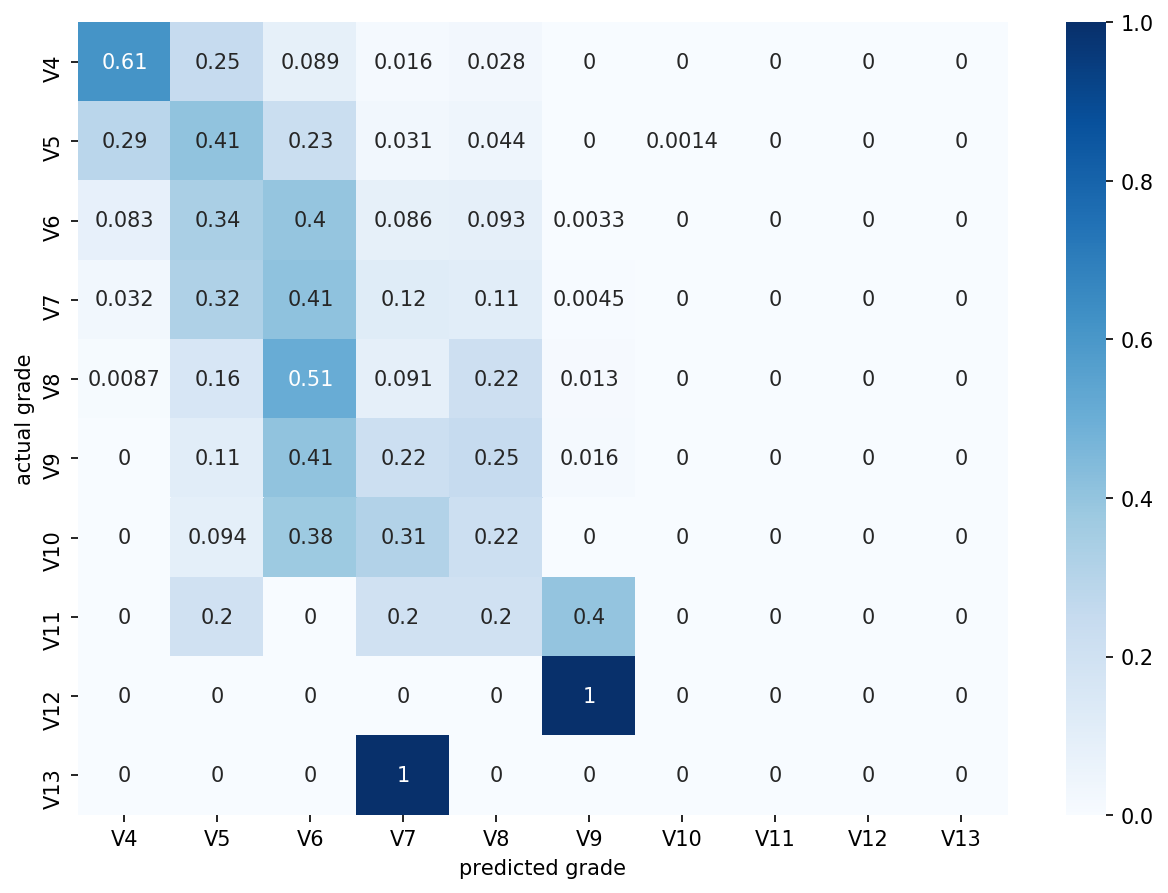

In [225]:
conf_matrix = confusion_matrix(Y_dev, models14.predict(X_dev[:, :, (3,6,11,21)]).argmax(axis=1))
df_cm = pd.DataFrame((conf_matrix/np.sum(conf_matrix, axis = 1, keepdims = True)), 
                     index = [i for i in labels],
                     columns = [i for i in labels])
plt.figure(dpi = 150, figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('predicted grade')
plt.ylabel('actual grade')
plt.show()

In [221]:
def MovesNet(input_shape = (12, 22), classes = 10):
    """
    Implementation of move grade prediction using the following architecture:
    Masking -> Dense -> Dense -> Dense -> Dense -> Dense -> (BATCHNORM -> RELU -> MAXPOOL) -> LSTM -> LSTM -> LSTM -> Dense -> Dense 
    s
   
    -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- (Max total num of moves, feature in a move)
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = Dense(50, activation='relu', kernel_initializer='glorot_normal')(X_input)
    
    # Stage 1
    X = Dense(20, activation='relu', kernel_initializer='glorot_normal')(X)
    #X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    #X = Activation('relu')(X)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = Dense(10, activation='relu', kernel_initializer='glorot_normal')(X)
    #X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    #X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = Dense(5, activation='relu', kernel_initializer='glorot_normal')(X)
    X = Dense(2, activation='relu', kernel_initializer='glorot_normal')(X)
    X = LSTM(2, activation='relu', kernel_initializer='glorot_normal', return_sequences = True)(X)
    X = LSTM(2, activation='relu', kernel_initializer='glorot_normal', return_sequences = True)(X)
    X = LSTM(2, activation='relu', kernel_initializer='glorot_normal')(X)
    X = Dense(2, activation='relu', kernel_initializer='glorot_normal')(X)
    #X = identity_block(X, 3, [128,128,512], stage=3, block='b')
    #X = identity_block(X, 3, [128,128,512], stage=3, block='c')
    #X = identity_block(X, 3, [128,128,512], stage=3, block='d')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    #X = AveragePooling2D((2,2), name = 'avg_pool')(X)
    
    ### END CODE HERE ###

    # output layer
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='MovesNet')

    return model

In [224]:
tf.keras.experimental.PeepholeLSTMCell

tensorflow.python.keras.layers.recurrent.PeepholeLSTMCell